In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import ast
import os

from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

In [4]:
os.path.abspath(os.getcwd())

'/home/bruno/BRUNO/Pasta_com_estudos/Lol XAI'

In [11]:
df_league = pd.read_csv('leagueoflegends/LeagueofLegends.csv')

In [12]:
df_league.head()

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength                                           golddiff  ...  \
0          40  [0, 0, -14, -65, -268, -431, -488, -789, -494,...  ...   
1          38  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...  ...   
2          40  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...  ...   
3          41  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...  ...   
4          35  [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...  ...   

  redMiddleChamp                                      goldredMiddle  \
0           Fizz  [475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...   
1           Azir  [475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...   
2           Azir  [475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...   
3           Lulu  [475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...   
4           Lulu  [475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...   

         redADC redADCChamp  \
0        Sneaky       Sivir   
1        CoreJJ       Corki   
2           Cop       Corki   
3         KEITH      KogMaw   
4  Maplestreet8       Corki   

                                          goldredADC   redSupport  \
0  [475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...  LemonNation   
1  [475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...      KiWiKiD   
2  [475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...   BunnyFuFuu   
3  [475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...      Xpecial   
4  [475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...        Dodo8   

  redSupportChamp                                     goldredSupport  \
0          Thresh  [515, 515, 577, 722, 911, 1042, 1194, 1370, 14...   
1           Annie  [515, 515, 583, 752, 900, 1066, 1236, 1417, 15...   
2           Janna  [515, 515, 584, 721, 858, 1002, 1168, 1303, 14...   
3           Janna  [515, 515, 583, 721, 870, 1059, 1205, 1342, 15...   
4           Annie  [475, 475, 538, 671, 817, 948, 1104, 1240, 136...   

                              redBans  \
0  ['Tristana', 'Leblanc', 'Nidalee']   
1      ['RekSai', 'Janna', 'Leblanc']   
2        ['Leblanc', 'Zed', 'RekSai']   
3      ['RekSai', 'Rumble', 'LeeSin']   
4       ['Rumble', 'Sivir', 'Rengar']   

                                             Address  
0  http://matchhistory.na.leagueoflegends.com/en/...  
1  http://matchhistory.na.leagueoflegends.com/en/...  
2  http://matchhistory.na.leagueoflegends.com/en/...  
3  http://matchhistory.na.leagueoflegends.com/en/...  
4  http://matchhistory.na.leagueoflegends.com/en/...  

[5 rows x 57 columns]

In [25]:
df_league.shape

(7620, 57)

In [26]:
df_league.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [27]:
red_columns = ['League', 'Year', 'Season', 'Type', 'redTeamTag', 'gamelength', 'golddiff', 'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'redTop', 'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle', 'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp', 'goldredSupport', 'rResult']

In [28]:
blue_columns = ['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'blueTop', 'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp', 'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport', 'blueSupportChamp', 'goldblueSupport', 'bResult']

In [29]:
df_final_league = pd.DataFrame()
for i, row in tqdm_notebook(df_league.iterrows()):
    
    #Red Team Append
    df_aux = pd.DataFrame()
    
    row_aux = row[red_columns]
    
    row_aux = row_aux.rename({'redTeamTag': 'TeamTag',
                                'goldred': 'Gold',
                                'rKills': 'Kills',
                                'rTowers': 'Towers',
                                'rInhibs': 'Inhibs',
                                'rDragons': 'Dragons',
                                'rBarons': 'Barons',
                                'rHeralds': 'Heralds',
                                'redTop': 'Top',
                                'redTopChamp': 'TopChamp',
                                'goldredTop': 'GoldTop',
                                'redJungle': 'Jungle',
                                'redJungleChamp': 'JungleChamp',
                                'goldredJungle': 'GoldJungle',
                                'redMiddle': 'Middle',
                                'redMiddleChamp': 'MiddleChamp',
                                'goldredMiddle': 'GoldMiddle',
                                'redADC': 'ADC',
                                'redADCChamp': 'ADCChamp',
                                'goldredADC': 'GoldADC',
                                'redSupport': 'Support',
                                'redSupportChamp': 'SupportChamp',
                                'goldredSupport': 'GoldSupport',
                                'rResult': 'Result'})
    
    df_aux = pd.DataFrame([row_aux])
    
    
    df_final_league = pd.concat([df_final_league, df_aux])
    
    #Blue Team Append
    df_aux = pd.DataFrame()
    
    row_aux = row[blue_columns]
    
    row_aux = row_aux.rename({'blueTeamTag': 'TeamTag',
                                'goldblue': 'Gold',
                                'bKills': 'Kills',
                                'bTowers': 'Towers',
                                'bInhibs': 'Inhibs',
                                'bDragons': 'Dragons',
                                'bBarons': 'Barons',
                                'bHeralds': 'Heralds',
                                'blueTop': 'Top',
                                'blueTopChamp': 'TopChamp',
                                'goldblueTop': 'GoldTop',
                                'blueJungle': 'Jungle',
                                'blueJungleChamp': 'JungleChamp',
                                'goldblueJungle': 'GoldJungle',
                                'blueMiddle': 'Middle',
                                'blueMiddleChamp': 'MiddleChamp',
                                'goldblueMiddle': 'GoldMiddle',
                                'blueADC': 'ADC',
                                'blueADCChamp': 'ADCChamp',
                                'goldblueADC': 'GoldADC',
                                'blueSupport': 'Support',
                                'blueSupportChamp': 'SupportChamp',
                                'goldblueSupport': 'GoldSupport',
                                'bResult': 'Result'})
    
    df_aux = pd.DataFrame([row_aux])
    
    
    df_final_league = pd.concat([df_final_league, df_aux])

In [30]:
df_final_league.reset_index(drop=True, inplace=True)

In [31]:
df_final_league.head()

League  Year  Season    Type TeamTag  gamelength  \
0  NALCS  2015  Spring  Season      C9          40   
1  NALCS  2015  Spring  Season     TSM          40   
2  NALCS  2015  Spring  Season     DIG          38   
3  NALCS  2015  Spring  Season     CST          38   
4  NALCS  2015  Spring  Season      GV          40   

                                            golddiff  \
0  [0, 0, -14, -65, -268, -431, -488, -789, -494,...   
1  [0, 0, -14, -65, -268, -431, -488, -789, -494,...   
2  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...   
3  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...   
4  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...   

                                                Gold  \
0  [2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...   
1  [2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...   
2  [2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...   
3  [2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...   
4  [2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...   

                                               Kills  \
0  [[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...   
1  [[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...   
2  [[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...   
3  [[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...   
4  [[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...   

                                              Towers  ...    Middle  \
0  [[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...  ...       Hai   
1  [[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...  ...  Bjergsen   
2  [[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...  ...  Shiphtur   
3  [[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...  ...     Jesiz   
4  [[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...  ...     Keane   

  MiddleChamp                                         GoldMiddle         ADC  \
0        Fizz  [475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...      Sneaky   
1        Ahri  [475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...  WildTurtle   
2        Azir  [475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...      CoreJJ   
3        Ahri  [475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...        Mash   
4        Azir  [475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...         Cop   

  ADCChamp                                            GoldADC      Support  \
0    Sivir  [475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...  LemonNation   
1     Jinx  [475, 475, 532, 797, 1127, 1453, 1766, 2044, 2...      Lustboy   
2    Corki  [475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...      KiWiKiD   
3  Caitlyn  [475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...        Sheep   
4    Corki  [475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...   BunnyFuFuu   

  SupportChamp                                        GoldSupport Result  
0       Thresh  [515, 515, 577, 722, 911, 1042, 1194, 1370, 14...      0  
1        Janna  [515, 515, 583, 726, 897, 1077, 1227, 1381, 15...      1  
2        Annie  [515, 515, 583, 752, 900, 1066, 1236, 1417, 15...      1  
3        Leona  [515, 515, 577, 750, 924, 1073, 1239, 1392, 15...      0  
4        Janna  [515, 515, 584, 721, 858, 1002, 1168, 1303, 14...      0  

[5 rows x 30 columns]

In [32]:
df_final_league.columns

Index(['League', 'Year', 'Season', 'Type', 'TeamTag', 'gamelength', 'golddiff',
       'Gold', 'Kills', 'Towers', 'Inhibs', 'Dragons', 'Barons', 'Heralds',
       'Top', 'TopChamp', 'GoldTop', 'Jungle', 'JungleChamp', 'GoldJungle',
       'Middle', 'MiddleChamp', 'GoldMiddle', 'ADC', 'ADCChamp', 'GoldADC',
       'Support', 'SupportChamp', 'GoldSupport', 'Result'],
      dtype='object')

In [33]:
df_final_league.to_excel('data/df_league_of_legends.xlsx')

## Loading Structured Dataframe

In [34]:
df_final_league = pd.read_excel('data/df_league_of_legends.xlsx')

## Structuring Gold/GoldMiddle/GoldTop/GoldJungle/GoldADC/GoldSupport/golddiff/Kills

In [35]:
df_final_league['Gold'] = df_final_league['Gold'].apply(lambda x: ast.literal_eval(x)[-1])

In [36]:
df_final_league['GoldMiddle'] = df_final_league['GoldMiddle'].apply(lambda x: ast.literal_eval(x)[-1])
df_final_league['GoldTop'] = df_final_league['GoldTop'].apply(lambda x: ast.literal_eval(x)[-1])
df_final_league['GoldJungle'] = df_final_league['GoldJungle'].apply(lambda x: ast.literal_eval(x)[-1])
df_final_league['GoldADC'] = df_final_league['GoldADC'].apply(lambda x: ast.literal_eval(x)[-1])
df_final_league['GoldSupport'] = df_final_league['GoldSupport'].apply(lambda x: ast.literal_eval(x)[-1])

In [37]:
df_final_league['golddiff'] = df_final_league['golddiff'].apply(lambda x: ast.literal_eval(x)[-1])
df_final_league['Kills'] = df_final_league['Kills'].apply(lambda x: len(ast.literal_eval(x)))

## Towers

In [40]:
towers_info = df_final_league['Towers'].values

In [41]:
mid_lane_all = []
top_lane_all = []
bot_lane_all = []
for tower_info in towers_info:
    
    info = ast.literal_eval(tower_info)
    
    mid_lane_turrets = 0
    top_lane_turrets = 0
    bot_lane_turrets = 0
    
    for sub_info in info:
        
        if 'MID_LANE' in sub_info:
            
            if 'NEXUS_TURRET' not in sub_info:
            
                mid_lane_turrets += 1
            
            
        elif 'TOP_LANE' in sub_info:
            
            top_lane_turrets += 1
            
        elif 'BOT_LANE' in sub_info:
            
            bot_lane_turrets += 1
            
    mid_lane_all.append(mid_lane_turrets)
    
    top_lane_all.append(top_lane_turrets)
    
    bot_lane_all.append(bot_lane_turrets)      

In [42]:
df_final_league['MiddleTowersDestroyed'] = mid_lane_all
df_final_league['TopTowersDestroyed'] = top_lane_all
df_final_league['BotTowersDestroyed'] = bot_lane_all 

In [43]:
df_final_league.drop(['Towers'], axis=1, inplace=True)

## Inhibitors

In [44]:
inibs = df_final_league['Inhibs'].values

In [45]:
inibs[1]

"[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]"

In [46]:
mid_lane_inibis_array = []
top_lane_inibis_array = []
bot_lane_inibis_array = []
first_break_array = []

for inib in inibs:
    
    inib_info = ast.literal_eval(inib)
    
    mid_lane_inibs = 0
    
    top_lane_inibs = 0
    
    bot_lane_inibs = 0
    
    first_break = 10000
    
    if inib_info != []:
    
        for sub_info in inib_info:

            if 'MID_LANE' in sub_info:

                mid_lane_inibs += 1

            elif 'TOP_LANE' in sub_info:

                top_lane_inibs += 1

            elif 'BOT_LANE' in sub_info:

                bot_lane_inibs += 1

            if sub_info[0] < first_break:

                first_break = sub_info[0]
                
            
    mid_lane_inibis_array.append(mid_lane_inibs)
    top_lane_inibis_array.append(top_lane_inibs)
    bot_lane_inibis_array.append(bot_lane_inibs)
    first_break_array.append(first_break)

In [47]:
df_final_league['MiddleInhib'] = mid_lane_inibis_array
df_final_league['TopInhib'] = top_lane_inibis_array
df_final_league['BotInhib'] = bot_lane_inibis_array
df_final_league['InhibFirstBreak'] = first_break_array

In [48]:
cols = df_final_league.columns.tolist()

In [49]:
cols[-7:]

['MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak']

In [50]:
colunas = cols[:-8] + cols[-7:] + [cols[-8]]

In [51]:
colunas

['Unnamed: 0',
 'League',
 'Year',
 'Season',
 'Type',
 'TeamTag',
 'gamelength',
 'golddiff',
 'Gold',
 'Kills',
 'Inhibs',
 'Dragons',
 'Barons',
 'Heralds',
 'Top',
 'TopChamp',
 'GoldTop',
 'Jungle',
 'JungleChamp',
 'GoldJungle',
 'Middle',
 'MiddleChamp',
 'GoldMiddle',
 'ADC',
 'ADCChamp',
 'GoldADC',
 'Support',
 'SupportChamp',
 'GoldSupport',
 'MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak',
 'Result']

In [52]:
df_final_league = df_final_league[colunas]

In [53]:
df_final_league.drop(['Inhibs'], axis=1, inplace=True)

# Dragons

In [54]:
dragons = df_final_league['Dragons'].values

In [55]:
air_dragons_array = []
fire_dragons_array = []
earth_dragons_array = []
water_dragons_array = []
elder_dragons_array = []
normal_dragons_array = []
first_drag_kill = []

for drag in dragons:
    
    drag_info = ast.literal_eval(drag)
    
    air_dragons = 0
    fire_dragons = 0
    earth_dragons = 0
    water_dragons = 0
    elder_dragons = 0
    normal_dragons = 0
    
    first_kill = 10000
    
    for sub_info in drag_info:
        
        if None in sub_info:
            
            normal_dragons += 1
            
        elif 'AIR_DRAGON' in sub_info:
            
            air_dragons += 1
        
        elif 'FIRE_DRAGON' in sub_info:
            
            fire_dragons += 1
            
        elif 'EARTH_DRAGON' in sub_info:
            
            earth_dragons += 1
            
        elif 'WATER_DRAGON' in sub_info:
            
            water_dragons += 1
            
        elif 'ELDER_DRAGON' in sub_info:
            
            elder_dragons += 1
            
        if sub_info[0] < first_kill:
            
            first_kill = sub_info[0]
            
    
    air_dragons_array.append(air_dragons)
    fire_dragons_array.append(fire_dragons)
    earth_dragons_array.append(earth_dragons)
    water_dragons_array.append(water_dragons)
    elder_dragons_array.append(elder_dragons)
    normal_dragons_array.append(normal_dragons)
    first_drag_kill.append(first_kill)

In [56]:
df_final_league['Normal Dragons'] = normal_dragons_array
df_final_league['Fire Dragons'] = fire_dragons_array
df_final_league['Earth Dragons'] = earth_dragons_array
df_final_league['Air Dragons'] = air_dragons_array
df_final_league['Water Dragons'] = water_dragons_array
df_final_league['Elder Dragons'] = elder_dragons_array
df_final_league['DragonFirstKill'] = first_drag_kill

In [57]:
cols = df_final_league.columns.tolist()

In [59]:
colunas = cols[:-8] + cols[-7:] + [cols[-8]]

In [60]:
colunas

['Unnamed: 0',
 'League',
 'Year',
 'Season',
 'Type',
 'TeamTag',
 'gamelength',
 'golddiff',
 'Gold',
 'Kills',
 'Dragons',
 'Barons',
 'Heralds',
 'Top',
 'TopChamp',
 'GoldTop',
 'Jungle',
 'JungleChamp',
 'GoldJungle',
 'Middle',
 'MiddleChamp',
 'GoldMiddle',
 'ADC',
 'ADCChamp',
 'GoldADC',
 'Support',
 'SupportChamp',
 'GoldSupport',
 'MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak',
 'Normal Dragons',
 'Fire Dragons',
 'Earth Dragons',
 'Air Dragons',
 'Water Dragons',
 'Elder Dragons',
 'DragonFirstKill',
 'Result']

In [61]:
df_final_league = df_final_league[colunas]

In [62]:
df_final_league.drop(['Dragons'], axis=1, inplace=True)

# Barons

In [63]:
barons_array = []
first_kill_baron = []

barons = df_final_league['Barons'].values

for baron in barons:
    
    baron_info = ast.literal_eval(baron)
    
    barons_killed = 0
    
    first_kill_b = 10000
    
    for sub_info in baron_info:
        
        barons_killed += 1
        
        if sub_info[0] < first_kill_b:
            
            first_kill_b = sub_info[0]
            
    barons_array.append(barons_killed)
    
    first_kill_baron.append(first_kill_b)

In [64]:
df_final_league['Barons Killed'] = barons_array
df_final_league['BaronFirstKill'] = first_kill_baron

In [65]:
cols = df_final_league.columns.tolist()

In [66]:
cols[-2:]

['Barons Killed', 'BaronFirstKill']

In [67]:
colunas = cols[:-3] + cols[-2:] + [cols[-3]]

In [68]:
colunas

['Unnamed: 0',
 'League',
 'Year',
 'Season',
 'Type',
 'TeamTag',
 'gamelength',
 'golddiff',
 'Gold',
 'Kills',
 'Barons',
 'Heralds',
 'Top',
 'TopChamp',
 'GoldTop',
 'Jungle',
 'JungleChamp',
 'GoldJungle',
 'Middle',
 'MiddleChamp',
 'GoldMiddle',
 'ADC',
 'ADCChamp',
 'GoldADC',
 'Support',
 'SupportChamp',
 'GoldSupport',
 'MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak',
 'Normal Dragons',
 'Fire Dragons',
 'Earth Dragons',
 'Air Dragons',
 'Water Dragons',
 'Elder Dragons',
 'DragonFirstKill',
 'Barons Killed',
 'BaronFirstKill',
 'Result']

In [69]:
df_final_league = df_final_league[colunas]

In [70]:
df_final_league.drop(['Barons'], axis=1, inplace=True)

In [71]:
df_final_league.iloc[:,5:]

TeamTag  gamelength  golddiff   Gold  Kills     Heralds       Top  \
0          C9          40      6057  56672      9          []     Balls   
1         TSM          40      6057  62729     16          []     Dyrus   
2         DIG          38      1165  56537      9          []     Gamsu   
3         CST          38      1165  57702     10          []      Cris   
4          GV          40     13915  56355      8          []  Hauntzer   
...       ...         ...       ...    ...    ...         ...       ...   
15235     SIN          24    -17736  34602      5          []  Praedyth   
15236     TTC          35     11508  57221      2          []   Papryze   
15237     LGC          35     11508  68729     16          []     Ceres   
15238     LGC          42     -5323  82598     23          []     Ceres   
15239     TTC          42     -5323  77275     12  [[16.195]]   Papryze   

        TopChamp  GoldTop        Jungle  ... Normal Dragons  Fire Dragons  \
0           Gnar    11952        Meteos  ...              3             0   
1         Irelia    12526      Santorin  ...              1             0   
2         Irelia    11866       Crumbzz  ...              1             0   
3           Gnar    12352       Impaler  ...              3             0   
4           Sion    11806  Saintvicious  ...              0             0   
...          ...      ...           ...  ...            ...           ...   
15235    Camille     7031         Juves  ...              0             0   
15236  Gangplank    15520        Swathe  ...              0             0   
15237       Ornn    12631         Sybol  ...              0             2   
15238       Ornn    15413         Sybol  ...              0             0   
15239  Gangplank    20707        Swathe  ...              0             1   

      Earth Dragons Air Dragons  Water Dragons Elder Dragons DragonFirstKill  \
0                 0           0              0             0          17.140   
1                 0           0              0             0          37.267   
2                 0           0              0             0          12.264   
3                 0           0              0             0          19.119   
4                 0           0              0             0       10000.000   
...             ...         ...            ...           ...             ...   
15235             0           0              0             0       10000.000   
15236             0           0              0             0       10000.000   
15237             0           1              1             0          12.083   
15238             1           1              0             1          16.217   
15239             0           0              0             0          22.787   

       Barons Killed BaronFirstKill Result  
0                  1         29.954      0  
1                  0      10000.000      1  
2                  0      10000.000      1  
3                  1         29.255      0  
4                  0      10000.000      0  
...              ...            ...    ...  
15235              0      10000.000      0  
15236              0      10000.000      0  
15237              2         25.777      1  
15238              2         26.427      1  
15239              0      10000.000      0  

[15240 rows x 38 columns]

# Heralds

In [72]:
heralds_array = []
first_kill_herald = []

heralds = df_final_league['Heralds'].values

for herald in heralds:
    
    herald_info = ast.literal_eval(herald)
    
    heralds_killed = 0
    
    first_kill_h = 10000
    
    for sub_info in herald_info:
        
        heralds_killed += 1
        
        if sub_info[0] < first_kill_h:
            
            first_kill_h = sub_info[0]
            
    heralds_array.append(heralds_killed)
    
    first_kill_herald.append(first_kill_h)

In [74]:
df_final_league['Herald Killed'] = heralds_array
df_final_league['HeraldFirstKill'] = first_kill_herald

In [75]:
cols = df_final_league.columns.tolist()

In [76]:
cols[-2:]

['Herald Killed', 'HeraldFirstKill']

In [77]:
colunas = cols[:-3] + cols[-2:] + [cols[-3]]

In [78]:
colunas

['Unnamed: 0',
 'League',
 'Year',
 'Season',
 'Type',
 'TeamTag',
 'gamelength',
 'golddiff',
 'Gold',
 'Kills',
 'Heralds',
 'Top',
 'TopChamp',
 'GoldTop',
 'Jungle',
 'JungleChamp',
 'GoldJungle',
 'Middle',
 'MiddleChamp',
 'GoldMiddle',
 'ADC',
 'ADCChamp',
 'GoldADC',
 'Support',
 'SupportChamp',
 'GoldSupport',
 'MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak',
 'Normal Dragons',
 'Fire Dragons',
 'Earth Dragons',
 'Air Dragons',
 'Water Dragons',
 'Elder Dragons',
 'DragonFirstKill',
 'Barons Killed',
 'BaronFirstKill',
 'Herald Killed',
 'HeraldFirstKill',
 'Result']

In [79]:
df_final_league = df_final_league[colunas]

In [80]:
df_final_league.drop(['Heralds'], axis=1, inplace=True)

In [81]:
df_final_league['TopChamp']

0             Gnar
1           Irelia
2           Irelia
3             Gnar
4             Sion
           ...    
15235      Camille
15236    Gangplank
15237         Ornn
15238         Ornn
15239    Gangplank
Name: TopChamp, Length: 15240, dtype: object

# Players and Champs

In [82]:
encoder = LabelEncoder()

In [83]:
df_final_league['Top'].values.tolist()

['Balls',
 'Dyrus',
 'Gamsu',
 'Cris',
 'Hauntzer',
 'Flaresz',
 'Quas',
 'Rhux',
 'CaliTrlolz8',
 'Benny',
 'Rhux',
 'Gamsu',
 'Flaresz',
 'Cris',
 'Benny',
 'Quas',
 'Hauntzer',
 'Balls',
 'Dyrus',
 'CaliTrlolz8',
 'Gamsu',
 'Hauntzer',
 'Cris',
 'CaliTrlolz8',
 'Quas',
 'Balls',
 'ZionSpartan',
 'Impact',
 'Avalon',
 'Dyrus',
 'Balls',
 'ZionSpartan',
 'Avalon',
 'Gamsu',
 'Quas',
 'Dyrus',
 'CaliTrlolz8',
 'Impact',
 'Hauntzer',
 'Cris',
 'Impact',
 'Hauntzer',
 'CaliTrlolz8',
 'Balls',
 'Dyrus',
 'Gamsu',
 'Cris',
 'Quas',
 'ZionSpartan',
 'Avalon',
 'Cris',
 'Balls',
 'Hauntzer',
 'ZionSpartan',
 'Gamsu',
 'Quas',
 'Avalon',
 'CaliTrlolz8',
 'Impact',
 'Dyrus',
 'ZionSpartan',
 'Cris',
 'Impact',
 'Avalon',
 'Balls',
 'Gamsu',
 'Quas',
 'CaliTrlolz8',
 'Dyrus',
 'Hauntzer',
 'Balls',
 'Avalon',
 'Cris',
 'Impact',
 'Dyrus',
 'ZionSpartan',
 'Quas',
 'Hauntzer',
 'CaliTrlolz8',
 'Gamsu',
 'Avalon',
 'Quas',
 'Hauntzer',
 'CaliTrlolz8',
 'Impact',
 'Balls',
 'ZionSpartan',
 'Gamsu',
 'Cris',
 'Dyrus',
 'ZionSpartan',
 'Balls',
 'Dyrus',
 'Quas',
 'Gamsu',
 'Avalon',
 'CaliTrlolz8',
 'Cris',
 'Hauntzer',
 'Impact',
 'Balls',
 'Cris',
 'Impact',
 'CaliTrlolz8',
 'Hauntzer',
 'Quas',
 'Gamsu',
 'Dyrus',
 'Avalon',
 'ZionSpartan',
 'Cris',
 'Hauntzer',
 'Avalon',
 'Balls',
 'Dyrus',
 'Impact',
 'Quas',
 'ZionSpartan',
 'Gamsu',
 'CaliTrlolz8',
 'Cris',
 'Gamsu',
 'ZionSpartan',
 'Hauntzer',
 'Dyrus',
 'Avalon',
 'Balls',
 'Impact',
 'CaliTrlolz8',
 'Quas',
 'Gamsu',
 'Balls',
 'CaliTrlolz8',
 'Dyrus',
 'Impact',
 'Quas',
 'Avalon',
 'Hauntzer',
 'Cris',
 'ZionSpartan',
 'Impact',
 'Cris',
 'Balls',
 'Quas',
 'Hauntzer',
 'Dyrus',
 'Gamsu',
 'ZionSpartan',
 'CaliTrlolz8',
 'Avalon',
 'Hauntzer',
 'Gamsu',
 'ZionSpartan',
 'Dyrus',
 'Balls',
 'CaliTrlolz8',
 'Avalon',
 'Impact',
 'Quas',
 'Cris',
 'Balls',
 'Hauntzer',
 'ZionSpartan',
 'CaliTrlolz8',
 'Quas',
 'Avalon',
 'Dyrus',
 'Cris',
 'Gamsu',
 'Impact',
 'Cris',
 'Avalon',
 'Dyrus',
 'Balls',
 'Quas',
 'Gamsu',
 'CaliTrlolz8',
 'Hauntzer',
 'Impact',
 'ZionSpartan',
 'Quas',
 'CaliTrlolz8',
 'ZionSpartan',
 'Balls',
 'Dyrus',
 'Balls',
 'Quas',
 'Seraph',
 'Gamsu',
 'ZionSpartan',
 'Impact',
 'CaliTrlolz8',
 'Flaresz',
 'Hauntzer',
 'CaliTrlolz8',
 'Quas',
 'Balls',
 'Gamsu',
 'ZionSpartan',
 'Impact',
 'Flaresz',
 'Dyrus',
 'Hauntzer',
 'Seraph',
 'Quas',
 'Flaresz',
 'Hauntzer',
 'Balls',
 'Impact',
 'Dyrus',
 'ZionSpartan',
 'CaliTrlolz8',
 'Seraph',
 'Gamsu',
 'Impact',
 'Balls',
 'Hauntzer',
 'Quas',
 'Dyrus',
 'ZionSpartan',
 'Flaresz',
 'Seraph',
 'Gamsu',
 'CaliTrlolz8',
 'CaliTrlolz8',
 'Flaresz',
 'Gamsu',
 'Dyrus',
 'Balls',
 'Quas',
 'Seraph',
 'Impact',
 'ZionSpartan',
 'Hauntzer',
 'CaliTrlolz8',
 'Balls',
 'Seraph',
 'Dyrus',
 'Quas',
 'Impact',
 'Hauntzer',
 'Gamsu',
 'Flaresz',
 'ZionSpartan',
 'Impact',
 'Gamsu',
 'ZionSpartan',
 'Seraph',
 'Dyrus',
 'Quas',
 'CaliTrlolz8',
 'Hauntzer',
 'Balls',
 'Flaresz',
 'Seraph',
 'CaliTrlolz8',
 'Dyrus',
 'Hauntzer',
 'Balls',
 'ZionSpartan',
 'Impact',
 'Flaresz',
 'Gamsu',
 'Quas',
 'Hauntzer',
 'Impact',
 'ZionSpartan',
 'Quas',
 'CaliTrlolz8',
 'Dyrus',
 'Seraph',
 'Balls',
 'Flaresz',
 'Gamsu',
 'Quas',
 'Hauntzer',
 'Balls',
 'Impact',
 'ZionSpartan',
 'Dyrus',
 'Gamsu',
 'Seraph',
 'Flaresz',
 'CaliTrlolz8',
 'Flaresz',
 'Impact',
 'Dyrus',
 'Seraph',
 'Quas',
 'Balls',
 'Hauntzer',
 'ZionSpartan',
 'CaliTrlolz8',
 'Gamsu',
 'Seraph',
 'Flaresz',
 'Impact',
 'ZionSpartan',
 'Hauntzer',
 'Dyrus',
 'Quas',
 'Gamsu',
 'Balls',
 'CaliTrlolz8',
 'Seraph',
 'Quas',
 'ZionSpartan',
 'Flaresz',
 'Balls',
 'Hauntzer',
 'Dyrus',
 'CaliTrlolz8',
 'Gamsu',
 'Impact',
 'Hauntzer',
 'Flaresz',
 'Gamsu',
 'Balls',
 'Quas',
 'Dyrus',
 'CaliTrlolz8',
 'Impact',
 'Seraph',
 'ZionSpartan',
 'Flaresz',
 'Balls',
 'Dyrus',
 'Impact',
 'Quas',
 'ZionSpartan',
 'Gamsu',
 'Hauntzer',
 'CaliTrlolz8',
 'Seraph',
 'Flaresz',
 'Quas',
 'ZionSpartan',
 'Balls',
 'Dyrus',
 'Gamsu',
 'Impact',
 'Seraph',
 'Hauntzer',
 'CaliTrlolz8',
 'Qua

In [89]:
encoder.fit(df_final_league['Top'].values.tolist())

LabelEncoder()

In [95]:
df_final_league['Top'] = encoder.transform(df_final_league['Top'].values.tolist())

In [108]:
with open('top.txt', 'w') as doc:
    doc.write(str(list(encoder.classes_))

In [84]:
df_final_league = df_final_league.iloc[:,1:]

In [111]:
def encode_column(column):
    
    encoder = LabelEncoder()
    
    encoder.fit(df_final_league[column].values.tolist())
    
    with open(column+'.txt', 'w') as doc:
        doc.write(str(list(encoder.classes_)))
    
    df_final_league[column] = encoder.transform(df_final_league[column].values.tolist())

In [112]:
cols = df_final_league.columns.tolist()

In [113]:
cols[10:]

['TopChamp',
 'GoldTop',
 'Jungle',
 'JungleChamp',
 'GoldJungle',
 'Middle',
 'MiddleChamp',
 'GoldMiddle',
 'ADC',
 'ADCChamp',
 'GoldADC',
 'Support',
 'SupportChamp',
 'GoldSupport',
 'MiddleTowersDestroyed',
 'TopTowersDestroyed',
 'BotTowersDestroyed',
 'MiddleInhib',
 'TopInhib',
 'BotInhib',
 'InhibFirstBreak',
 'Normal Dragons',
 'Fire Dragons',
 'Earth Dragons',
 'Air Dragons',
 'Water Dragons',
 'Elder Dragons',
 'DragonFirstKill',
 'Barons Killed',
 'BaronFirstKill',
 'Herald Killed',
 'HeraldFirstKill',
 'Result']

In [114]:
for col in ['Top', 'TopChamp', 'Jungle', 'JungleChamp', 'Middle', 'MiddleChamp', 'ADC', 'ADCChamp', 'Support', 'SupportChamp']:
    
    encode_column(col)

In [186]:
df_final_league.drop(columns=['golddiff'], inplace=True)

In [87]:
df_final_league.iloc[:,:]

League  Year  Season    Type TeamTag  gamelength  golddiff   Gold  \
0      NALCS  2015  Spring  Season      C9          40      6057  56672   
1      NALCS  2015  Spring  Season     TSM          40      6057  62729   
2      NALCS  2015  Spring  Season     DIG          38      1165  56537   
3      NALCS  2015  Spring  Season     CST          38      1165  57702   
4      NALCS  2015  Spring  Season      GV          40     13915  56355   
...      ...   ...     ...     ...     ...         ...       ...    ...   
15235    OPL  2018  Spring  Season     SIN          24    -17736  34602   
15236    OPL  2018  Spring  Season     TTC          35     11508  57221   
15237    OPL  2018  Spring  Season     LGC          35     11508  68729   
15238    OPL  2018  Spring  Season     LGC          42     -5323  82598   
15239    OPL  2018  Spring  Season     TTC          42     -5323  77275   

       Kills       Top  ... Earth Dragons  Air Dragons Water Dragons  \
0          9     Balls  ...             0            0             0   
1         16     Dyrus  ...             0            0             0   
2          9     Gamsu  ...             0            0             0   
3         10      Cris  ...             0            0             0   
4          8  Hauntzer  ...             0            0             0   
...      ...       ...  ...           ...          ...           ...   
15235      5  Praedyth  ...             0            0             0   
15236      2   Papryze  ...             0            0             0   
15237     16     Ceres  ...             0            1             1   
15238     23     Ceres  ...             1            1             0   
15239     12   Papryze  ...             0            0             0   

      Elder Dragons  DragonFirstKill Barons Killed BaronFirstKill  \
0                 0           17.140             1         29.954   
1                 0           37.267             0      10000.000   
2                 0           12.264             0      10000.000   
3                 0           19.119             1         29.255   
4                 0        10000.000             0      10000.000   
...             ...              ...           ...            ...   
15235             0        10000.000             0      10000.000   
15236             0        10000.000             0      10000.000   
15237             0           12.083             2         25.777   
15238             1           16.217             2         26.427   
15239             0           22.787             0      10000.000   

       Herald Killed HeraldFirstKill Result  
0                  0       10000.000      0  
1                  0       10000.000      1  
2                  0       10000.000      1  
3                  0       10000.000      0  
4                  0       10000.000      0  
...              ...             ...    ...  
15235              0       10000.000      0  
15236              0       10000.000      0  
15237              0       10000.000      1  
15238              0       10000.000      1  
15239              1          16.195      0  

[15240 rows x 43 columns]

In [188]:
df_final_league.to_excel('data/League_of_legends_final_df.xlsx')

In [8]:
df_final_league = pd.read_excel('data/League_of_legends_final_df.xlsx')

In [9]:
df_final_league = df_final_league.iloc[:,1:]

In [10]:
df_final_league.head()

League  Year  Season    Type TeamTag  gamelength   Gold  Kills  Top  \
0  NALCS  2015  Spring  Season      C9          40  56672      9   33   
1  NALCS  2015  Spring  Season     TSM          40  62729     16   73   
2  NALCS  2015  Spring  Season     DIG          38  56537      9   92   
3  NALCS  2015  Spring  Season     CST          38  57702     10   59   
4  NALCS  2015  Spring  Season      GV          40  56355      8   98   

   TopChamp  ...  Earth Dragons  Air Dragons  Water Dragons  Elder Dragons  \
0        19  ...              0            0              0              0   
1        25  ...              0            0              0              0   
2        25  ...              0            0              0              0   
3        19  ...              0            0              0              0   
4        70  ...              0            0              0              0   

   DragonFirstKill  Barons Killed  BaronFirstKill  Herald Killed  \
0           17.140              1          29.954              0   
1           37.267              0       10000.000              0   
2           12.264              0       10000.000              0   
3           19.119              1          29.255              0   
4        10000.000              0       10000.000              0   

   HeraldFirstKill  Result  
0          10000.0       0  
1          10000.0       1  
2          10000.0       1  
3          10000.0       0  
4          10000.0       0  

[5 rows x 42 columns]

In [14]:
df_final_league.iloc[:,6:-1]

Gold  Kills  Top  TopChamp  GoldTop  Jungle  JungleChamp  GoldJungle  \
0      56672      9   33        19    11952     182           10       11193   
1      62729     16   73        25    12526     248           52       11224   
2      56537      9   92        25    11866      61           23        8988   
3      57702     10   59        19    12352     131           53       10670   
4      56355      8   98        70    11806     247           33       10620   
...      ...    ...  ...       ...      ...     ...          ...         ...   
15235  34602      5  193         8     7031     143           23        5982   
15236  57221      2  185        18    15520     278           23        9445   
15237  68729     16   49        54    12631     280           30       12402   
15238  82598     23   49        54    15413     280           23       14737   
15239  77275     12  185        18    20707     278           69       12909   

       Middle  MiddleChamp  ...  Fire Dragons  Earth Dragons  Air Dragons  \
0         113           18  ...             0              0            0   
1          21            0  ...             0              0            0   
2         241            5  ...             0              0            0   
3         127            0  ...             0              0            0   
4         136            5  ...             0              0            0   
...       ...          ...  ...           ...            ...          ...   
15235      18            8  ...             0              0            0   
15236     242           75  ...             0              0            0   
15237      44            5  ...             2              0            1   
15238      44           45  ...             0              1            1   
15239     242            8  ...             1              0            0   

       Water Dragons  Elder Dragons  DragonFirstKill  Barons Killed  \
0                  0              0           17.140              1   
1                  0              0           37.267              0   
2                  0              0           12.264              0   
3                  0              0           19.119              1   
4                  0              0        10000.000              0   
...              ...            ...              ...            ...   
15235              0              0        10000.000              0   
15236              0              0        10000.000              0   
15237              1              0           12.083              2   
15238              0              1           16.217              2   
15239              0              0           22.787              0   

       BaronFirstKill  Herald Killed  HeraldFirstKill  
0              29.954              0        10000.000  
1           10000.000              0        10000.000  
2           10000.000              0        10000.000  
3              29.255              0        10000.000  
4           10000.000              0        10000.000  
...               ...            ...              ...  
15235       10000.000              0        10000.000  
15236       10000.000              0        10000.000  
15237          25.777              0        10000.000  
15238          26.427              0        10000.000  
15239       10000.000              1           16.195  

[15240 rows x 35 columns]

# XGBoost

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_final_league.iloc[:,6:-1], df_final_league['Result'], test_size = 0.3, random_state=42)

In [18]:
xgboost_clf = XGBClassifier(colsample_bytree=0.6, gamma = 0.5, max_depth=4, min_child_weight=5, n_estimators=1000, subsample=1.0)

In [9]:
xgboost_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [10]:
y_pred = xgboost_clf.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2273
           1       0.95      0.97      0.96      2299

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572



## Cross-Validation

In [19]:
scores = cross_val_score(xgboost_clf, df_final_league.iloc[:,6:-1], df_final_league['Result'])

In [20]:
scores

array([0.95406824, 0.95964567, 0.95734908, 0.95800525, 0.95406824])

# SGD Classifier

In [21]:
SGD_clf = SGDClassifier()

In [13]:
SGD_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
y_pred = SGD_clf.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2273
           1       0.91      1.00      0.95      2299

    accuracy                           0.95      4572
   macro avg       0.96      0.95      0.95      4572
weighted avg       0.96      0.95      0.95      4572



## Cross-Validation

In [22]:
scores = cross_val_score(SGD_clf, df_final_league.iloc[:,6:-1], df_final_league['Result'])

In [23]:
scores

array([0.93799213, 0.95406824, 0.94980315, 0.94914698, 0.94750656])

# Random Forest

In [33]:
RF_clf = RandomForestClassifier()

In [34]:
RF_clf.fit(X_train, y_train)

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred = RF_clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2273
           1       0.93      0.97      0.95      2299

    accuracy                           0.95      4572
   macro avg       0.95      0.95      0.95      4572
weighted avg       0.95      0.95      0.95      4572



In [17]:
X_train.shape

(10668, 36)

# Model Explainability

In [14]:
import shap

In [15]:
shap.initjs()

In [16]:
explainer = shap.TreeExplainer(xgboost_clf)
shap_values = explainer.shap_values(X_test)

In [17]:
shap_values

array([[ 4.0357244e-01, -3.7026942e+00,  8.8449046e-02, ...,
        -6.2876391e-01, -6.1690602e-03,  1.4722757e-02],
       [ 4.3596929e-01, -2.8148170e+00, -2.4120016e-02, ...,
        -7.9673463e-01, -3.3201855e-03, -6.0007166e-02],
       [ 4.2276531e-01, -3.3914552e+00,  1.3229288e-03, ...,
        -9.3344742e-01, -2.6444285e-03, -3.0278265e-02],
       ...,
       [-4.5078444e-01,  6.1524564e-01,  8.5710958e-02, ...,
         5.0915539e-01, -1.3230997e-03, -6.1196741e-05],
       [ 4.0986195e-01, -4.0664630e+00, -4.4427469e-02, ...,
        -8.5005486e-01, -1.4102140e-02, -7.0336379e-02],
       [ 4.0042436e-01, -3.2997119e+00,  1.2476783e-01, ...,
        -6.8782336e-01, -1.9026203e-03, -3.3509871e-03]], dtype=float32)

In [39]:
explainer.expected_value

0.035642333

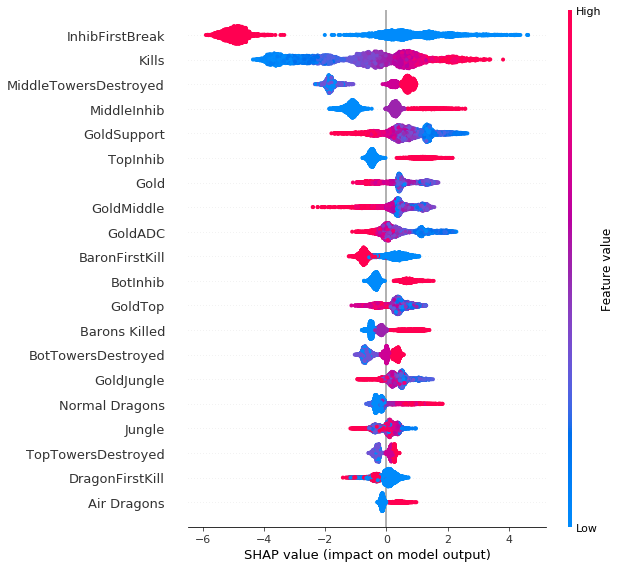

In [18]:
shap.summary_plot(shap_values, X_test)

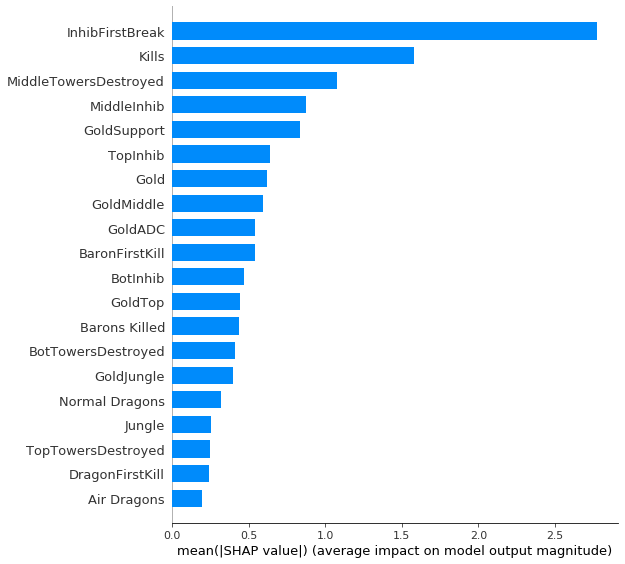

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

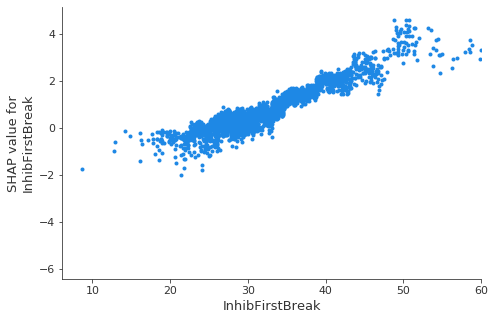

In [37]:
shap.dependence_plot("InhibFirstBreak", shap_values, X_test, interaction_index=None, xmax=60)

In [23]:
X_test.shape

(4572, 35)

In [24]:
X_test

Gold  Kills  Top  TopChamp  GoldTop  Jungle  JungleChamp  GoldJungle  \
2614    33442      4  178        12     7112     343           18        6070   
14934   62492      4  244        60    12057     313           56       10958   
14962   52480      4  288        43    10734     163           18        8882   
14702   38889      6  274        15     9133     243           18        7122   
487     81562      9  198        19    14857     128           18       14274   
...       ...    ...  ...       ...      ...     ...          ...         ...   
9158    59751     14  258        76    13624     275           33       10870   
6688    74668      6   61        19    17410      13           18       12853   
12174  108412     17    9        20    19450      14           56       19355   
777     38775      4  333        67     8452     328           31        8110   
4720    37924      6   72        16     7751     309           52        7686   

       Middle  MiddleChamp  ...  Fire Dragons  Earth Dragons  Air Dragons  \
2614      225           81  ...             0              0            0   
14934      33           10  ...             0              1            0   
14962      85           61  ...             0              0            0   
14702     106           10  ...             0              0            0   
487        83           77  ...             0              0            0   
...       ...          ...  ...           ...            ...          ...   
9158      180           38  ...             0              0            0   
6688       55           55  ...             0              0            0   
12174     117           41  ...             0              0            1   
777       247           78  ...             0              0            2   
4720      103           71  ...             0              0            0   

       Water Dragons  Elder Dragons  DragonFirstKill  Barons Killed  \
2614               0              0        10000.000              0   
14934              0              0           16.826              0   
14962              0              0           15.034              0   
14702              0              0        10000.000              0   
487                0              0           22.122              0   
...              ...            ...              ...            ...   
9158               0              0        10000.000              1   
6688               0              0        10000.000              1   
12174              0              1           34.986              2   
777                0              0            6.922              0   
4720               0              0        10000.000              0   

       BaronFirstKill  Herald Killed  HeraldFirstKill  
2614        10000.000              0          10000.0  
14934       10000.000              0          10000.0  
14962       10000.000              0          10000.0  
14702       10000.000              0          10000.0  
487         10000.000              0          10000.0  
...               ...            ...              ...  
9158           29.103              0          10000.0  
6688           35.502              0          10000.0  
12174          33.614              0          10000.0  
777         10000.000              0          10000.0  
4720        10000.000              0          10000.0  

[4572 rows x 35 columns]

In [25]:
dict_shap_values = {}
dict_top = {}
dict_top['Top'] = {}
for i, value in enumerate(X_test['Top'].values):
    
    if value not in dict_top['Top']:
        
        dict_top['Top'][value] = {'Shap sum': 0, 'Count': 0}
        
    dict_top['Top'][value]['Shap sum'] += shap_values[i][2]
    dict_top['Top'][value]['Count'] += 1
    

In [154]:
dict_top

{'Top': {178: {'Shap sum': 6.195334432180971, 'Count': 92},
  244: {'Shap sum': -0.06887552421540022, 'Count': 26},
  288: {'Shap sum': 0.3657347848638892, 'Count': 6},
  274: {'Shap sum': -1.2784114080131985, 'Count': 18},
  198: {'Shap sum': -1.4713463839143515, 'Count': 27},
  25: {'Shap sum': -7.406771510839462, 'Count': 16},
  301: {'Shap sum': -5.691302235238254, 'Count': 32},
  286: {'Shap sum': -0.04196987301111221, 'Count': 10},
  92: {'Shap sum': 2.3241640459746122, 'Count': 34},
  153: {'Shap sum': 1.3267092242022045, 'Count': 33},
  256: {'Shap sum': 2.163470905739814, 'Count': 32},
  16: {'Shap sum': -6.067992478609085, 'Count': 11},
  312: {'Shap sum': -11.427972339093685, 'Count': 30},
  134: {'Shap sum': 1.8786133471876383, 'Count': 12},
  147: {'Shap sum': 1.1007846798747778, 'Count': 11},
  194: {'Shap sum': -1.105579411610961, 'Count': 18},
  61: {'Shap sum': 15.229889768757857, 'Count': 102},
  66: {'Shap sum': 1.5882799923419952, 'Count': 10},
  314: {'Shap sum': -

In [165]:
dict_final = {}
for key, value in dict_top['Top'].items():
    mean = value['Shap sum'] / value['Count']
    
    dict_final[key] = mean

In [166]:
dict_final

{178: 0.06734059165414098,
 244: -0.0026490586236692392,
 288: 0.06095579747731487,
 274: -0.07102285600073326,
 198: -0.05449431051534635,
 25: -0.4629232194274664,
 301: -0.17785319485119544,
 286: -0.004196987301111221,
 92: 0.06835776605807684,
 153: 0.040203309824309225,
 256: 0.06760846580436919,
 16: -0.5516356798735532,
 312: -0.38093241130312283,
 134: 0.15655111226563653,
 147: 0.1000713345340707,
 194: -0.06142107842283116,
 61: 0.1493126447917437,
 66: 0.15882799923419952,
 314: -0.3299872353672981,
 69: 0.126957938311592,
 10: 0.058634346319983405,
 285: 0.0362369375902095,
 168: 0.01563601807380716,
 72: 0.16317131088087053,
 90: 0.1042609378399158,
 129: 0.11624135272577404,
 79: 0.09717016556775586,
 225: -0.11156598607508036,
 144: 0.09885050803705146,
 253: 0.06795735235015551,
 98: 0.13123309290746138,
 294: 0.02643897674922178,
 222: -0.020831100270152093,
 238: -0.04549490516850104,
 245: 0.04653745197720127,
 140: 0.11423338284105833,
 126: 0.10973371066419142,
 2

In [26]:
y_test.reset_index(drop=True, inplace=True)

In [27]:
X_test.reset_index(drop=True, inplace=True)

In [31]:
errors = []

for i, y_pred_value in enumerate(y_pred):
    
    if y_test.values[i] != y_pred_value:
        
        errors.append(i)
        print(i)

10
35
59
63
80
86
101
172
209
210
232
274
297
306
309
331
334
352
360
420
424
426
428
439
443
444
491
495
519
559
587
595
603
618
626
698
712
743
775
789
801
870
873
897
921
927
936
947
954
998
1010
1011
1021
1041
1068
1088
1163
1252
1260
1297
1422
1439
1453
1466
1502
1508
1517
1539
1570
1618
1674
1718
1733
1775
1808
1833
1842
1851
1874
1904
1925
1984
2019
2035
2099
2108
2152
2163
2192
2222
2233
2261
2284
2331
2351
2389
2473
2493
2545
2583
2587
2597
2606
2665
2698
2705
2712
2727
2744
2751
2756
2771
2783
2815
2830
2849
2869
2874
2893
2918
2922
2945
2969
2970
2986
3029
3038
3098
3127
3174
3199
3247
3266
3273
3280
3313
3314
3326
3330
3339
3355
3359
3377
3394
3404
3408
3428
3447
3633
3647
3694
3729
3746
3939
3945
3982
3992
4014
4043
4065
4088
4089
4112
4114
4120
4133
4178
4209
4212
4229
4276
4324
4342
4350
4380
4405
4413
4419
4438
4493
4521
4565


10
0


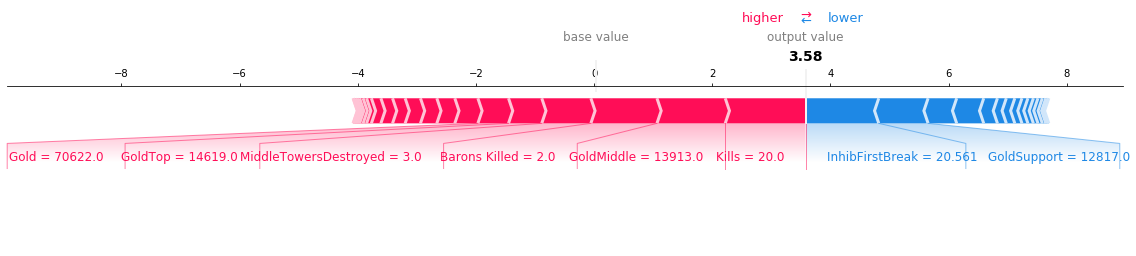

35
0


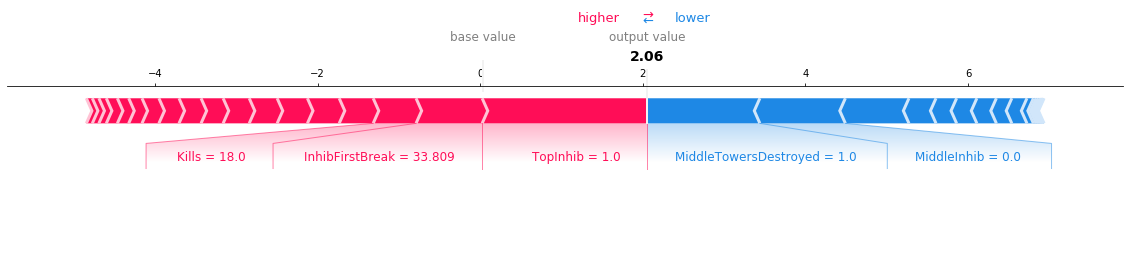

59
0


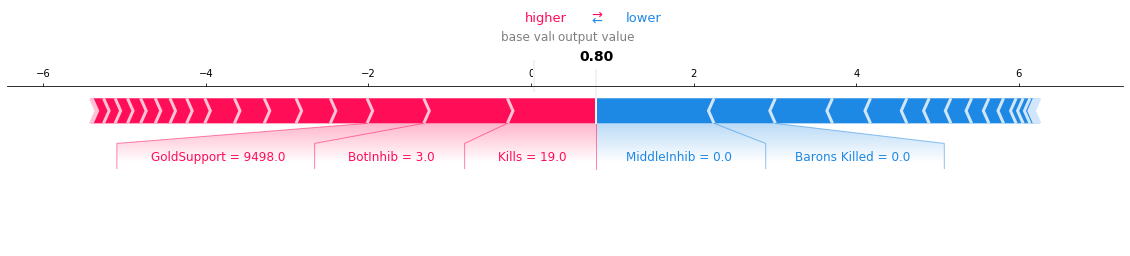

63
1


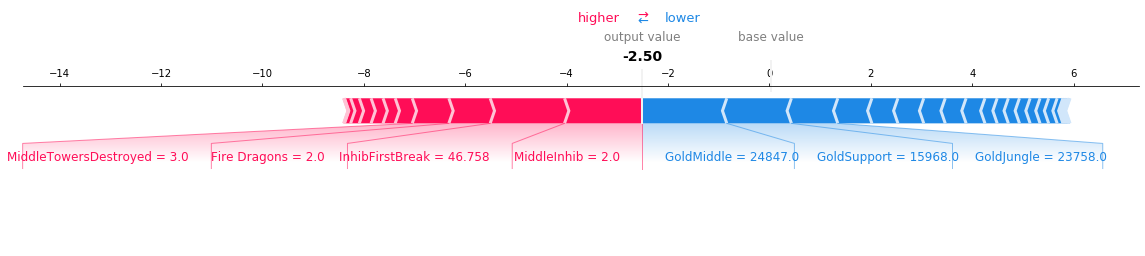

80
0


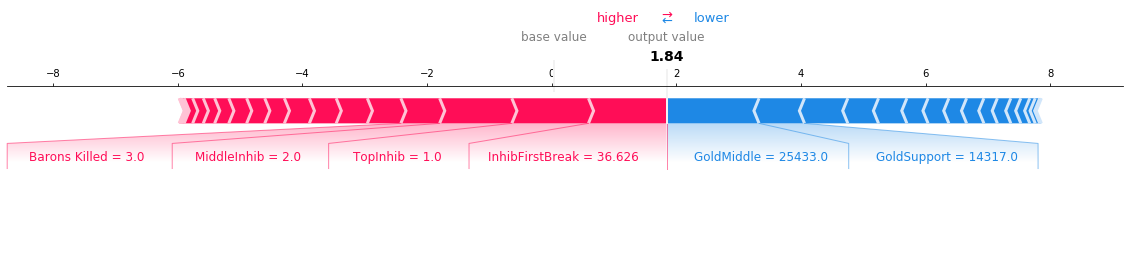

86
1


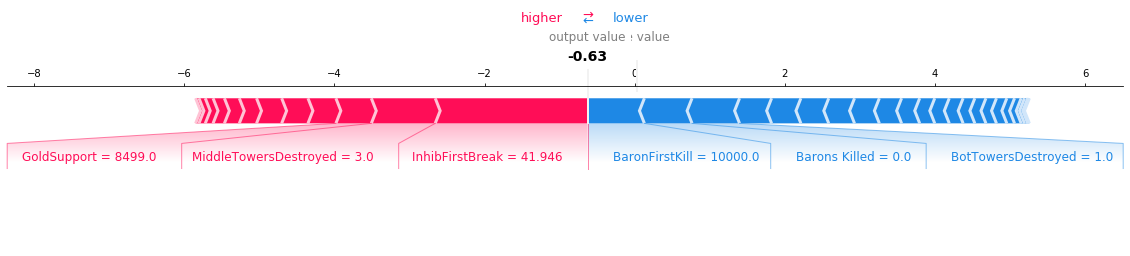

101
0


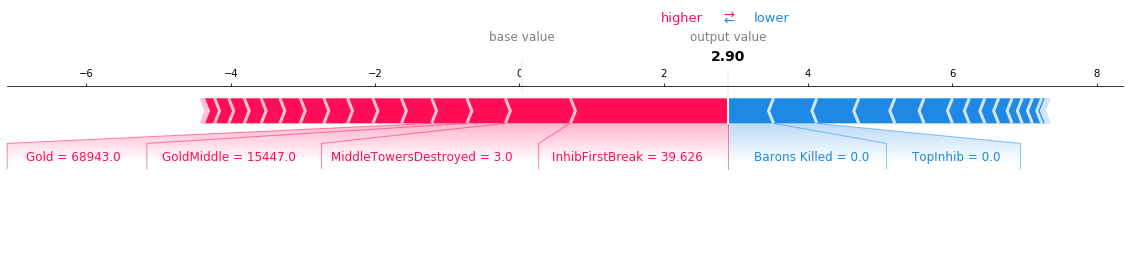

172
1


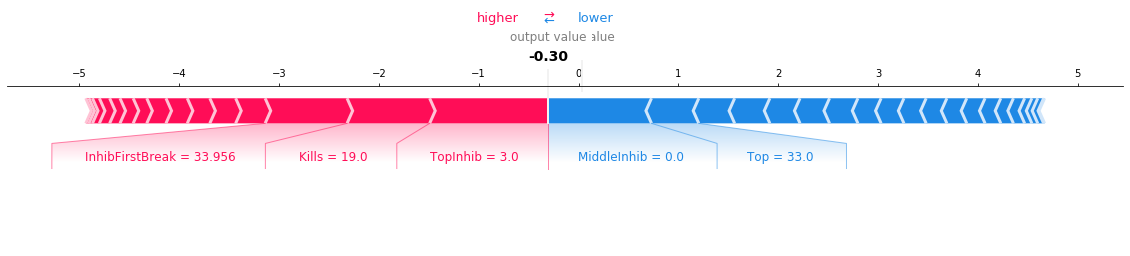

209
1


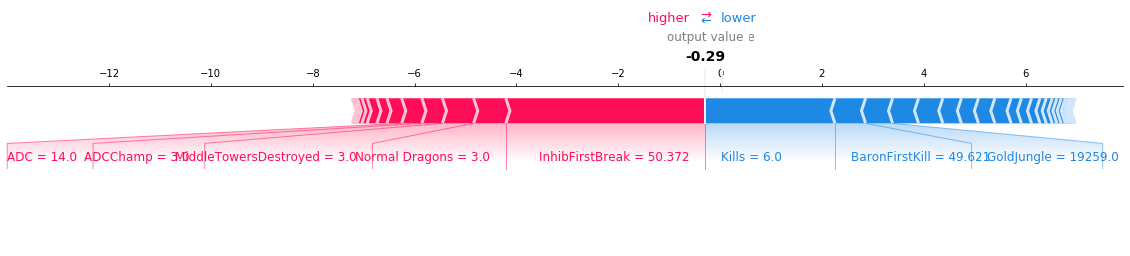

210
0


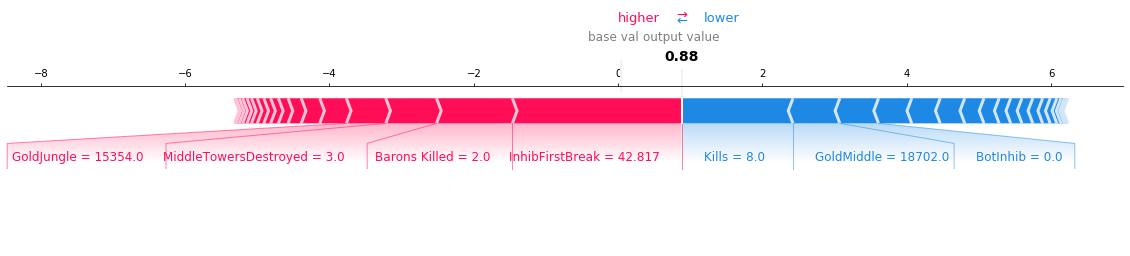

In [35]:
for i in errors[:10]:
    
    print(i)
    print(y_test[i])
    
    shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:], matplotlib=True)

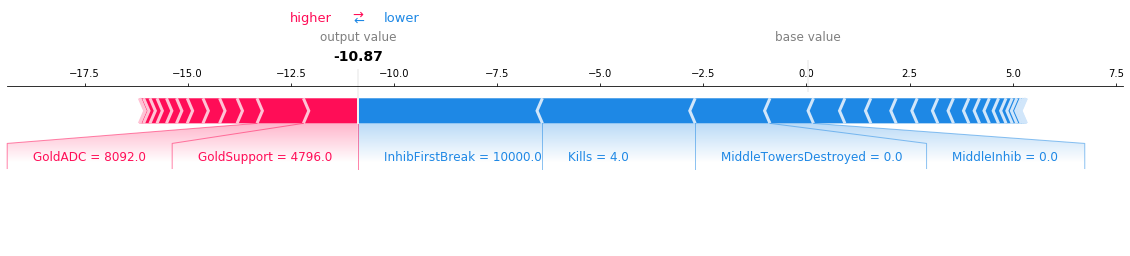

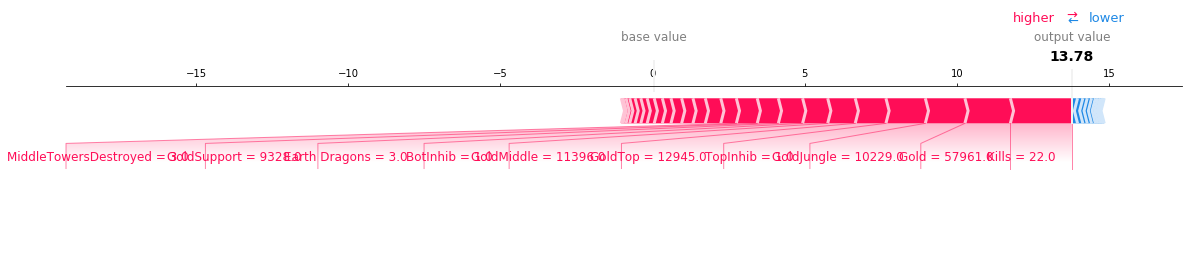

In [50]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

shap.force_plot(explainer.expected_value, shap_values[11,:], X_test.iloc[11,:], matplotlib=True)

In [91]:
explainer.expected_value

0.029218646

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Real: 0  --- Predict: 1


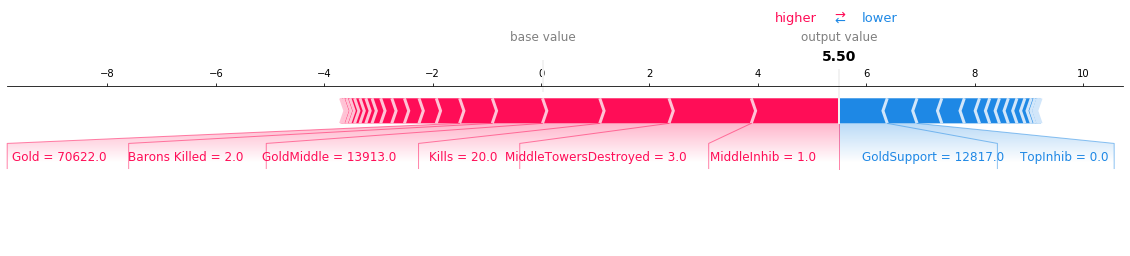

Real: 0  --- Predict: 1


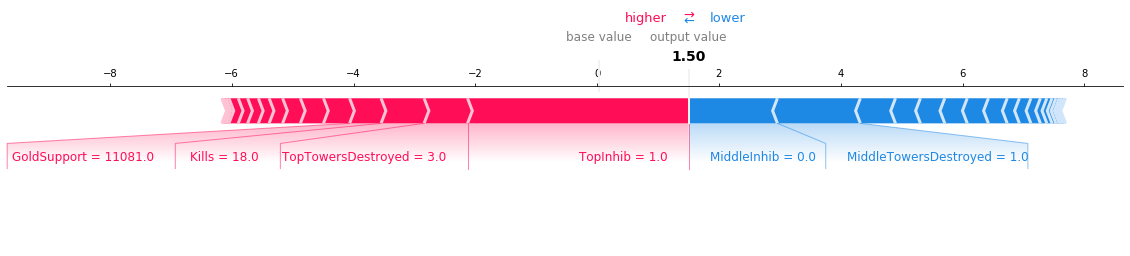

Real: 0  --- Predict: 1


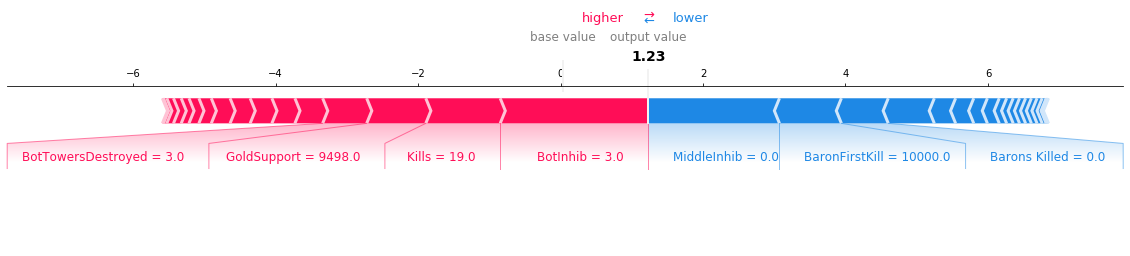

Real: 0  --- Predict: 1


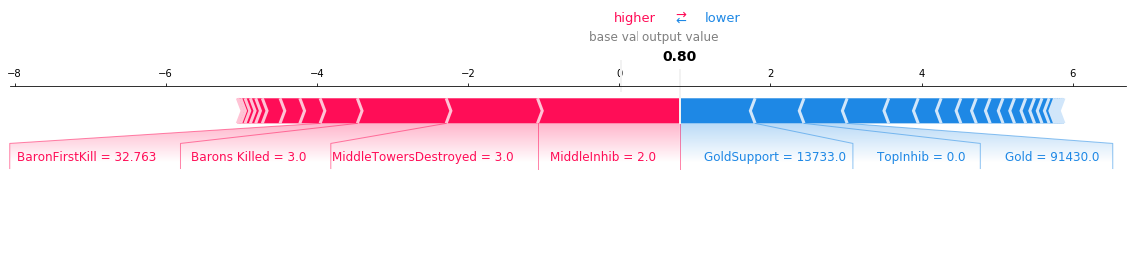

Real: 1  --- Predict: 0


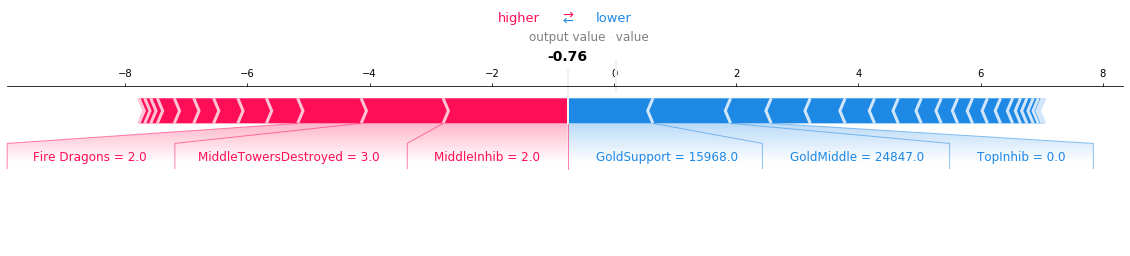

Real: 0  --- Predict: 1


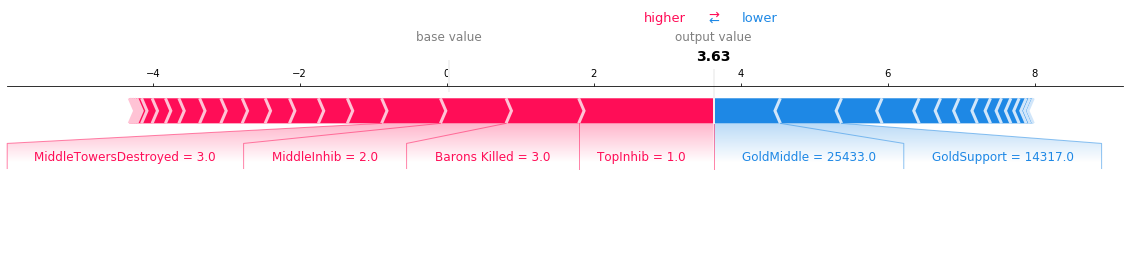

Real: 1  --- Predict: 0


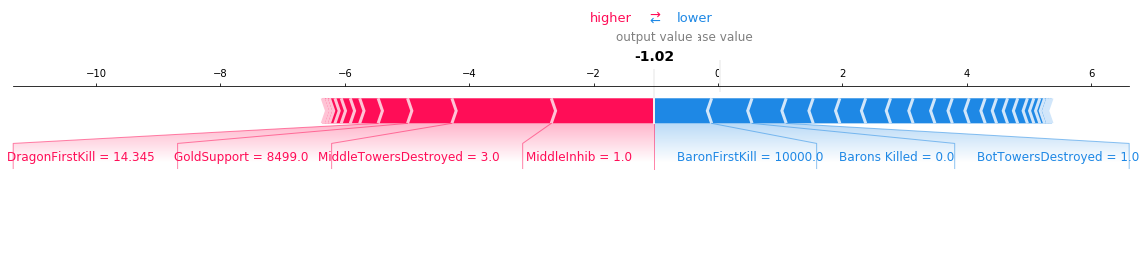

Real: 0  --- Predict: 1


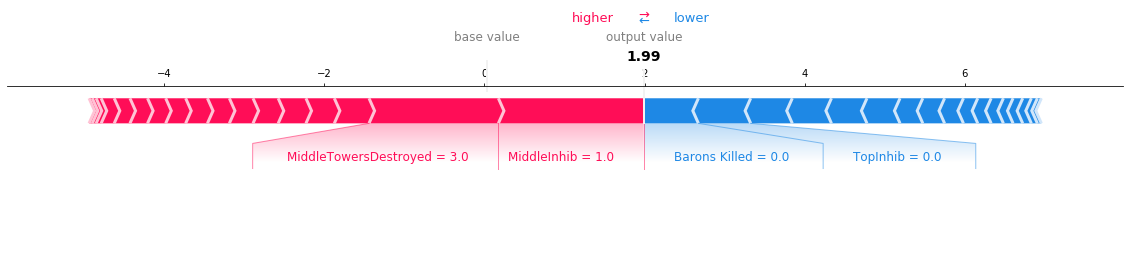

Real: 0  --- Predict: 1


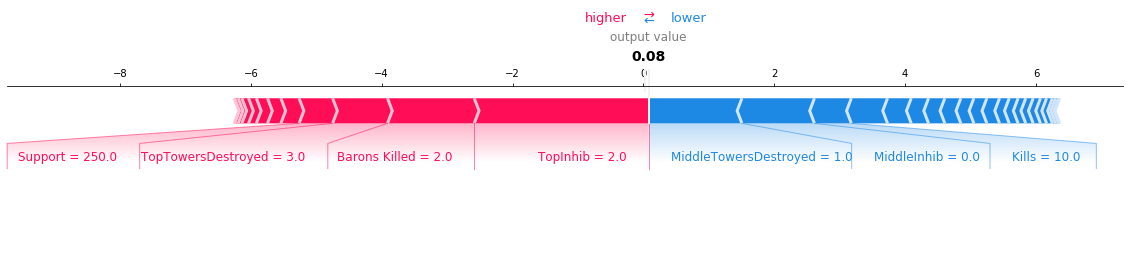

Real: 1  --- Predict: 0


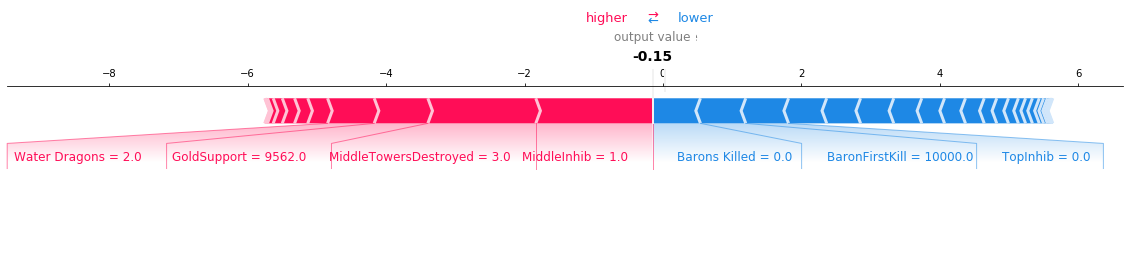

Real: 0  --- Predict: 1


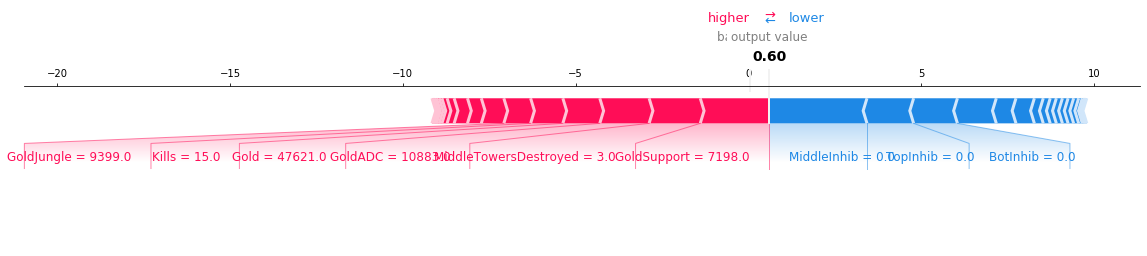

Real: 1  --- Predict: 0


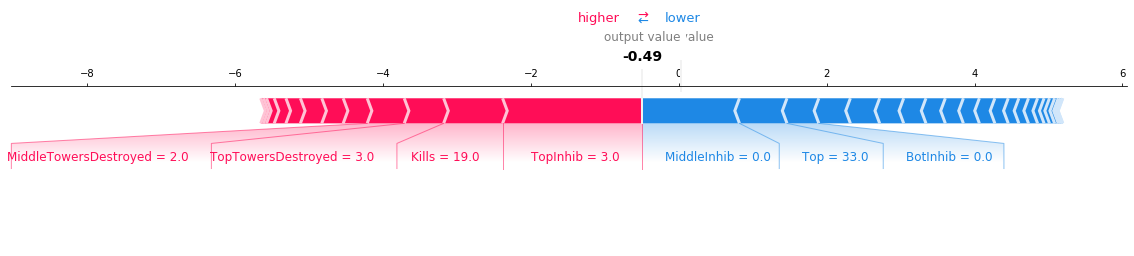

Real: 1  --- Predict: 0


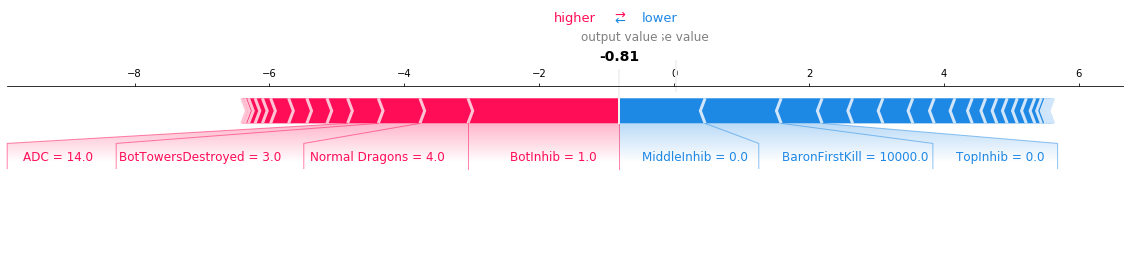

Real: 1  --- Predict: 0


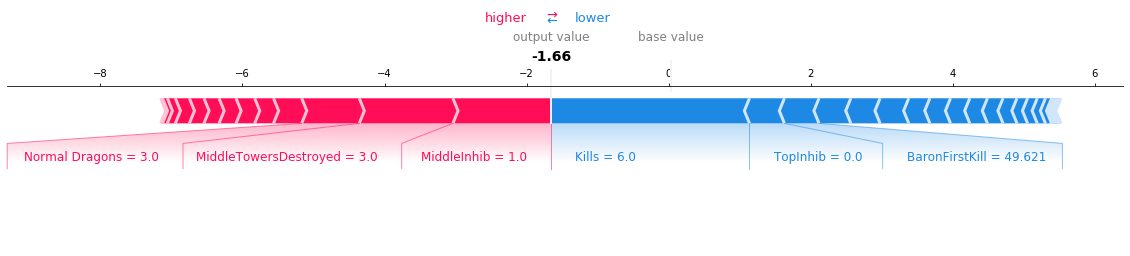

Real: 0  --- Predict: 1


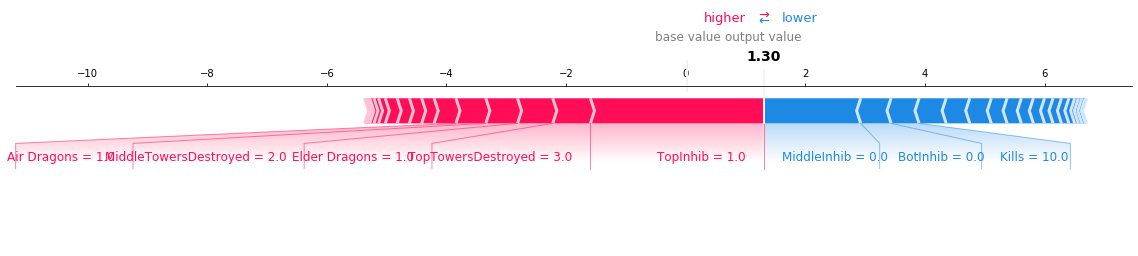

Real: 0  --- Predict: 1


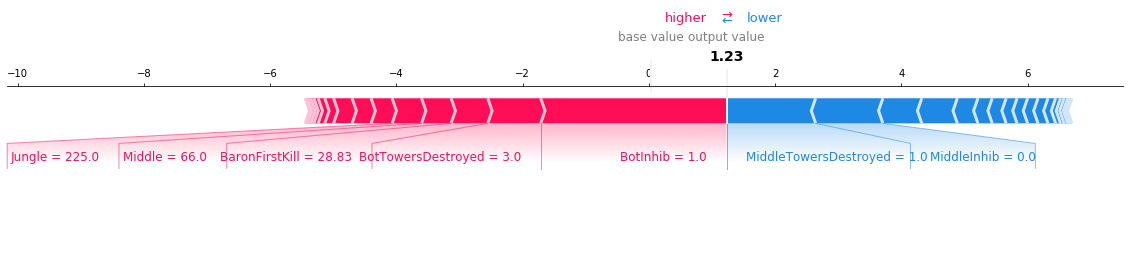

Real: 0  --- Predict: 1


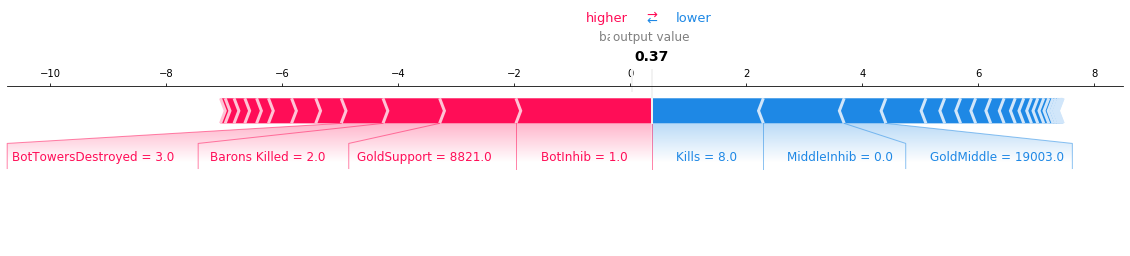

Real: 0  --- Predict: 1


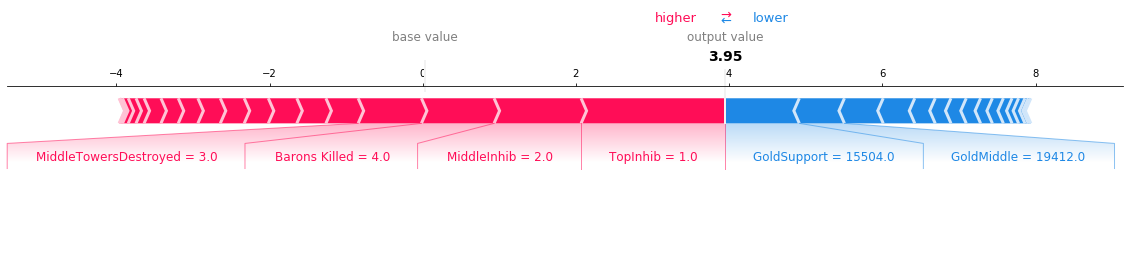

Real: 0  --- Predict: 1


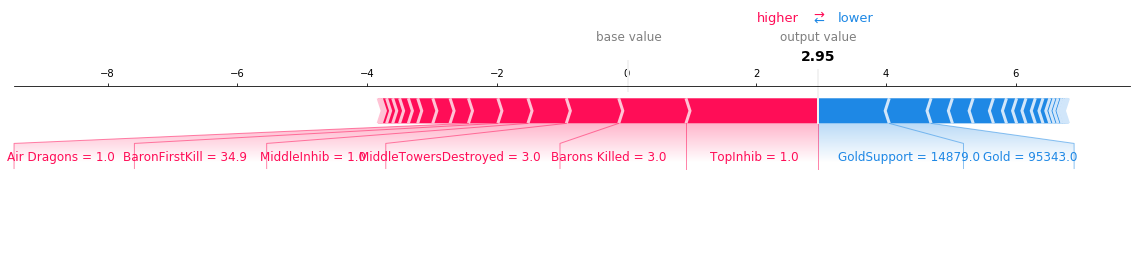

Real: 0  --- Predict: 1


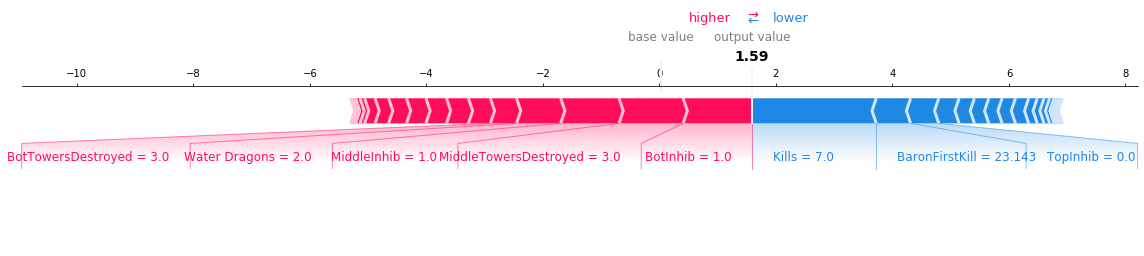

Real: 0  --- Predict: 1


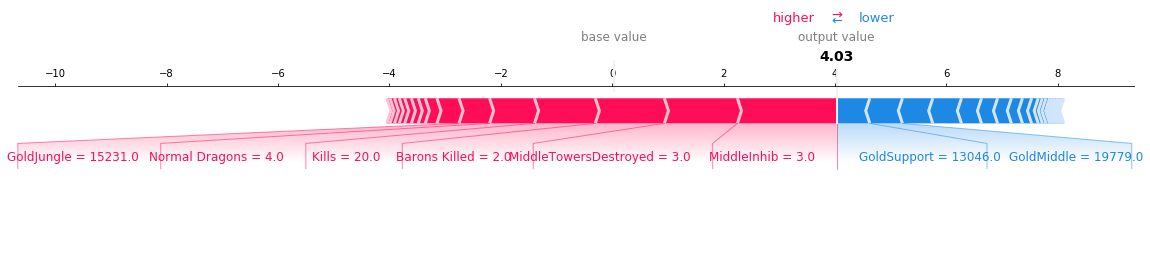

Real: 0  --- Predict: 1


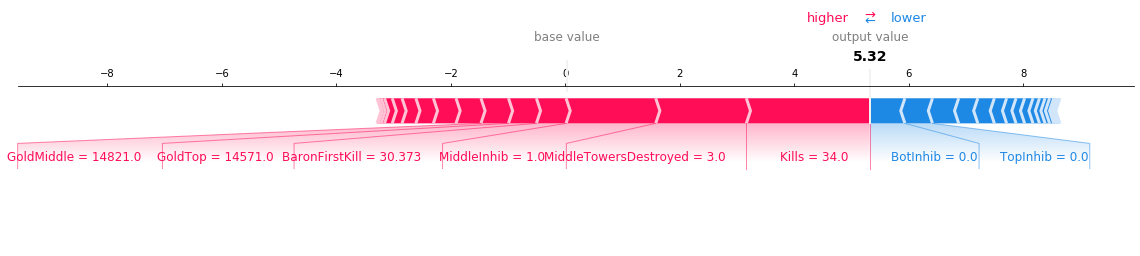

Real: 0  --- Predict: 1


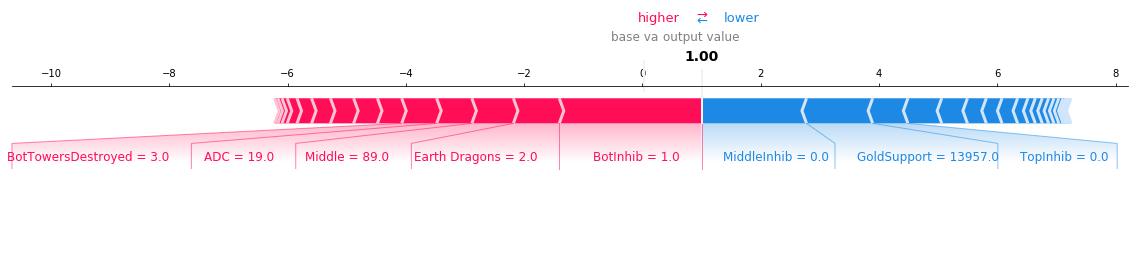

Real: 1  --- Predict: 0


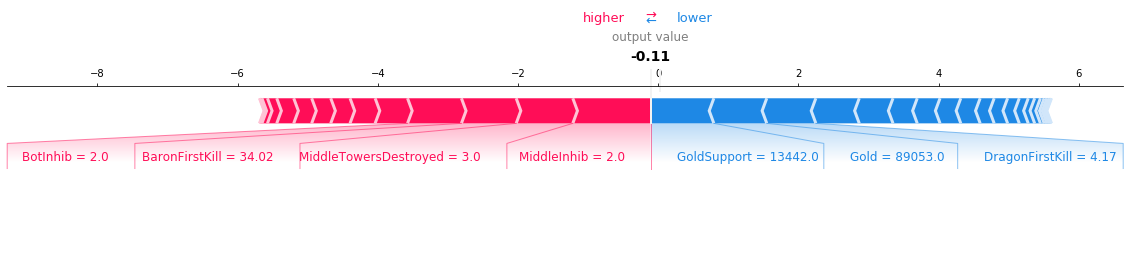

Real: 0  --- Predict: 1


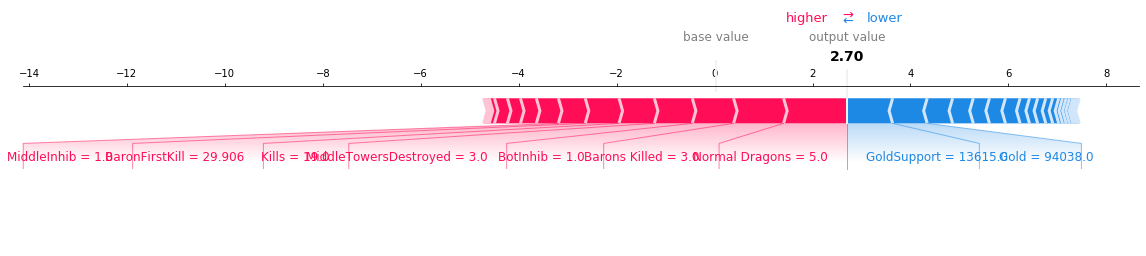

Real: 0  --- Predict: 1


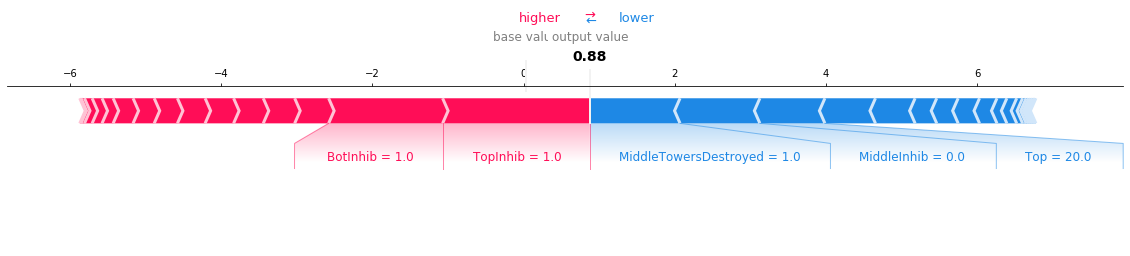

Real: 1  --- Predict: 0


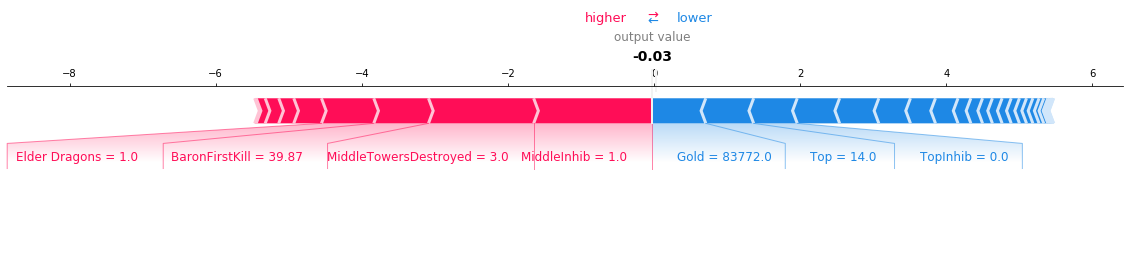

Real: 0  --- Predict: 1


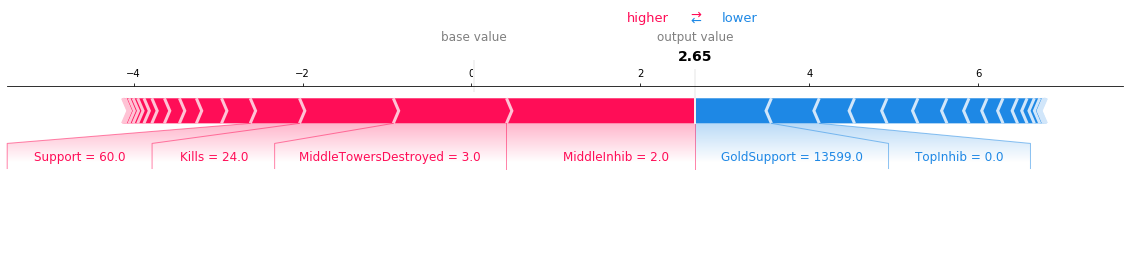

Real: 0  --- Predict: 1


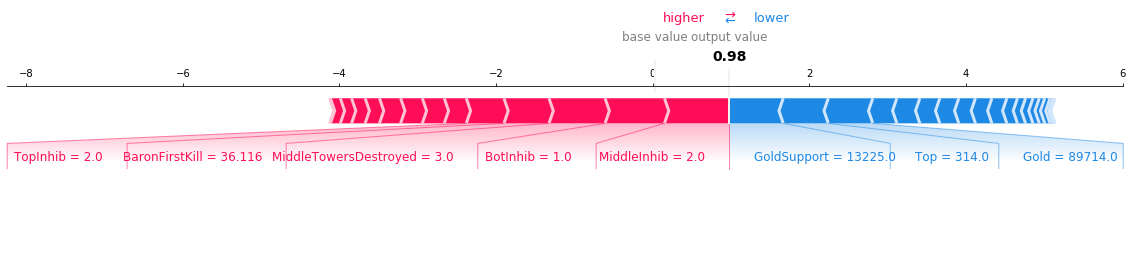

Real: 0  --- Predict: 1


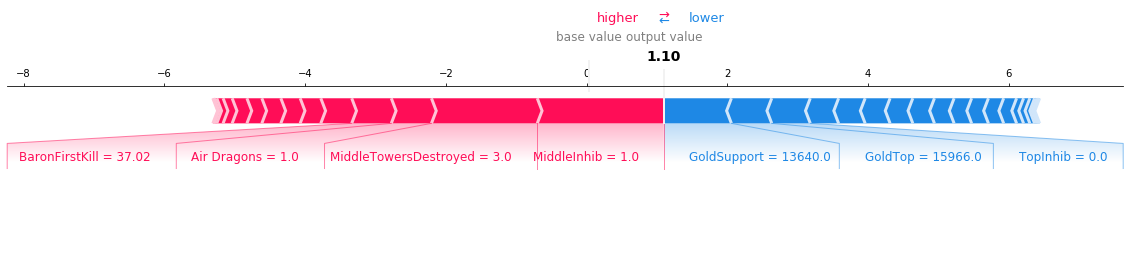

Real: 0  --- Predict: 1


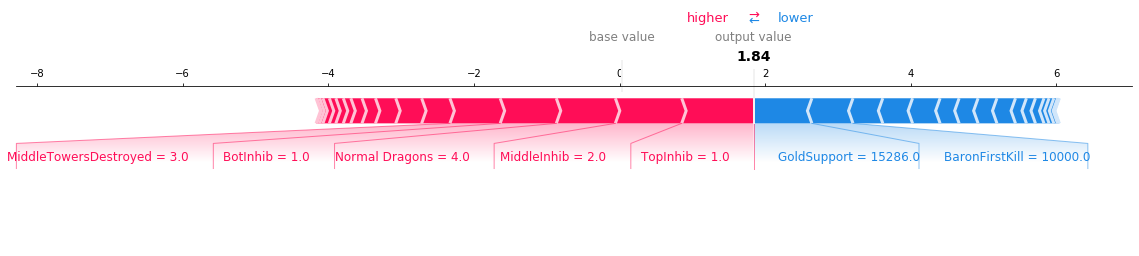

Real: 0  --- Predict: 1


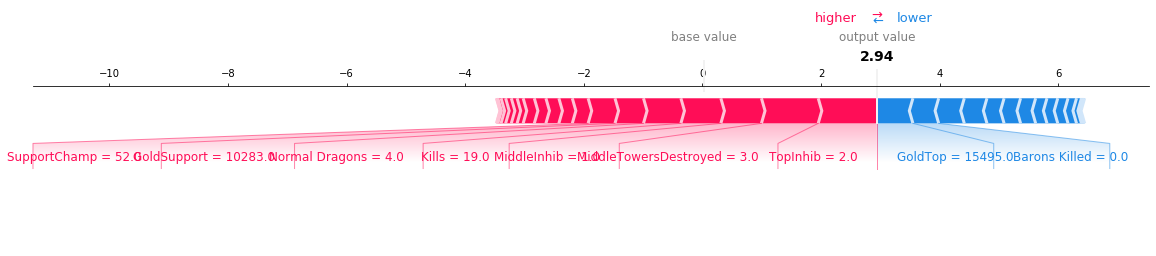

Real: 0  --- Predict: 1


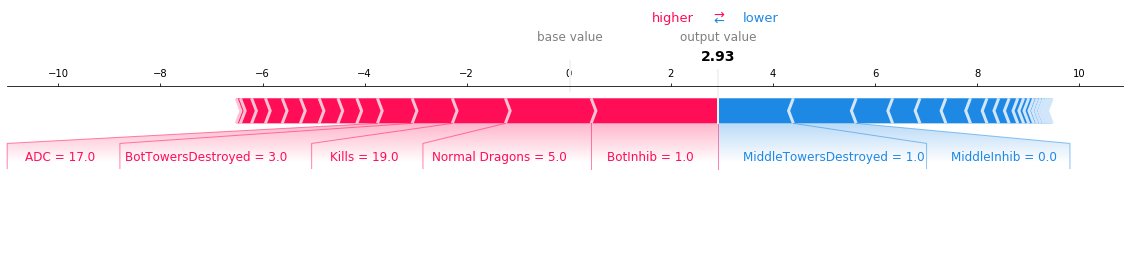

Real: 1  --- Predict: 0


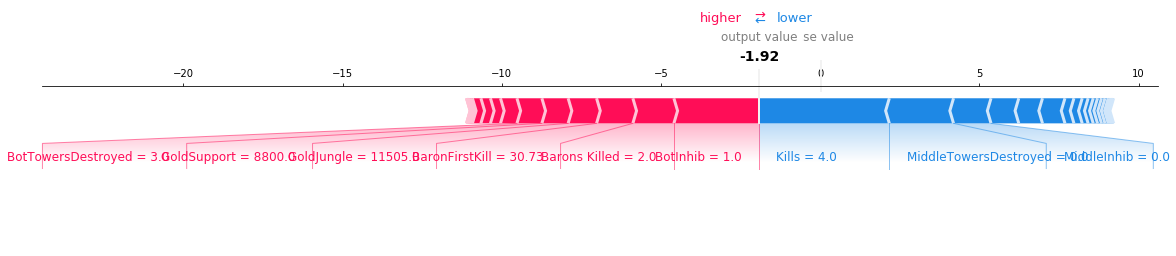

Real: 0  --- Predict: 1


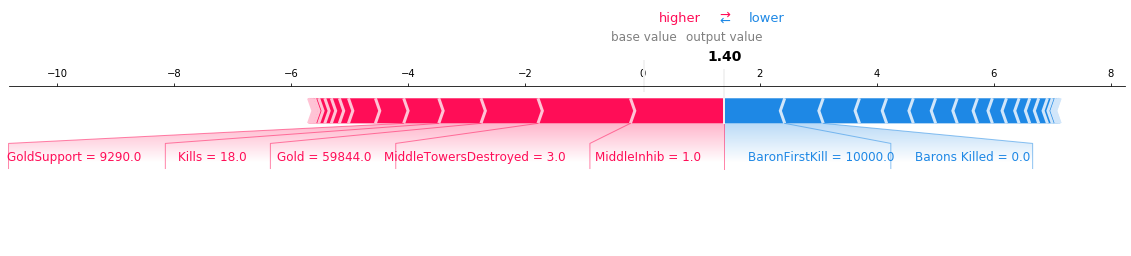

Real: 1  --- Predict: 0


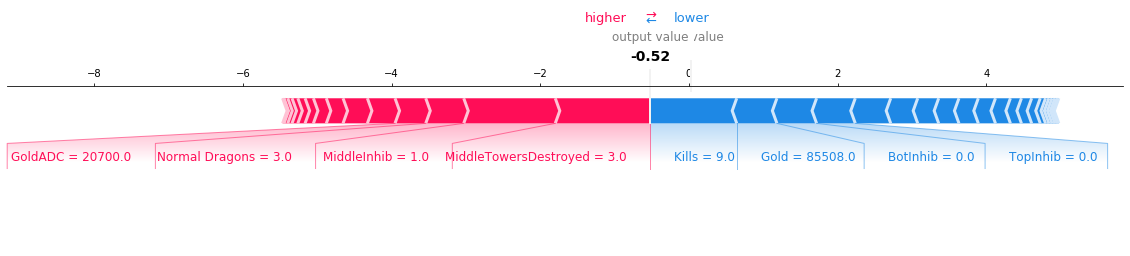

Real: 0  --- Predict: 1


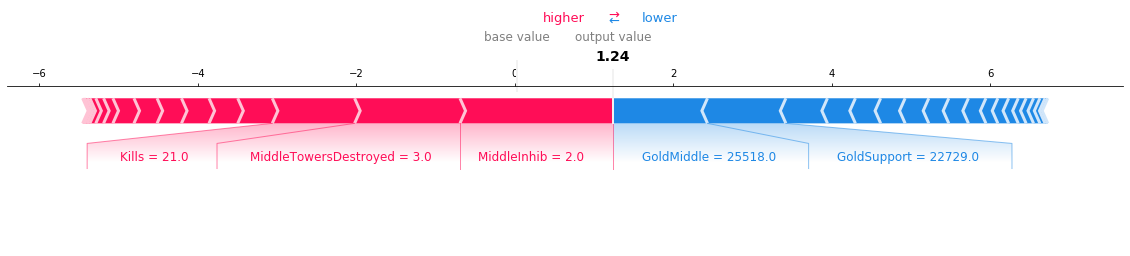

Real: 0  --- Predict: 1


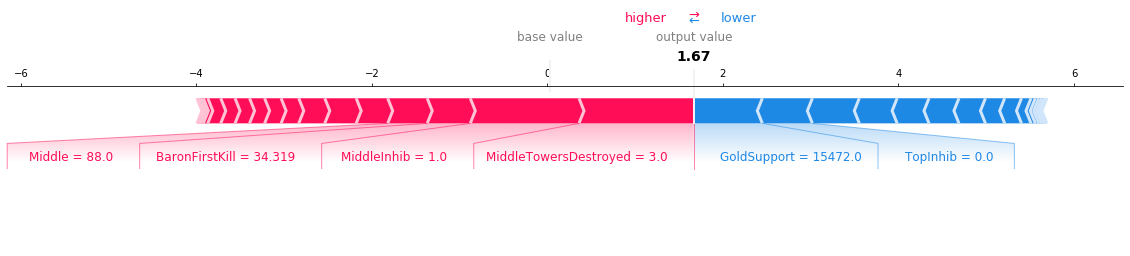

Real: 1  --- Predict: 0


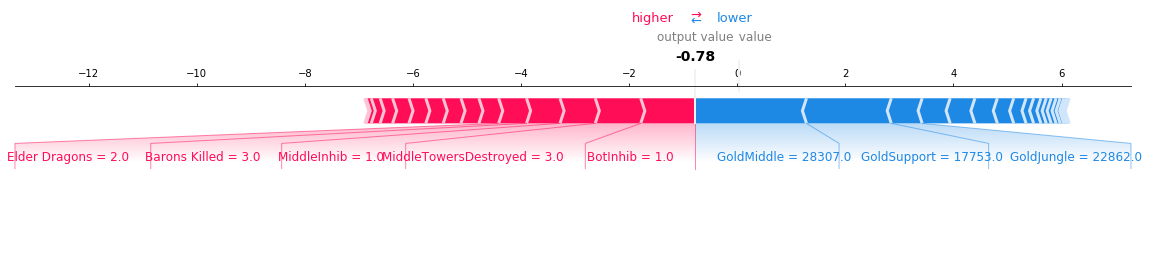

Real: 0  --- Predict: 1


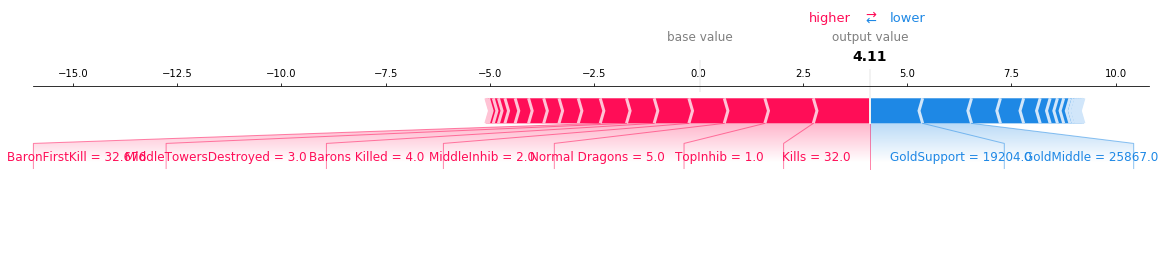

Real: 0  --- Predict: 1


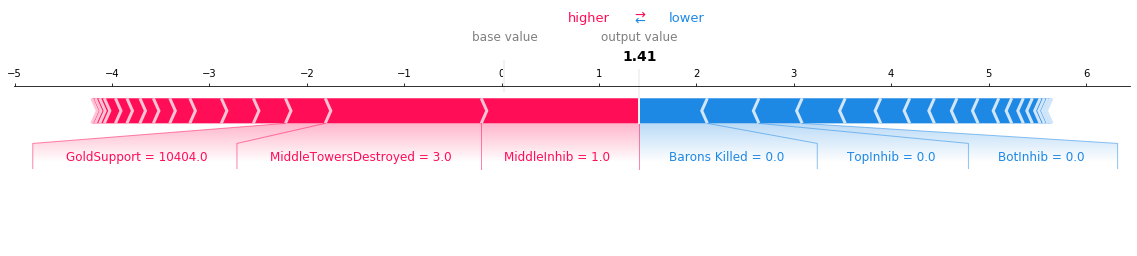

Real: 0  --- Predict: 1


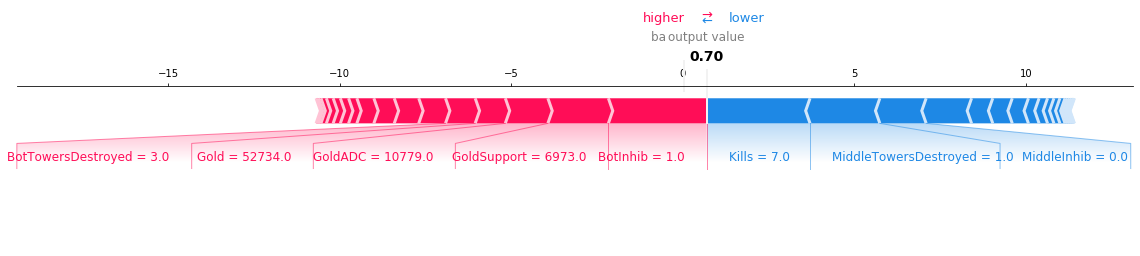

Real: 0  --- Predict: 1


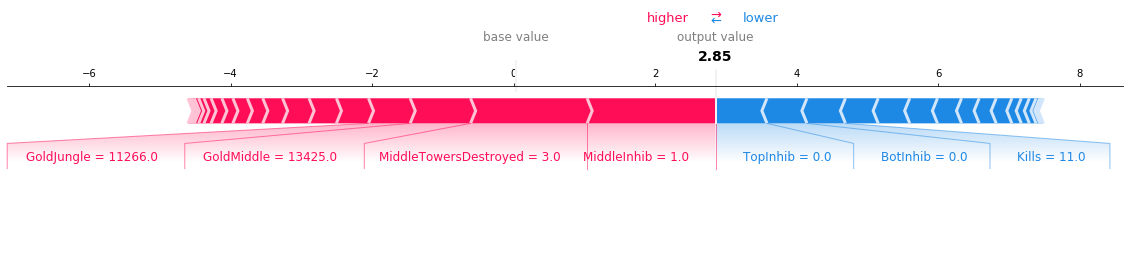

Real: 0  --- Predict: 1


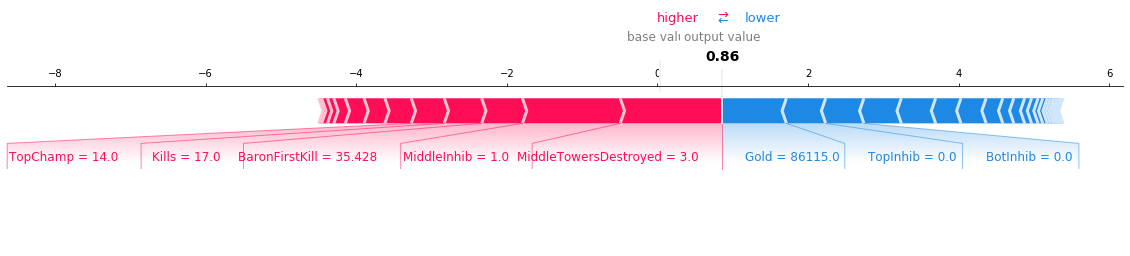

Real: 1  --- Predict: 0


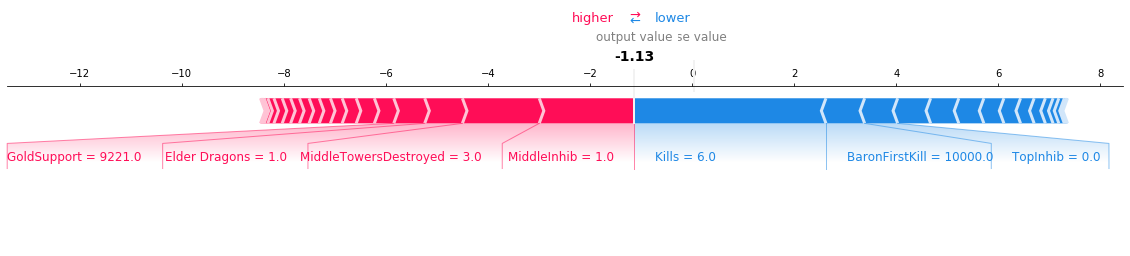

Real: 0  --- Predict: 1


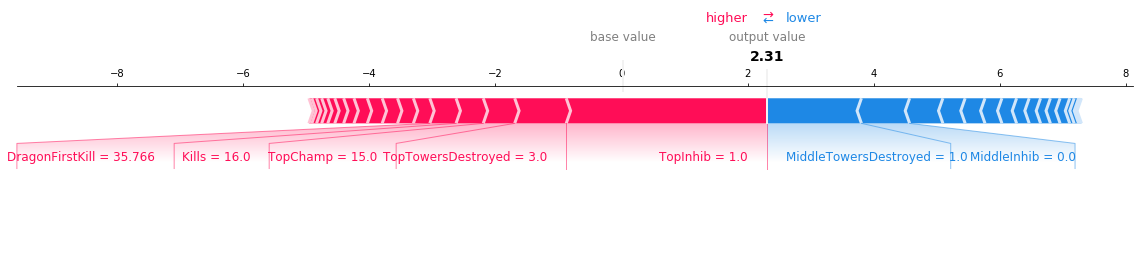

Real: 0  --- Predict: 1


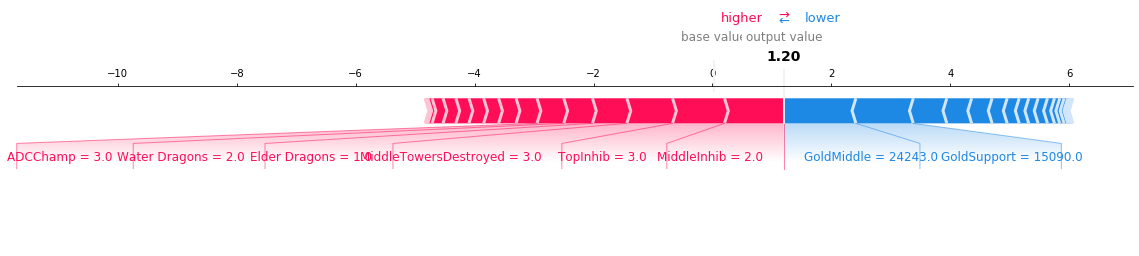

Real: 1  --- Predict: 0


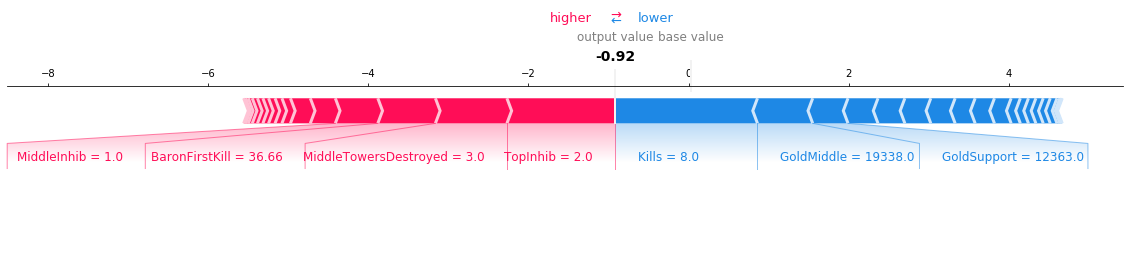

Real: 0  --- Predict: 1


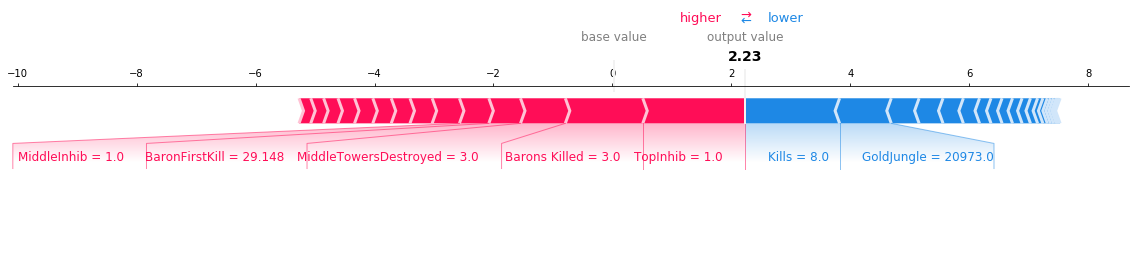

Real: 1  --- Predict: 0


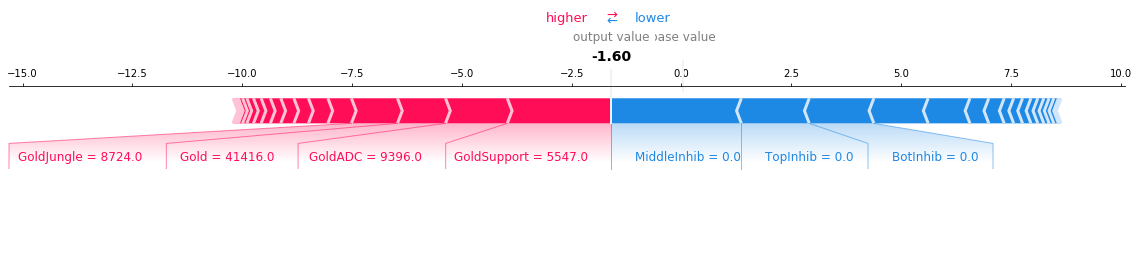

Real: 0  --- Predict: 1


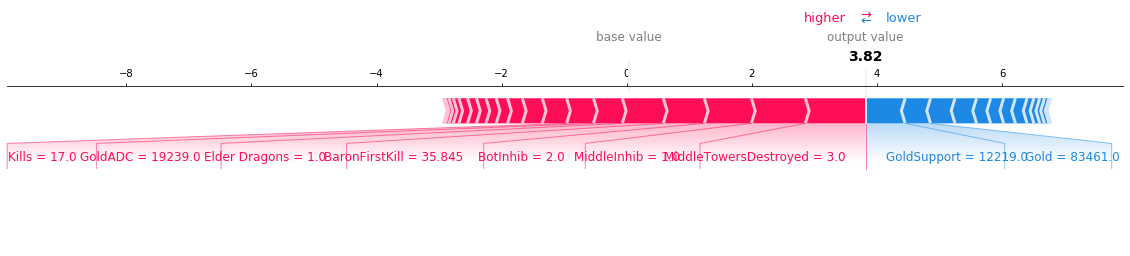

Real: 0  --- Predict: 1


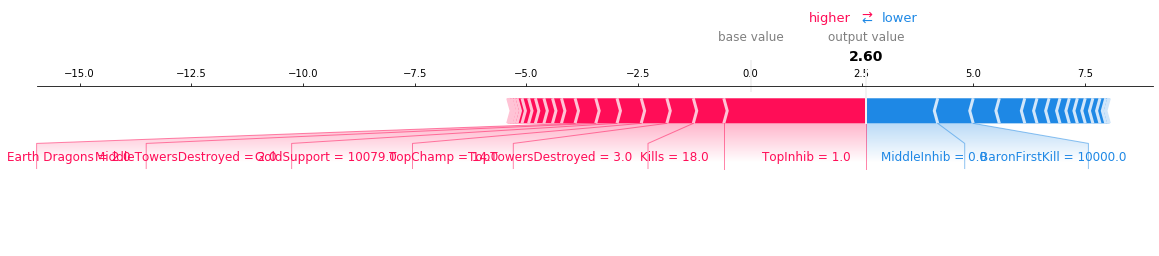

Real: 1  --- Predict: 0


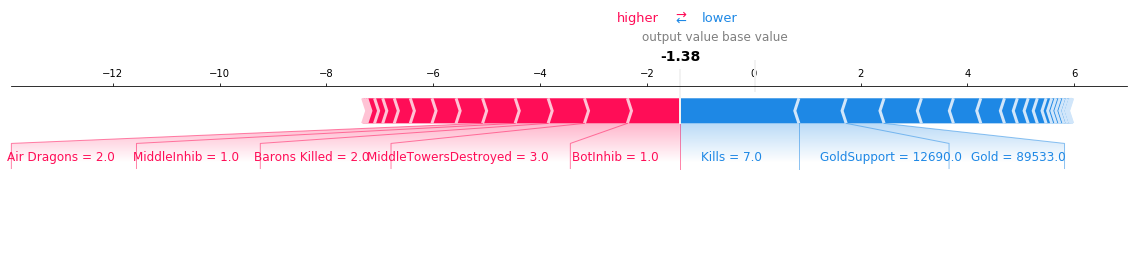

Real: 0  --- Predict: 1


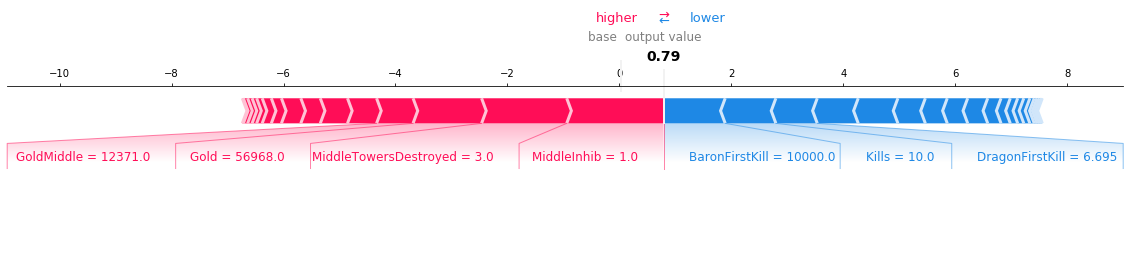

Real: 0  --- Predict: 1


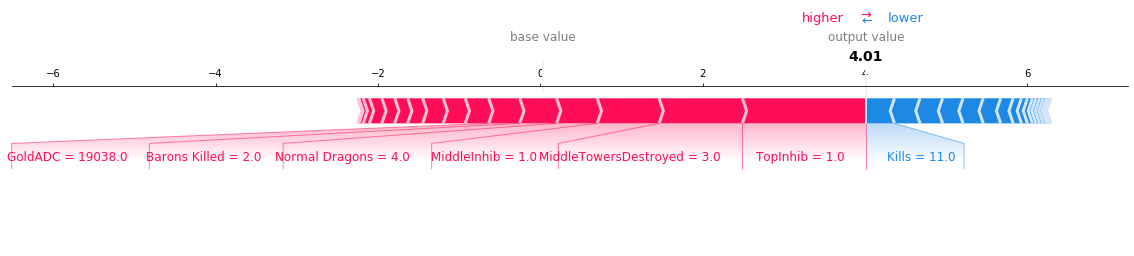

Real: 0  --- Predict: 1


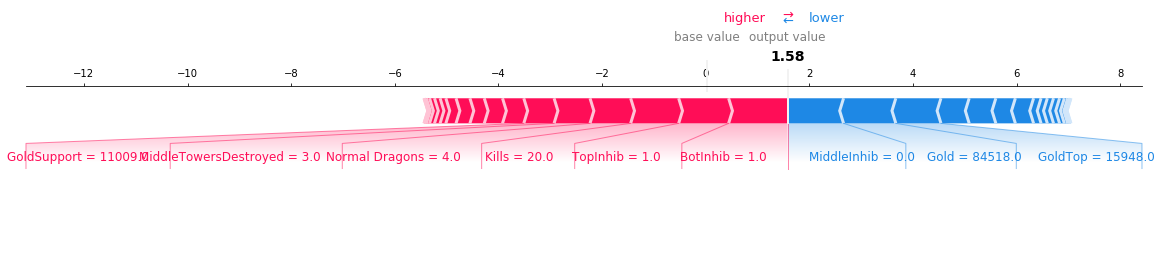

Real: 0  --- Predict: 1


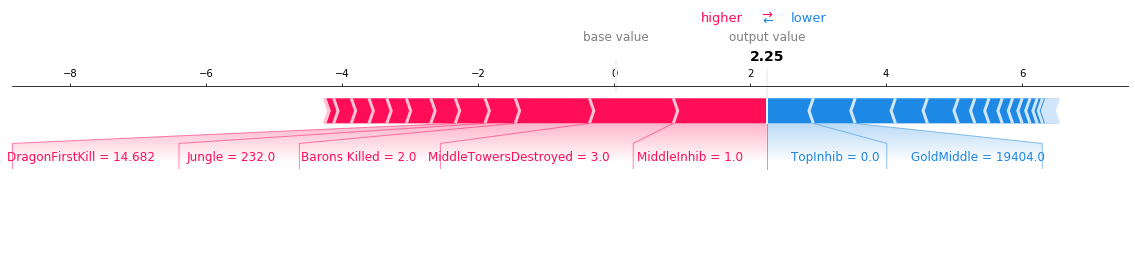

Real: 0  --- Predict: 1


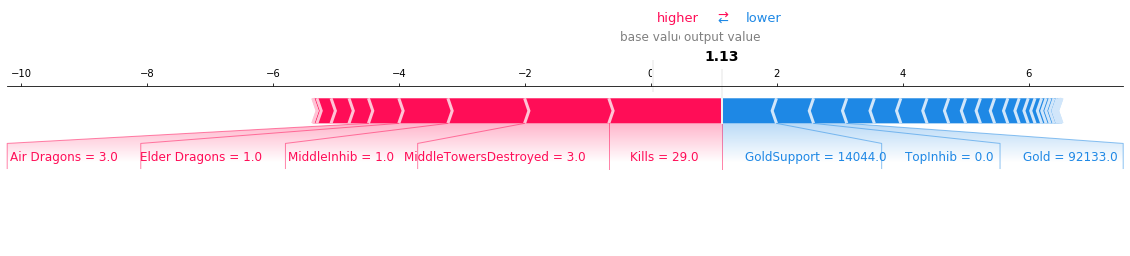

Real: 0  --- Predict: 1


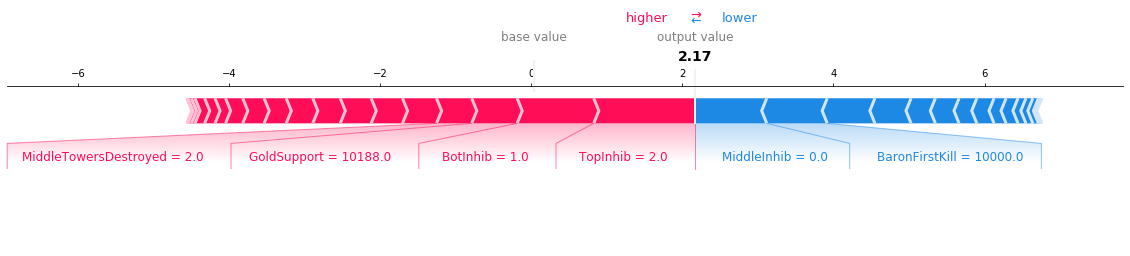

Real: 0  --- Predict: 1


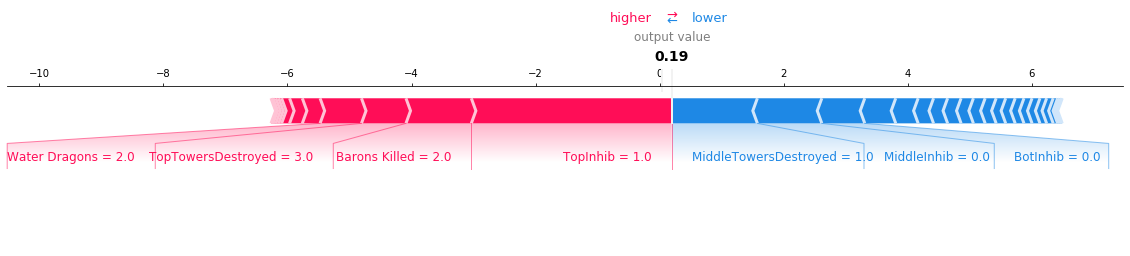

Real: 0  --- Predict: 1


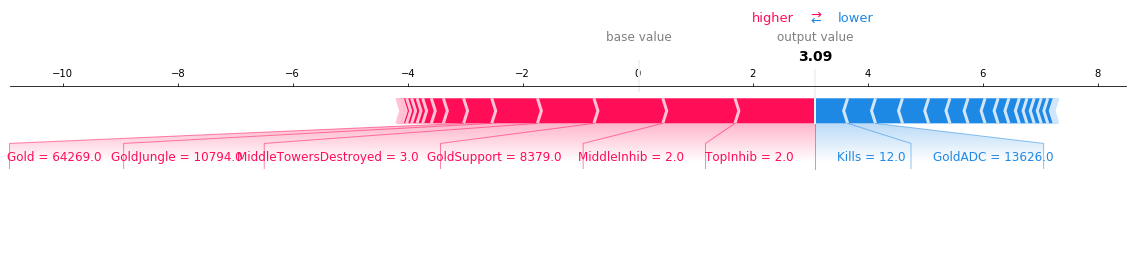

Real: 1  --- Predict: 0


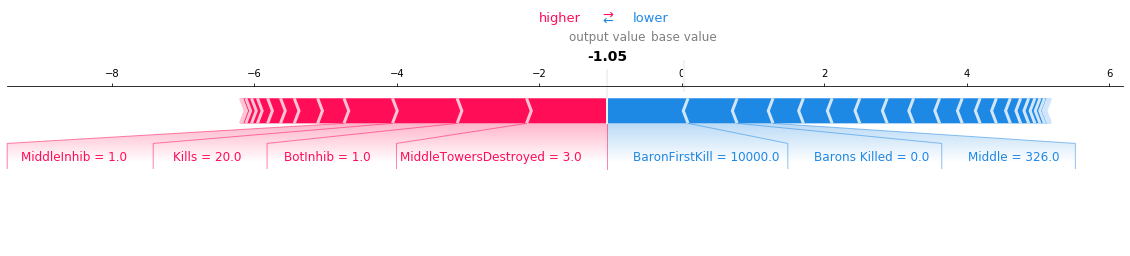

Real: 1  --- Predict: 0


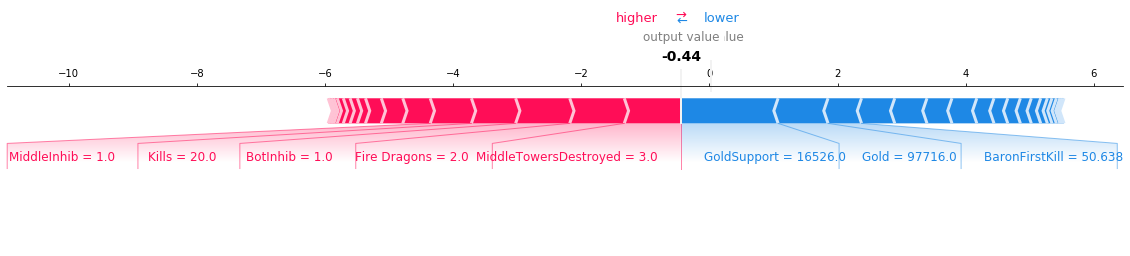

Real: 0  --- Predict: 1


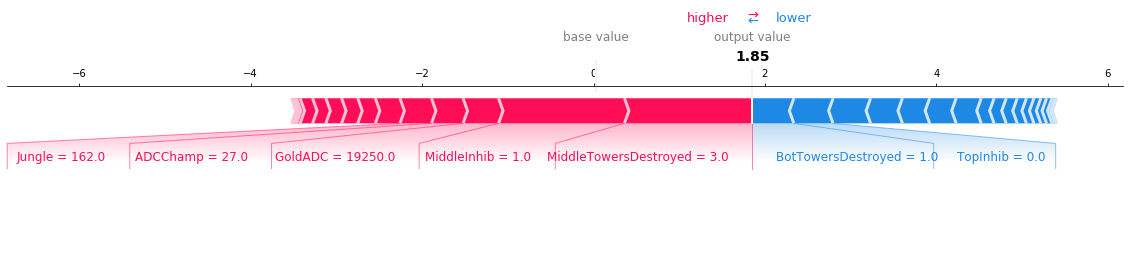

Real: 0  --- Predict: 1


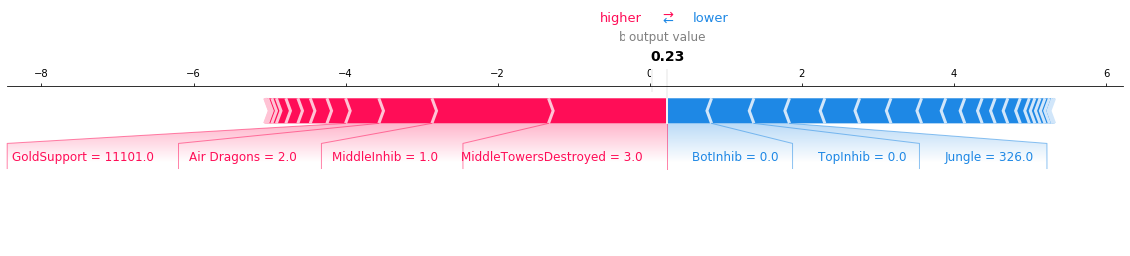

Real: 0  --- Predict: 1


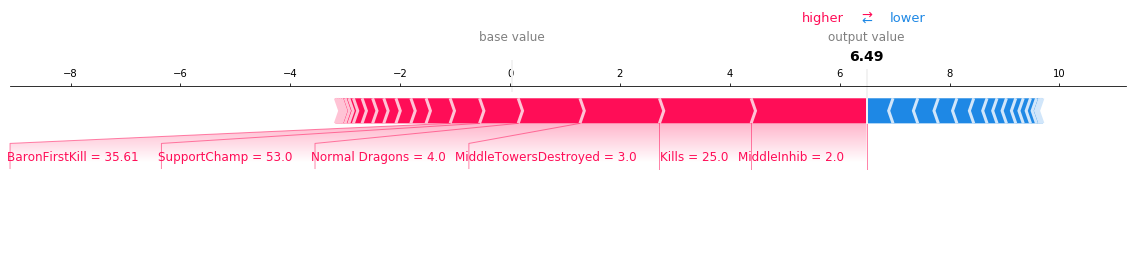

Real: 0  --- Predict: 1


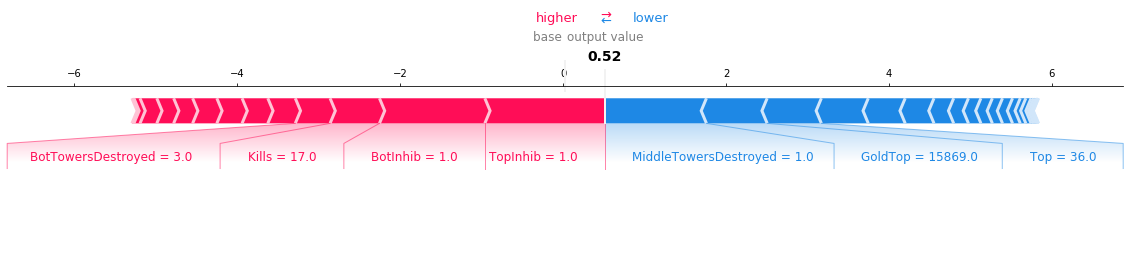

Real: 0  --- Predict: 1


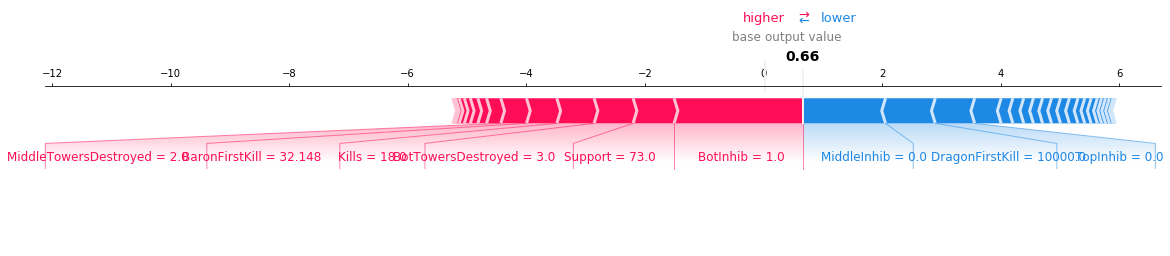

Real: 0  --- Predict: 1


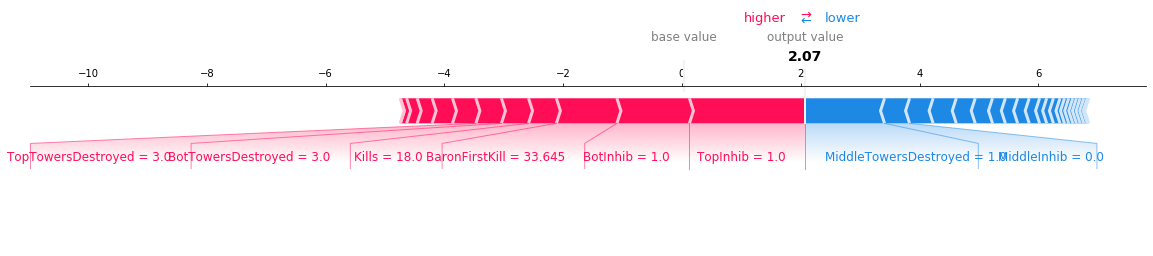

Real: 1  --- Predict: 0


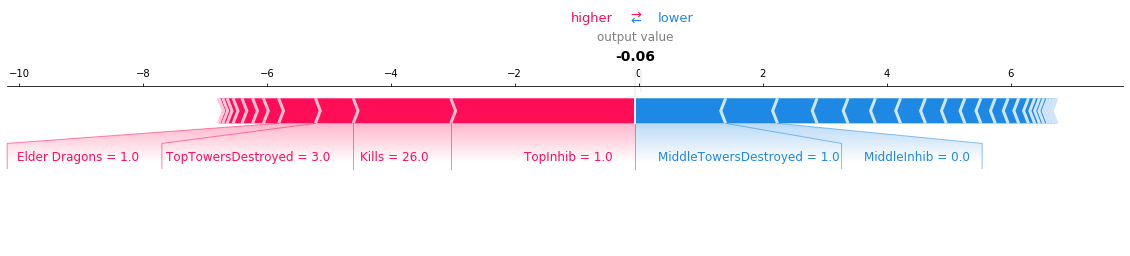

Real: 1  --- Predict: 0


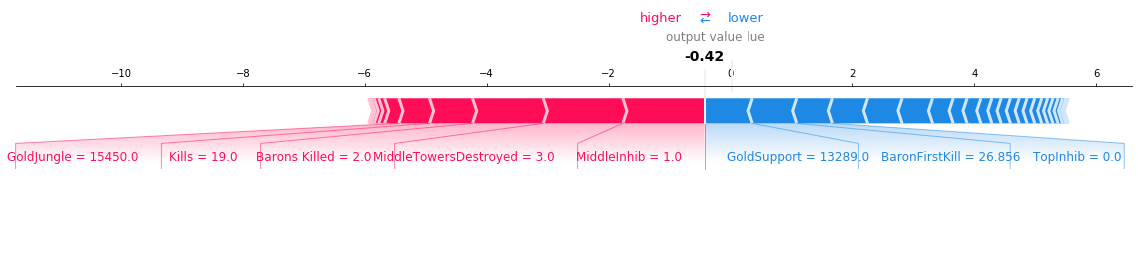

Real: 0  --- Predict: 1


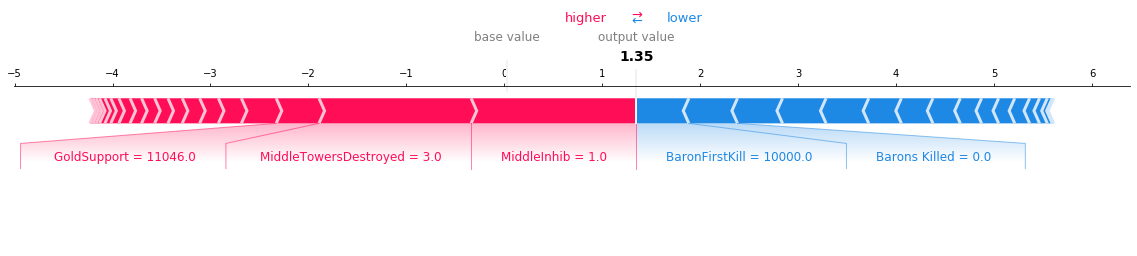

Real: 1  --- Predict: 0


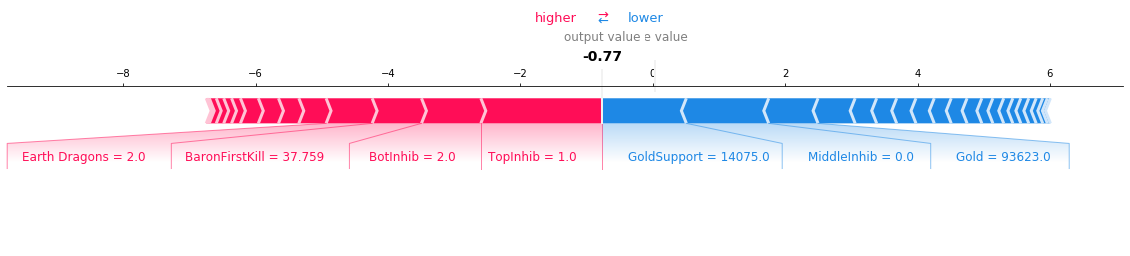

Real: 0  --- Predict: 1


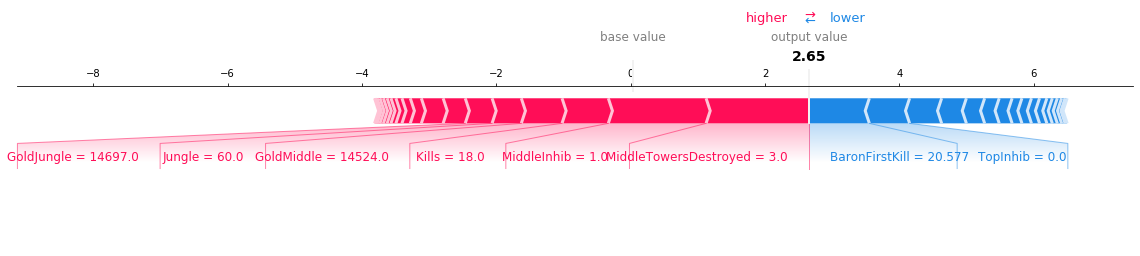

Real: 0  --- Predict: 1


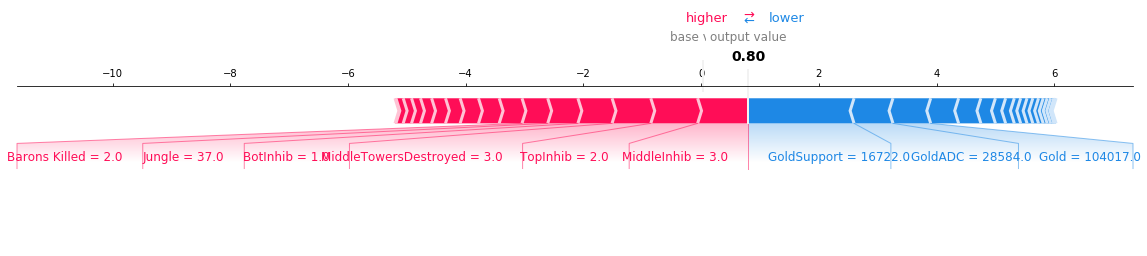

Real: 1  --- Predict: 0


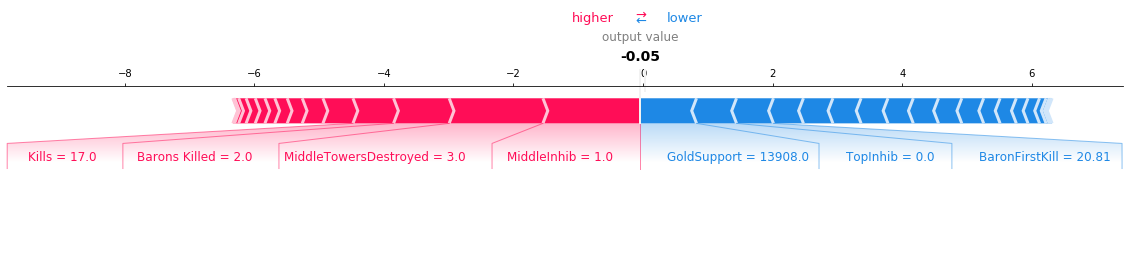

Real: 1  --- Predict: 0


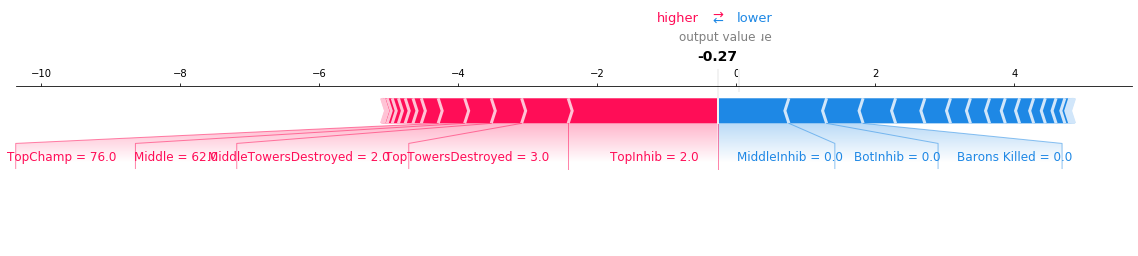

Real: 1  --- Predict: 0


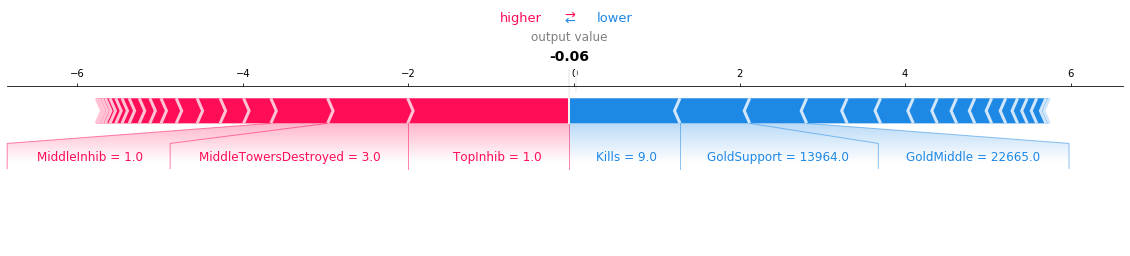

Real: 0  --- Predict: 1


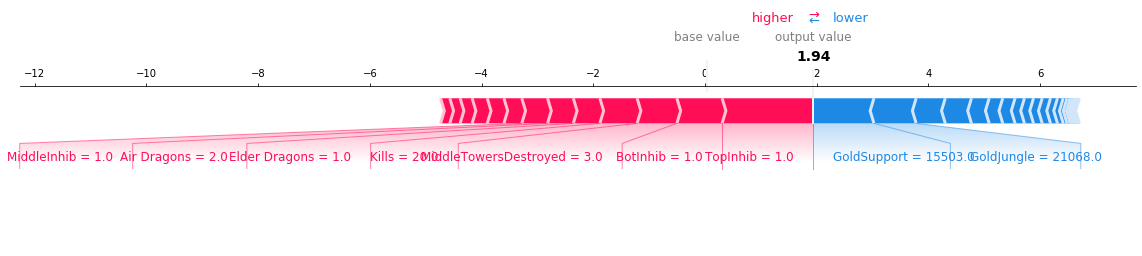

Real: 1  --- Predict: 0


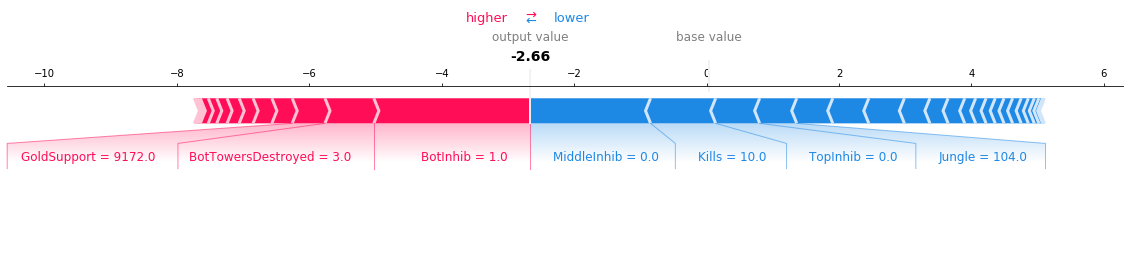

Real: 1  --- Predict: 0


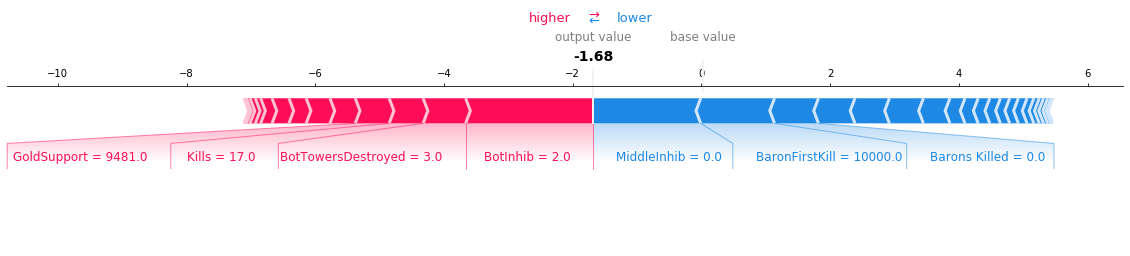

Real: 0  --- Predict: 1


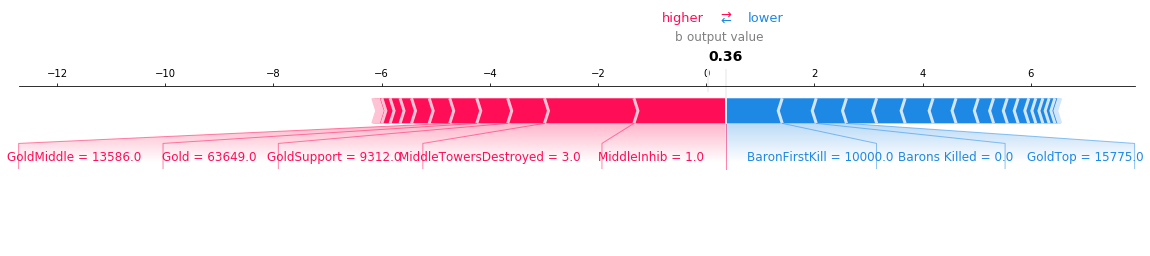

Real: 0  --- Predict: 1


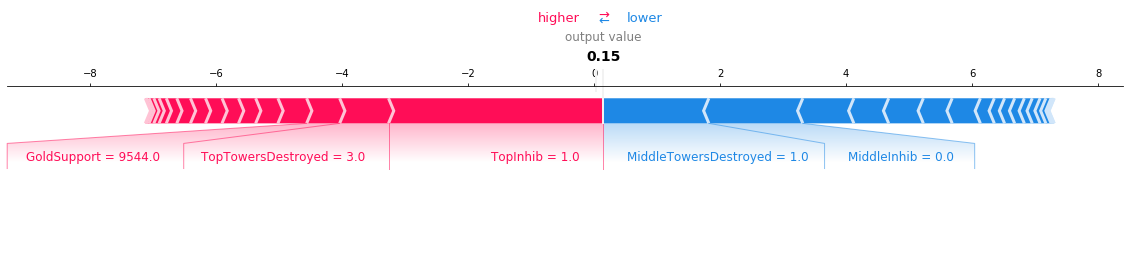

Real: 0  --- Predict: 1


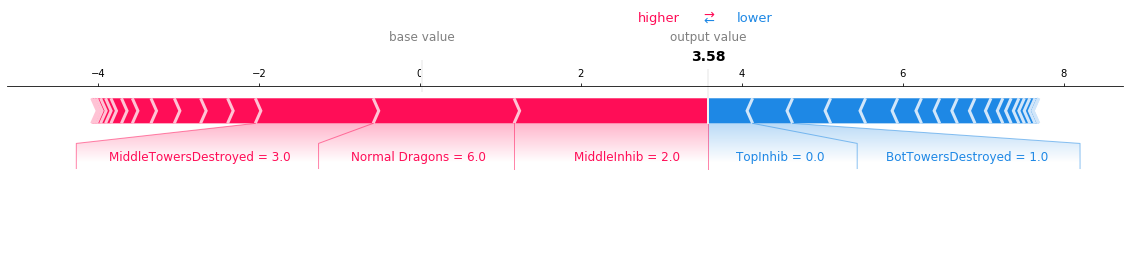

Real: 0  --- Predict: 1


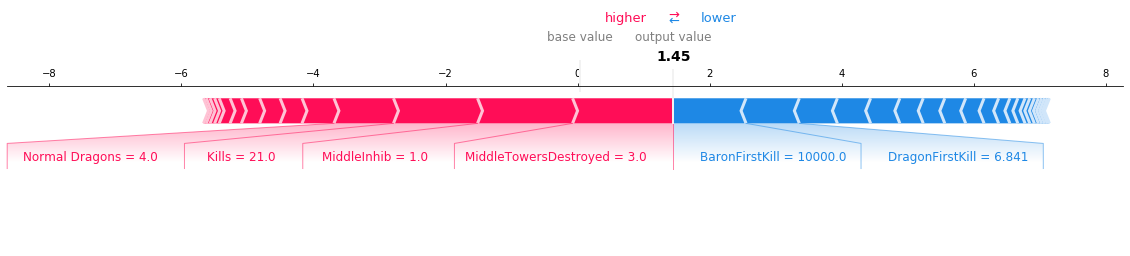

Real: 0  --- Predict: 1


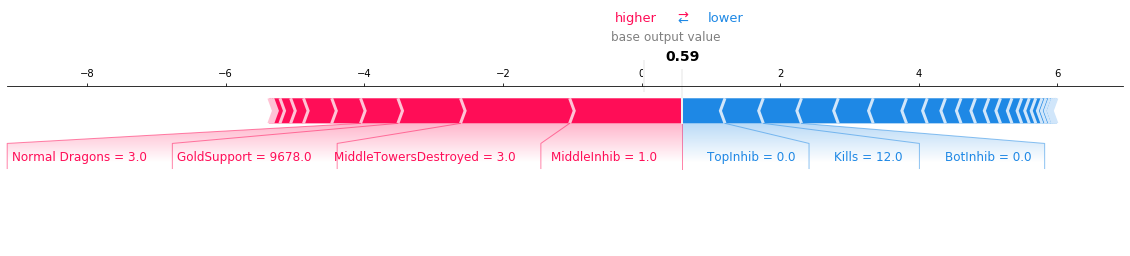

Real: 1  --- Predict: 0


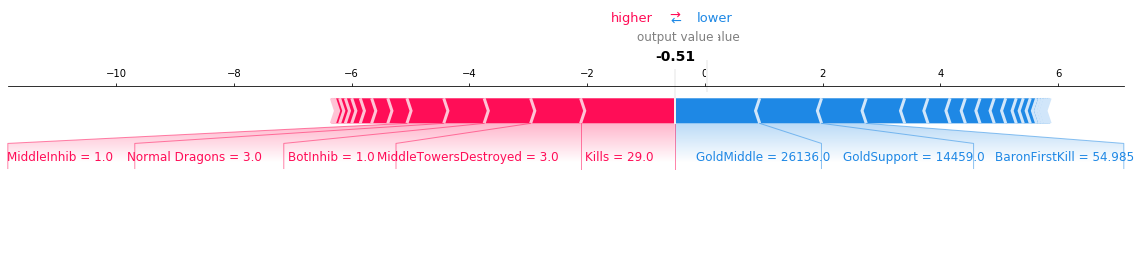

Real: 1  --- Predict: 0


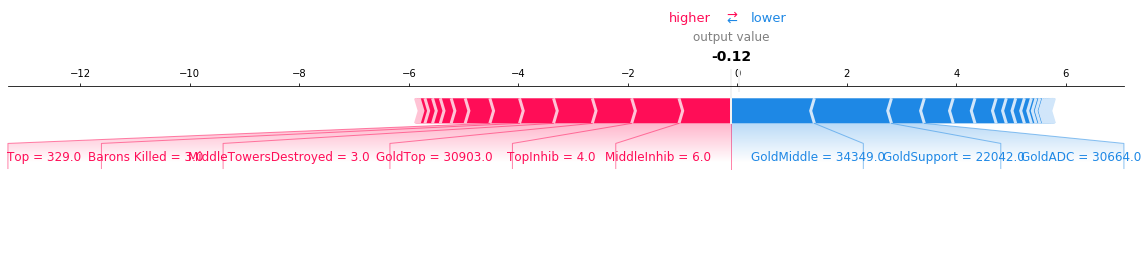

Real: 0  --- Predict: 1


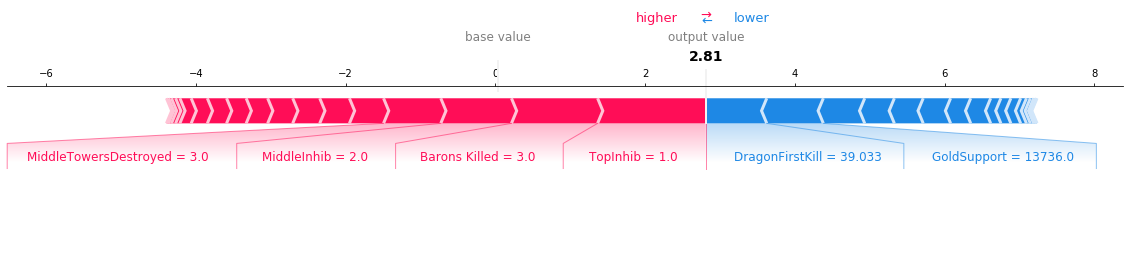

Real: 1  --- Predict: 0


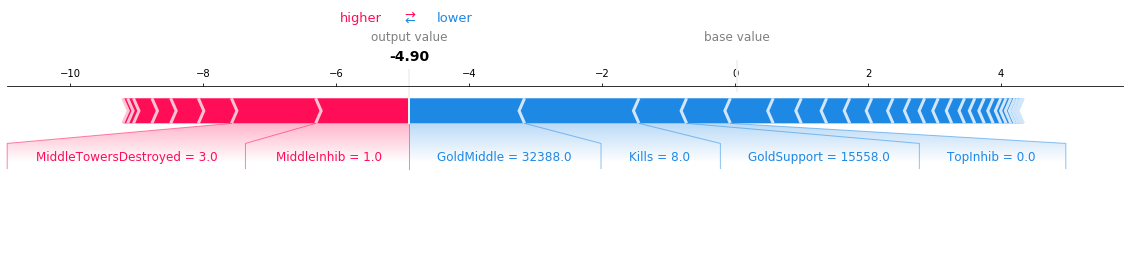

Real: 1  --- Predict: 0


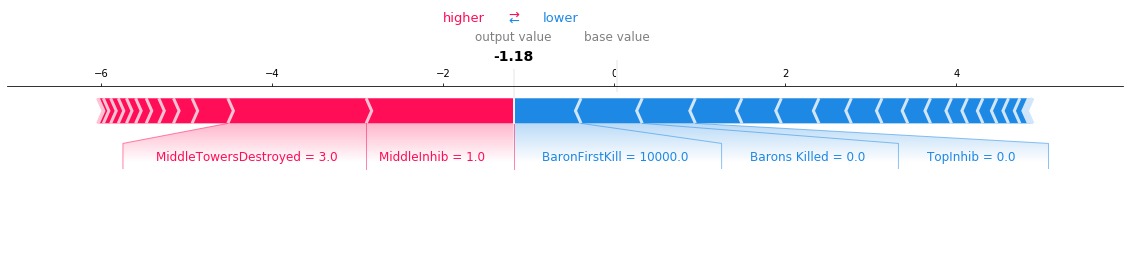

Real: 0  --- Predict: 1


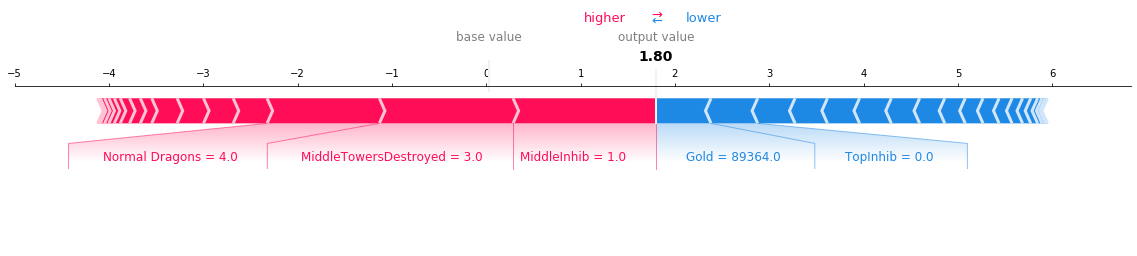

Real: 1  --- Predict: 0


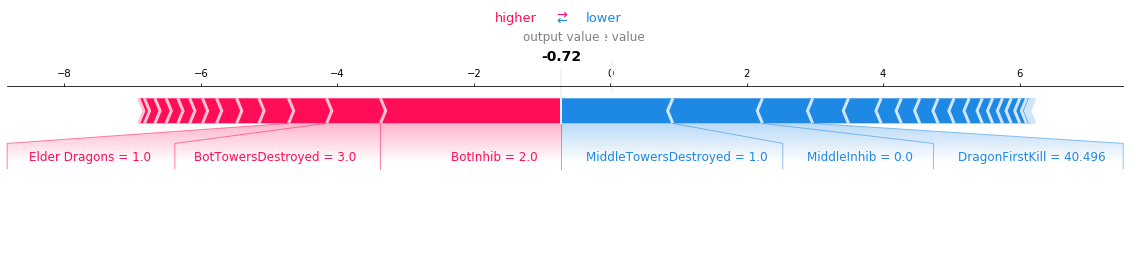

Real: 0  --- Predict: 1


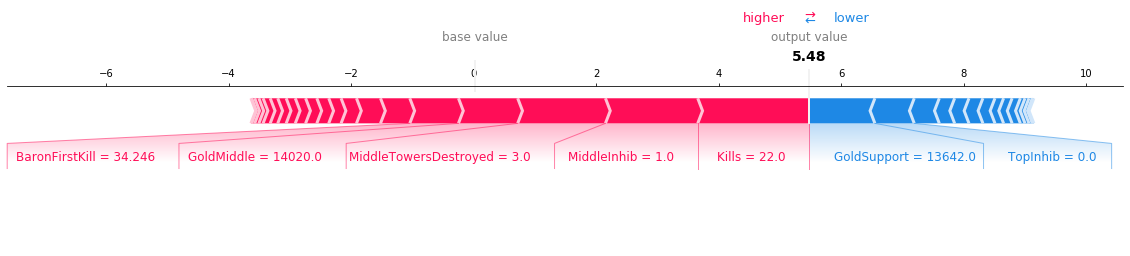

Real: 1  --- Predict: 0


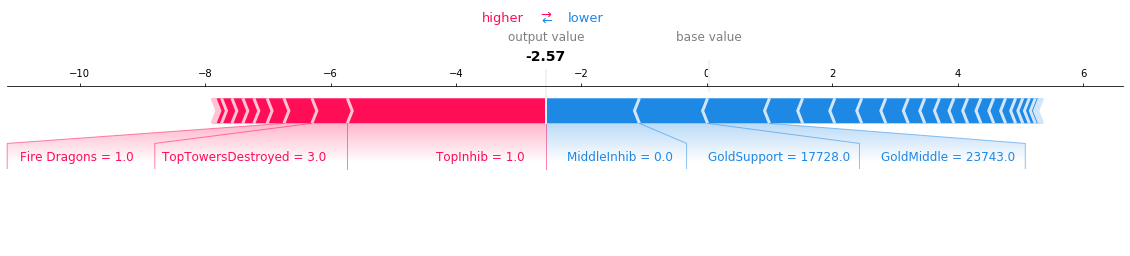

Real: 1  --- Predict: 0


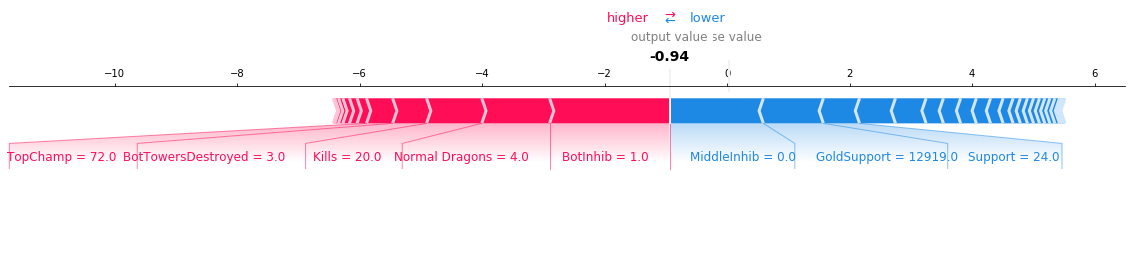

Real: 0  --- Predict: 1


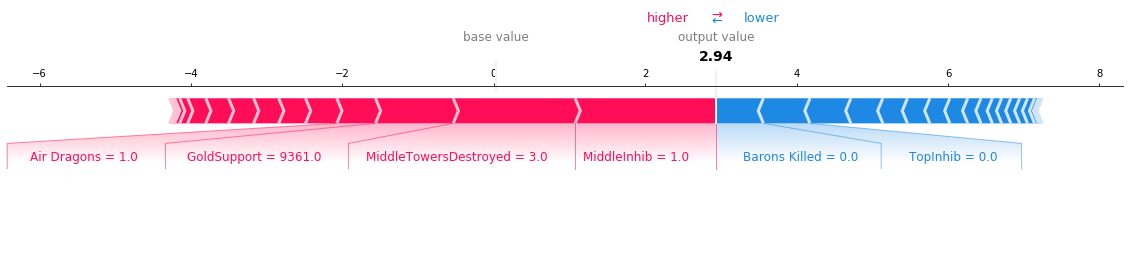

Real: 1  --- Predict: 0


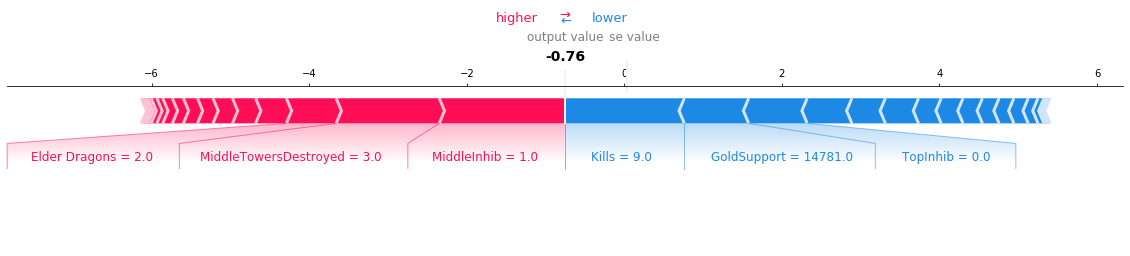

Real: 1  --- Predict: 0


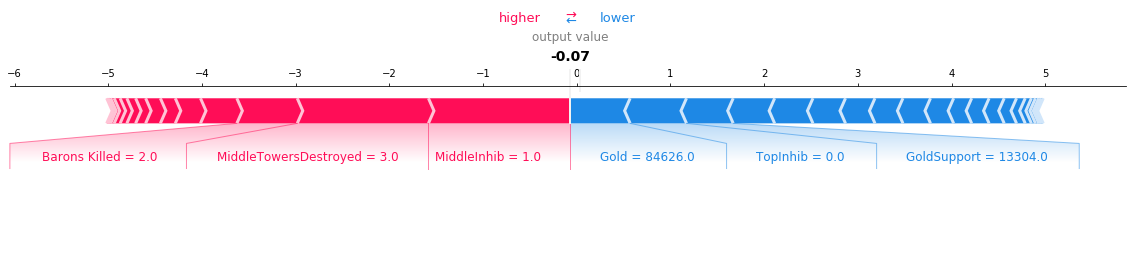

Real: 1  --- Predict: 0


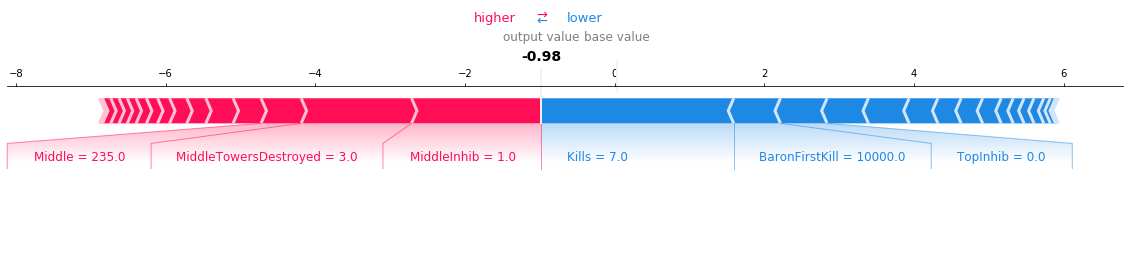

Real: 0  --- Predict: 1


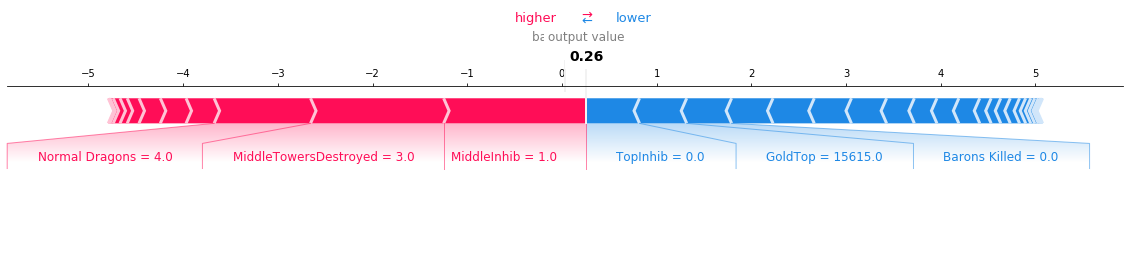

Real: 0  --- Predict: 1


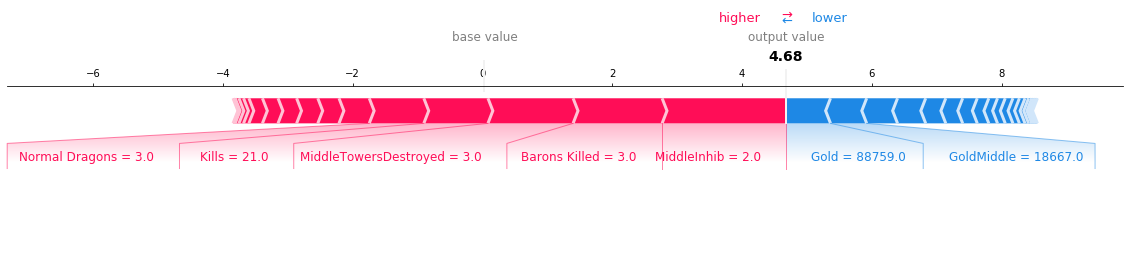

Real: 0  --- Predict: 1


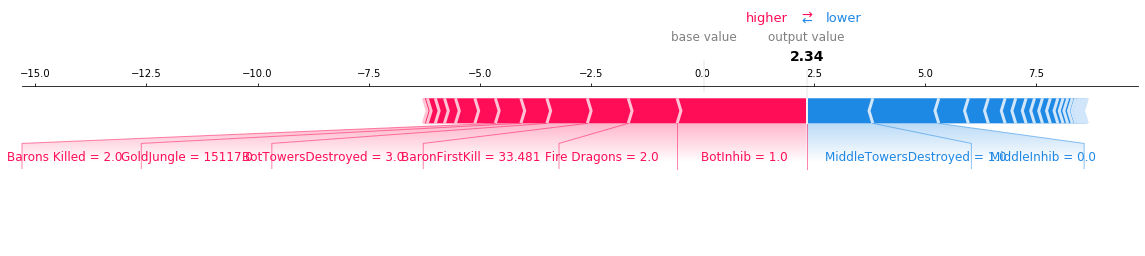

Real: 0  --- Predict: 1


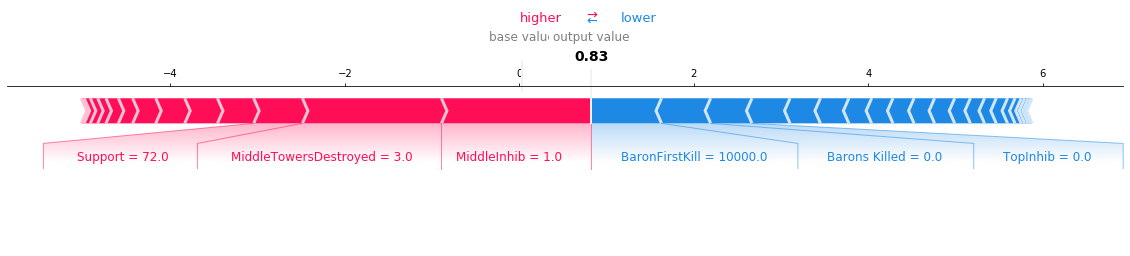

Real: 0  --- Predict: 1


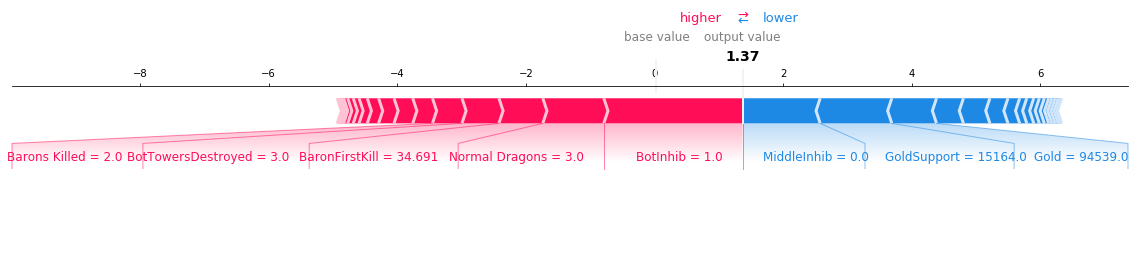

Real: 1  --- Predict: 0


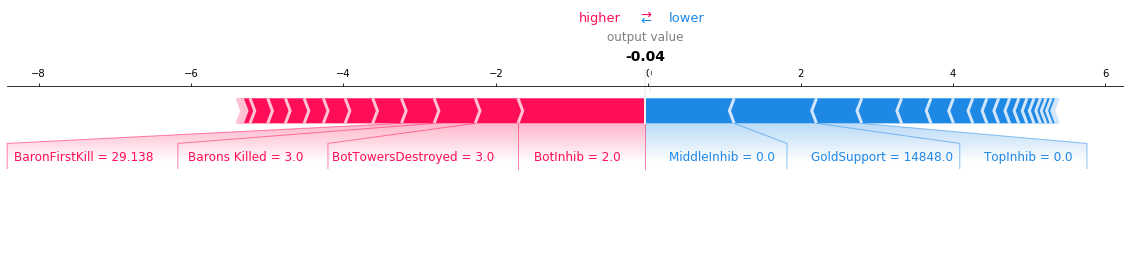

Real: 1  --- Predict: 0


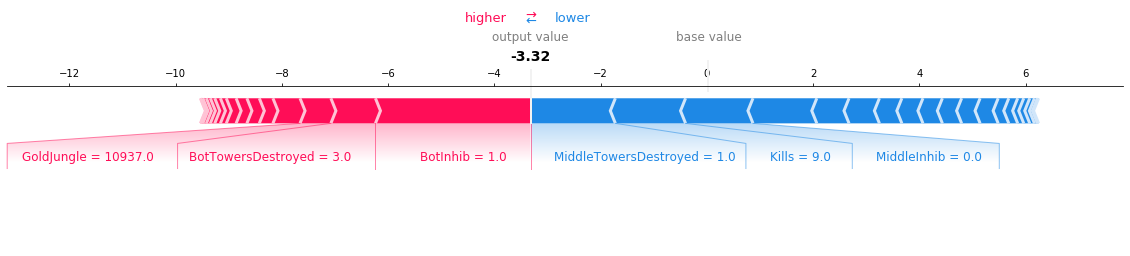

Real: 0  --- Predict: 1


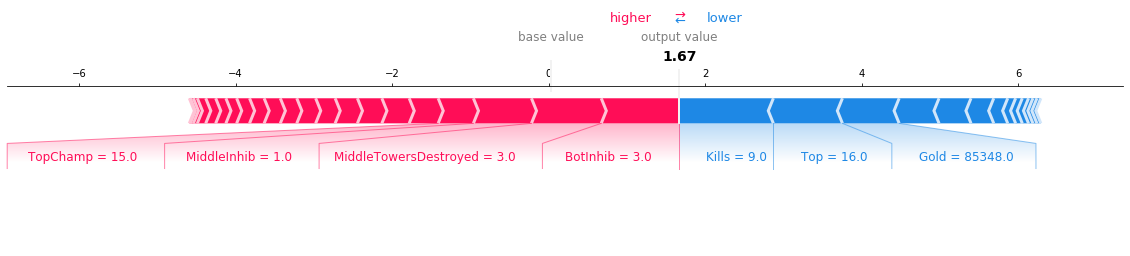

Real: 1  --- Predict: 0


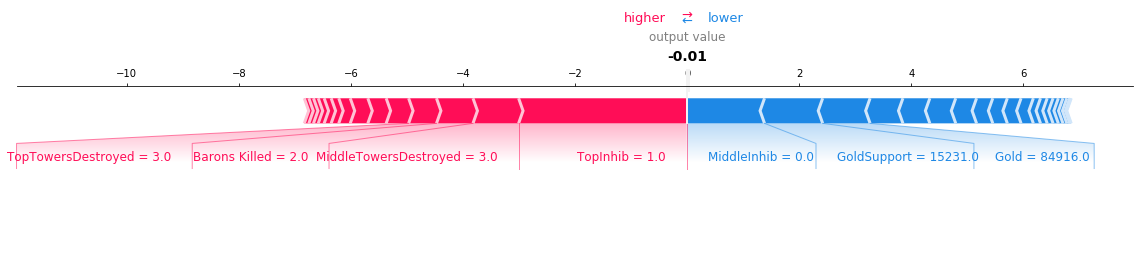

Real: 0  --- Predict: 1


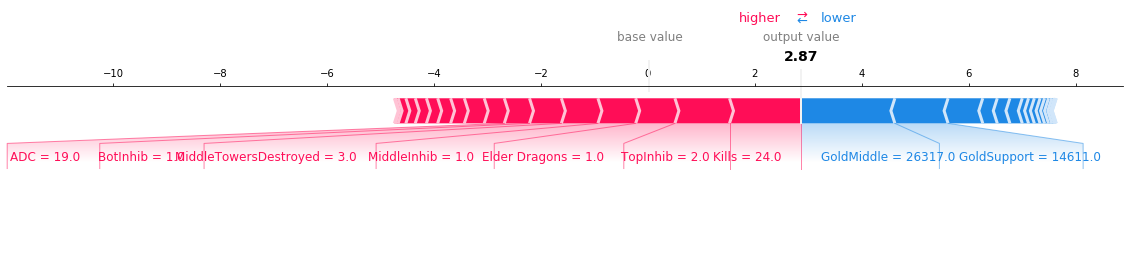

Real: 1  --- Predict: 0


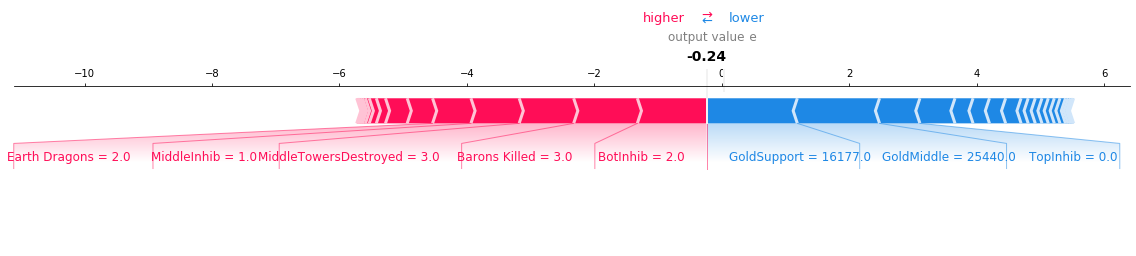

Real: 0  --- Predict: 1


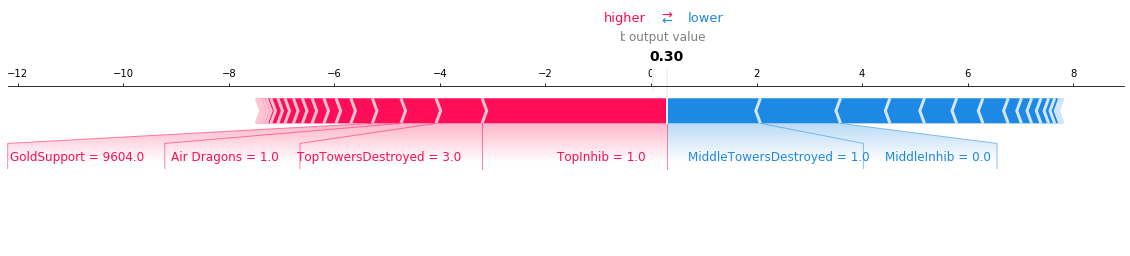

Real: 1  --- Predict: 0


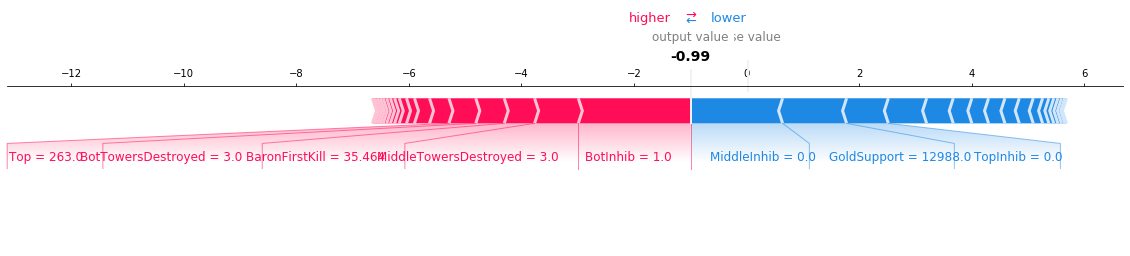

Real: 0  --- Predict: 1


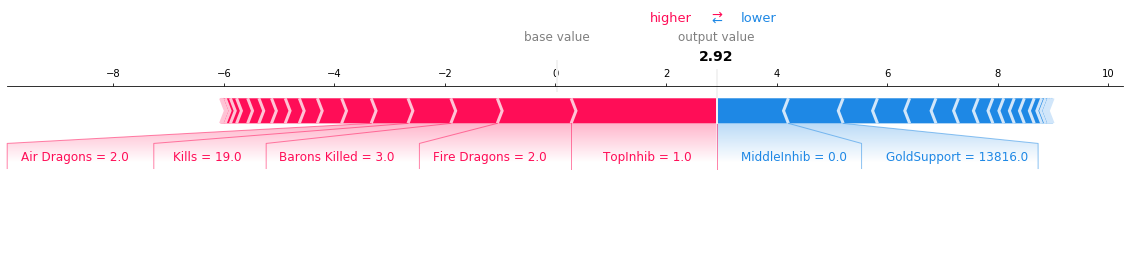

Real: 0  --- Predict: 1


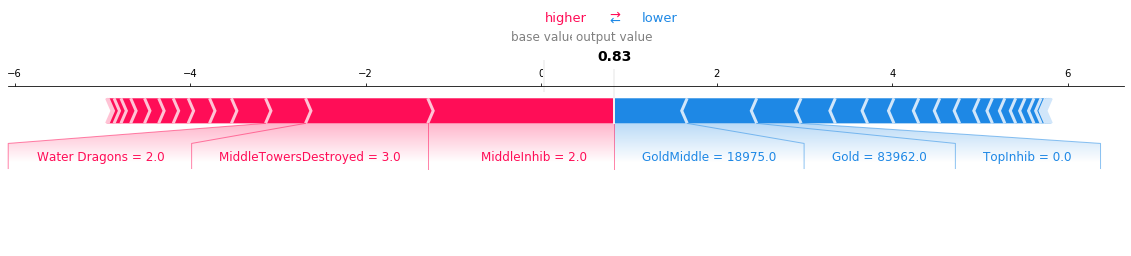

Real: 0  --- Predict: 1


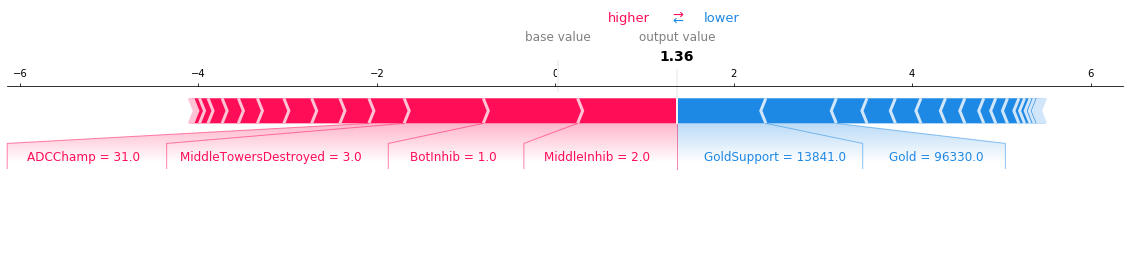

Real: 0  --- Predict: 1


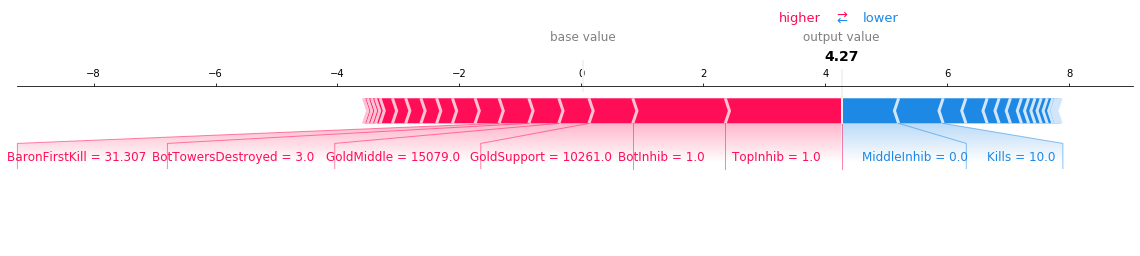

Real: 1  --- Predict: 0


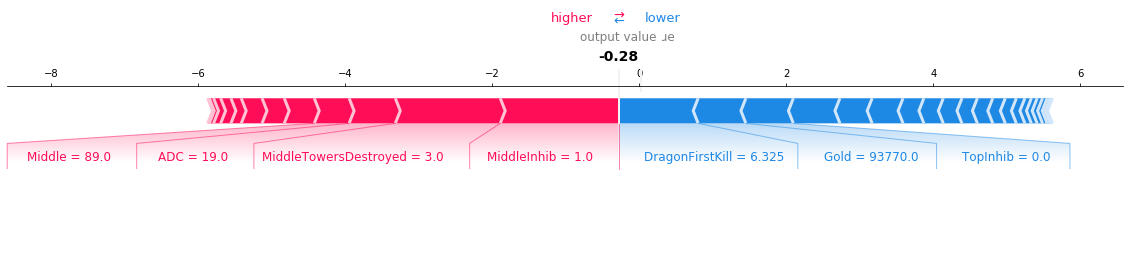

Real: 1  --- Predict: 0


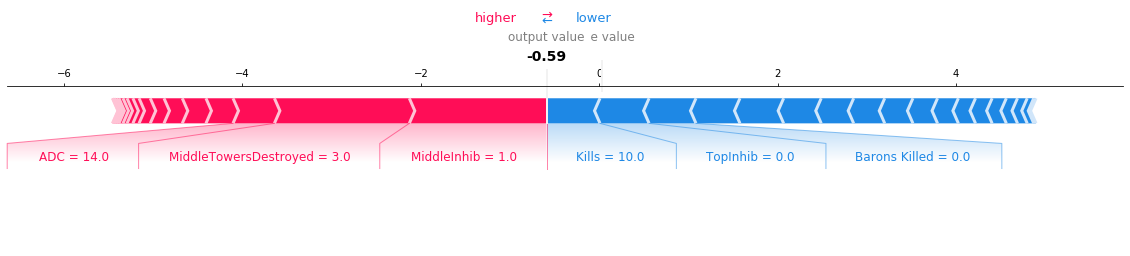

Real: 0  --- Predict: 1


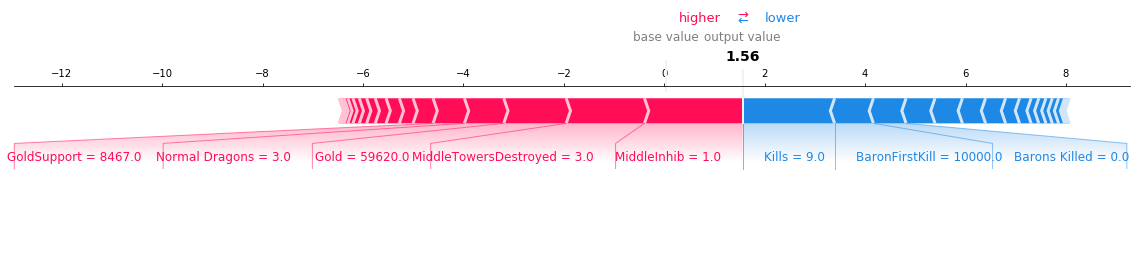

Real: 0  --- Predict: 1


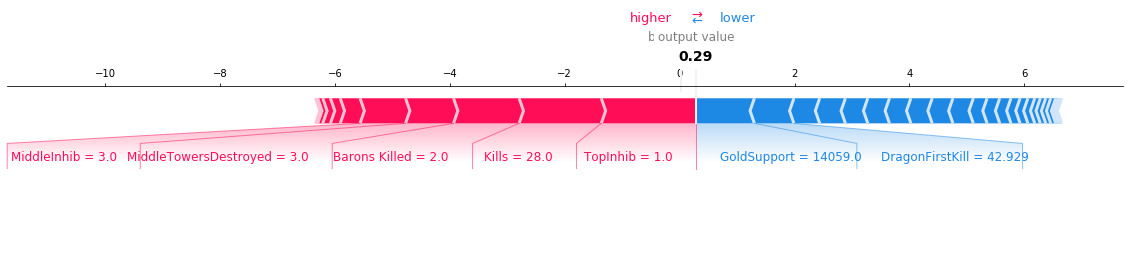

Real: 0  --- Predict: 1


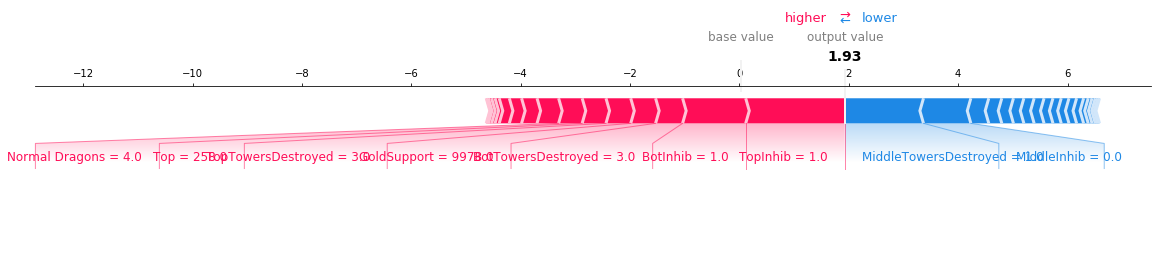

Real: 0  --- Predict: 1


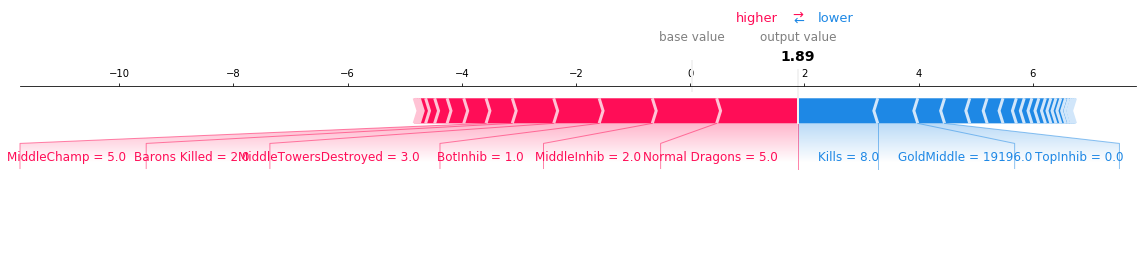

Real: 1  --- Predict: 0


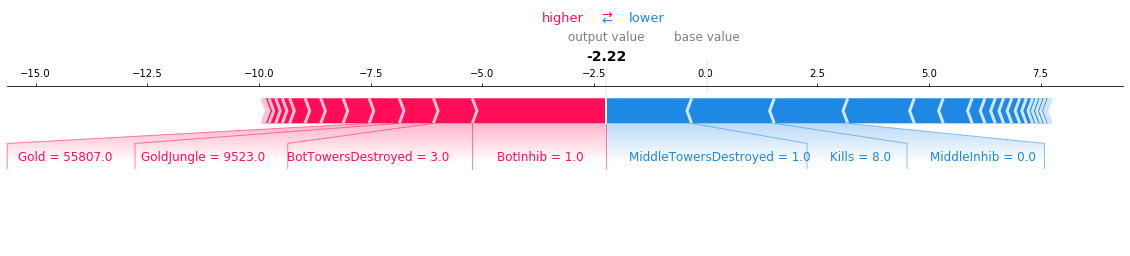

Real: 0  --- Predict: 1


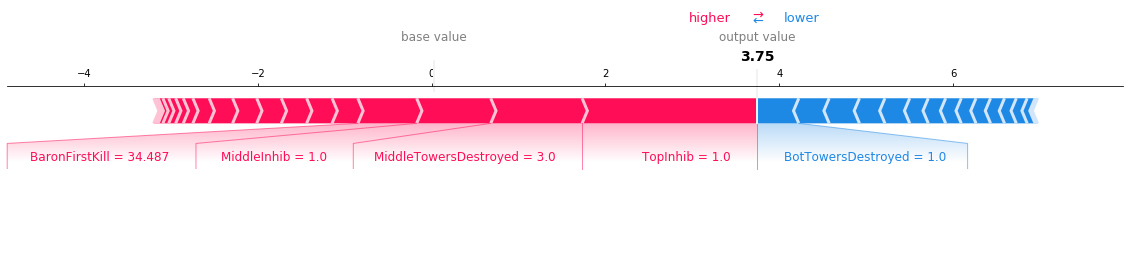

Real: 0  --- Predict: 1


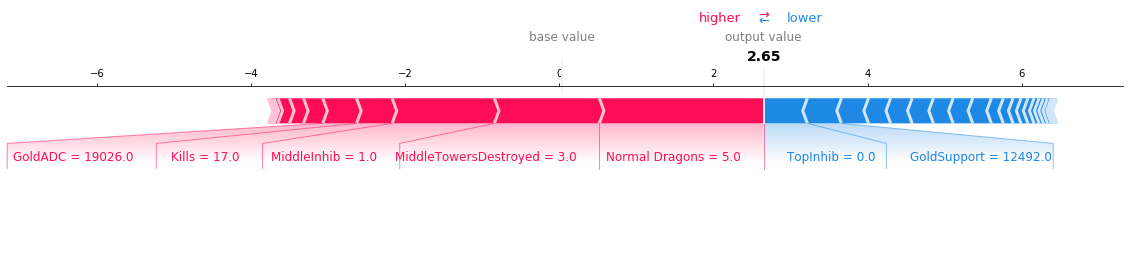

Real: 0  --- Predict: 1


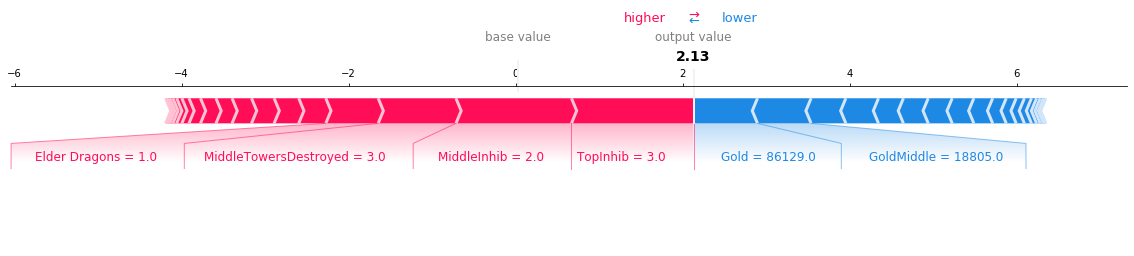

Real: 1  --- Predict: 0


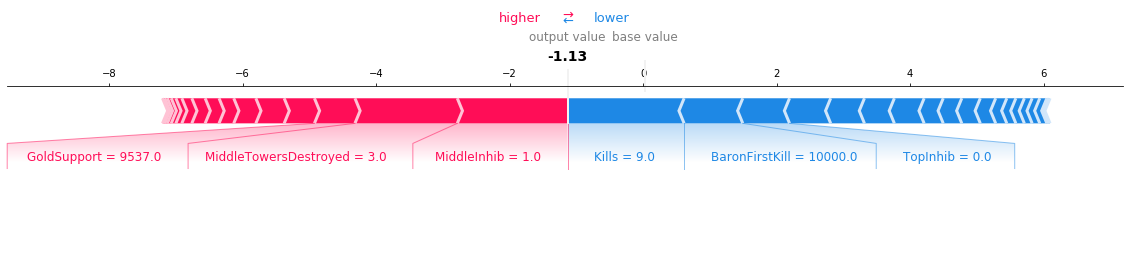

Real: 0  --- Predict: 1


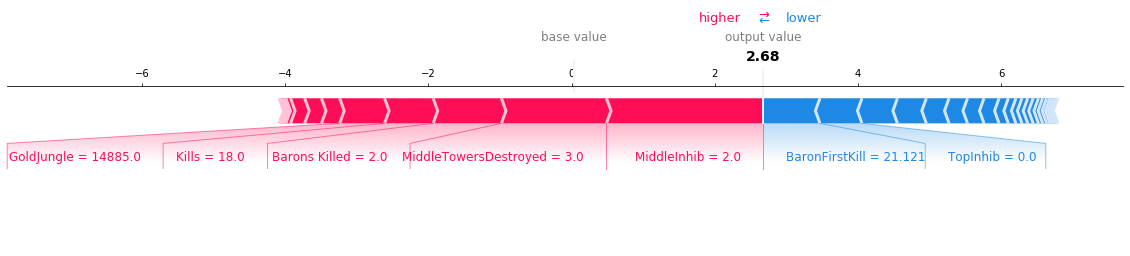

Real: 0  --- Predict: 1


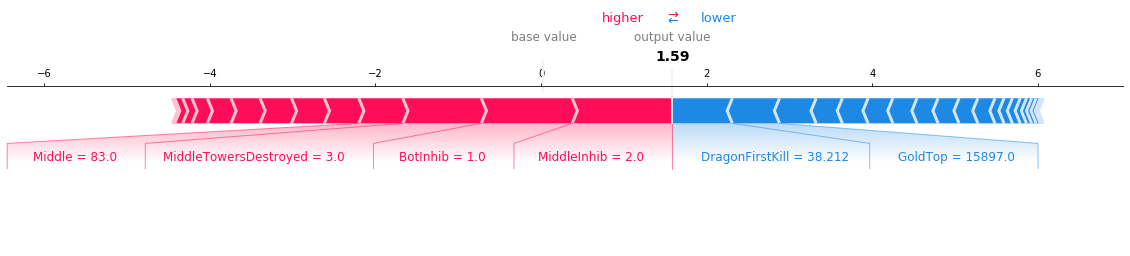

Real: 1  --- Predict: 0


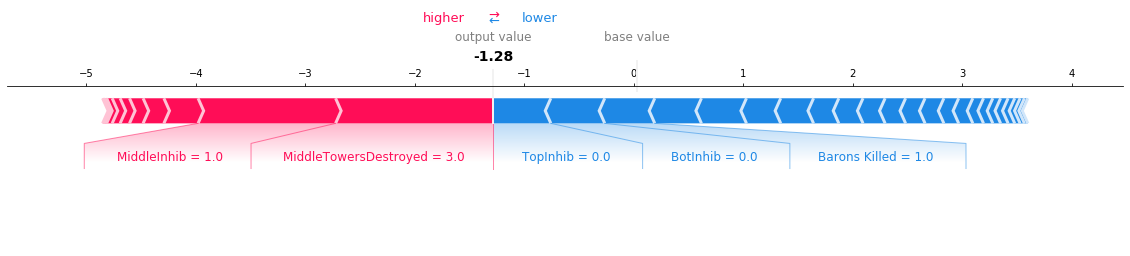

Real: 0  --- Predict: 1


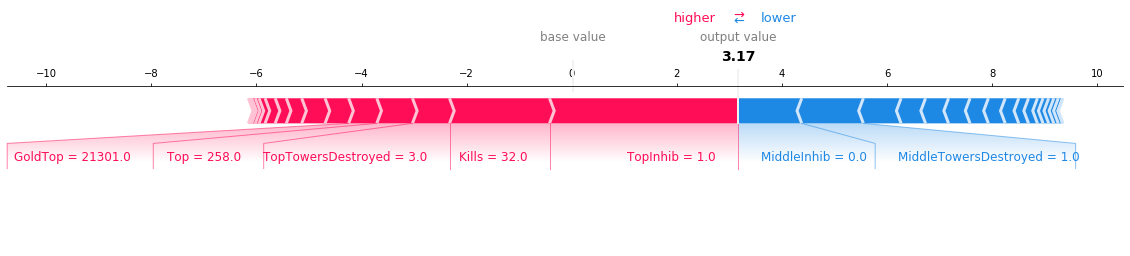

Real: 0  --- Predict: 1


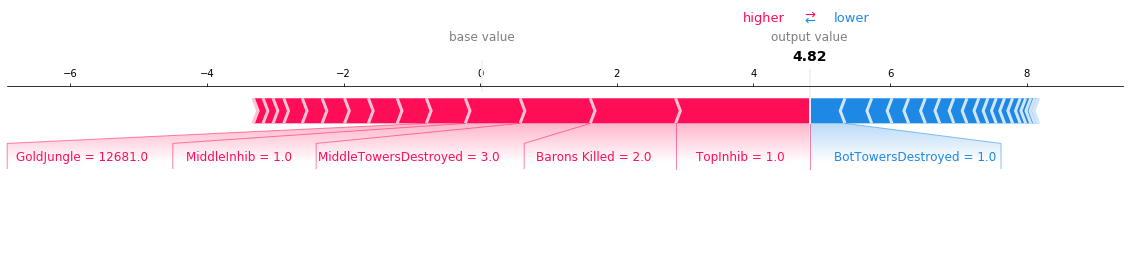

Real: 0  --- Predict: 1


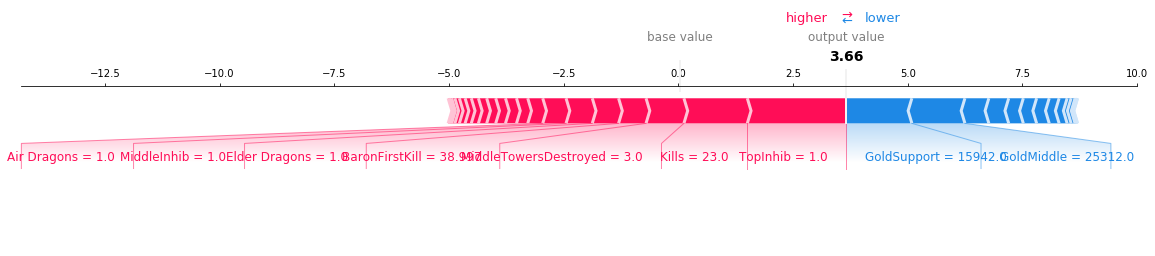

Real: 0  --- Predict: 1


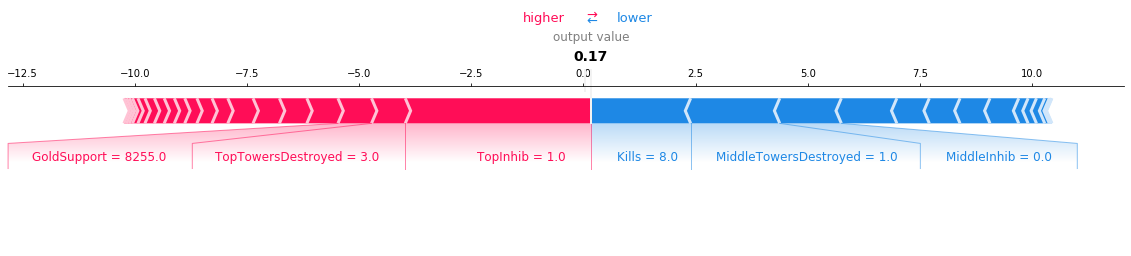

Real: 0  --- Predict: 1


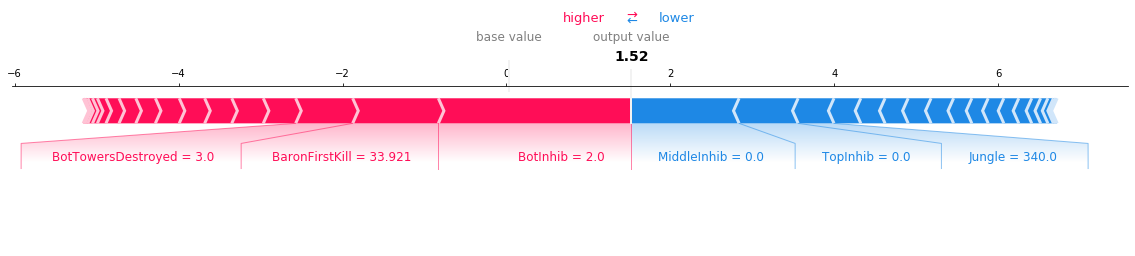

Real: 0  --- Predict: 1


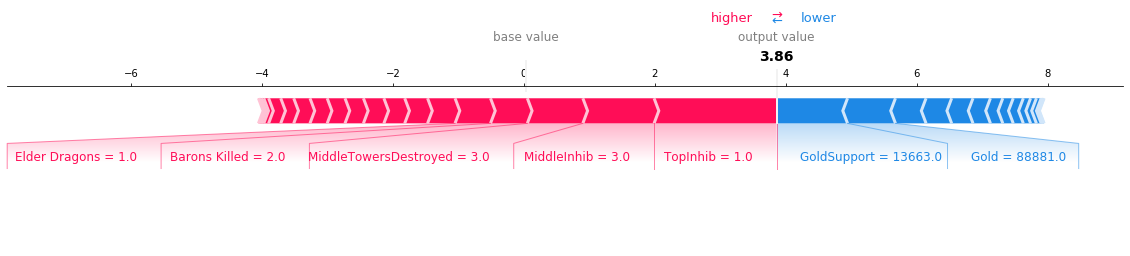

Real: 0  --- Predict: 1


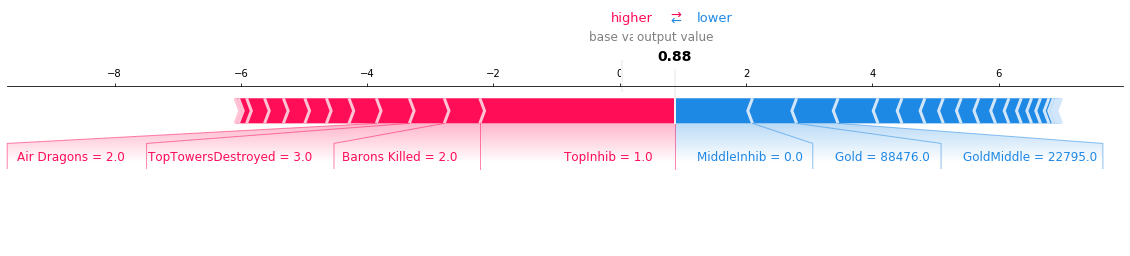

Real: 0  --- Predict: 1


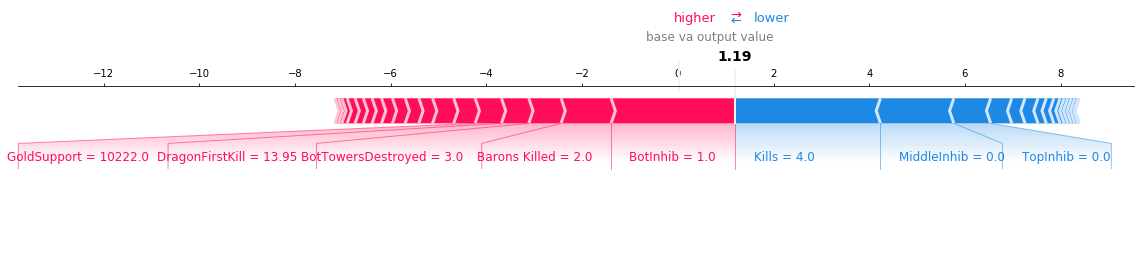

Real: 0  --- Predict: 1


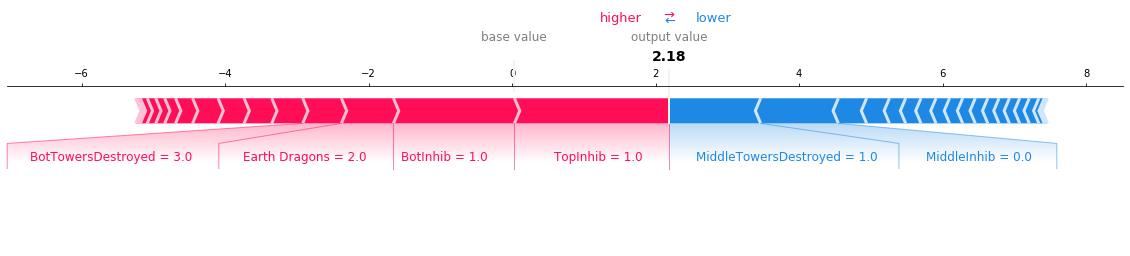

Real: 0  --- Predict: 1


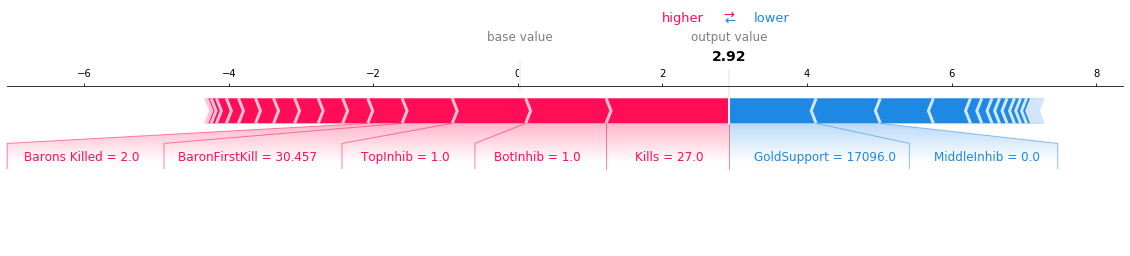

Real: 0  --- Predict: 1


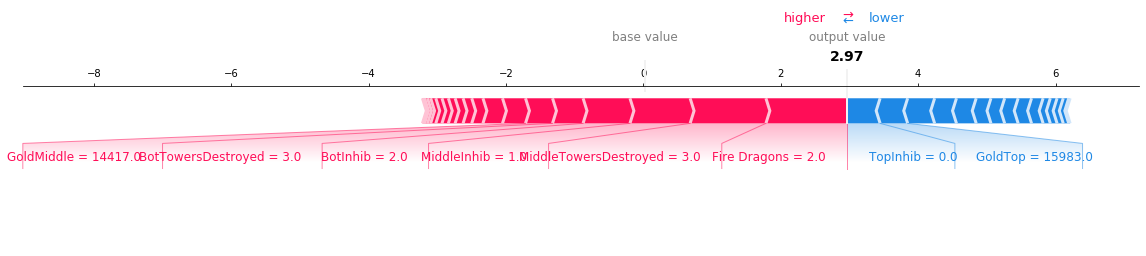

Real: 0  --- Predict: 1


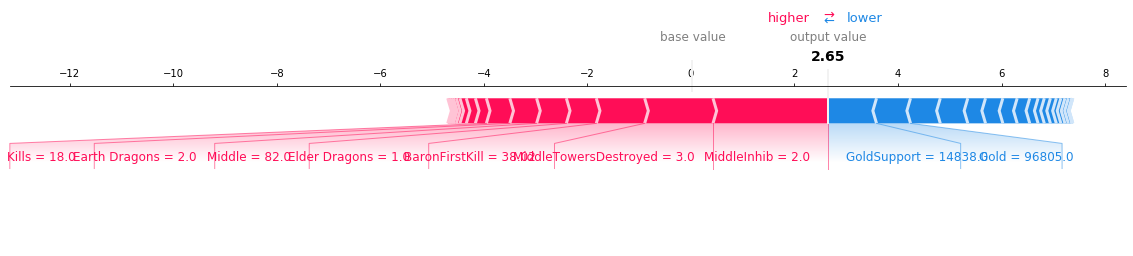

Real: 0  --- Predict: 1


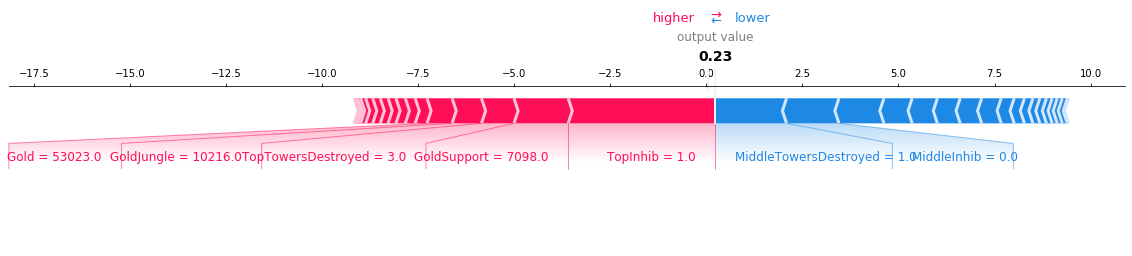

Real: 1  --- Predict: 0


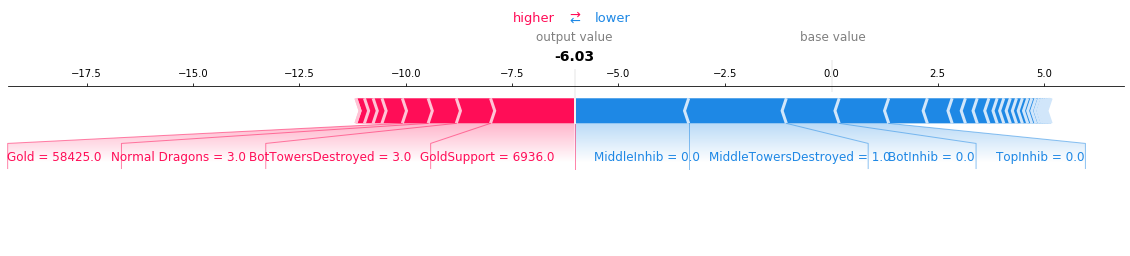

Real: 0  --- Predict: 1


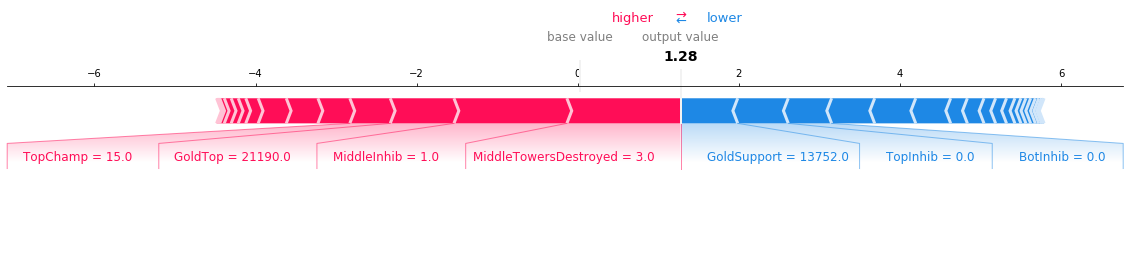

Real: 1  --- Predict: 0


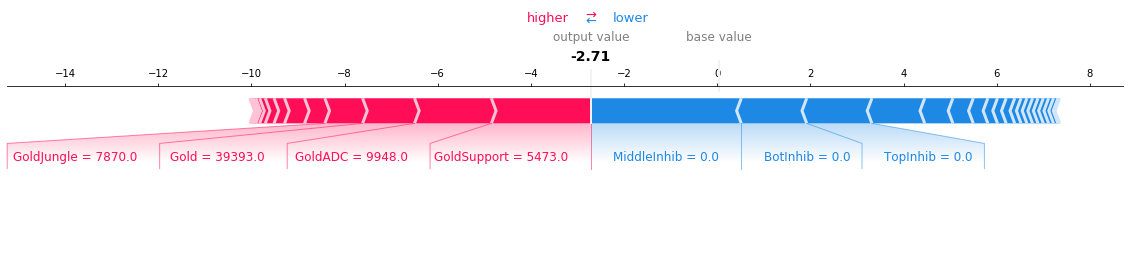

Real: 0  --- Predict: 1


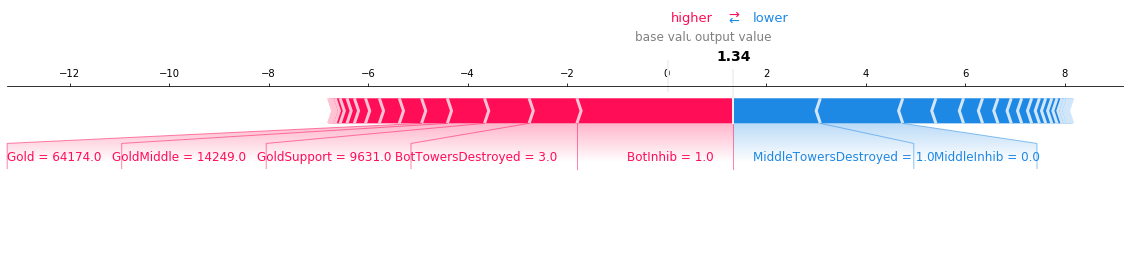

Real: 0  --- Predict: 1


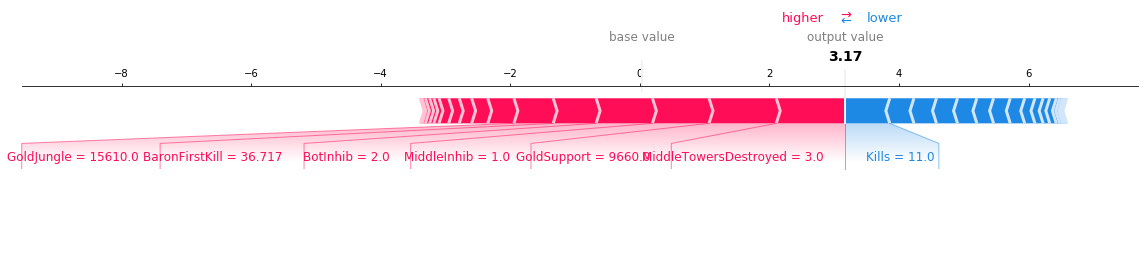

Real: 1  --- Predict: 0


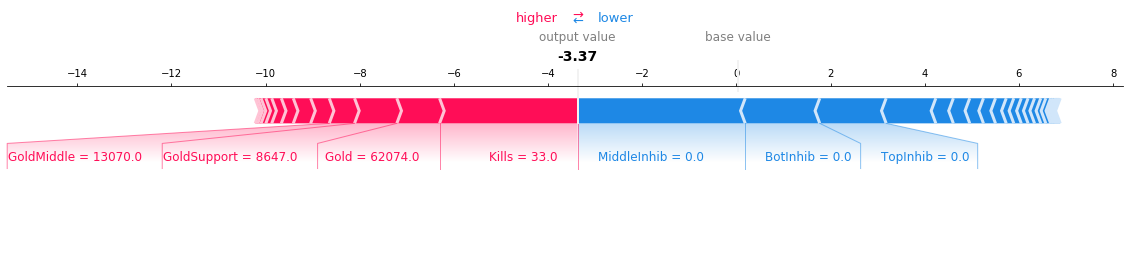

Real: 0  --- Predict: 1


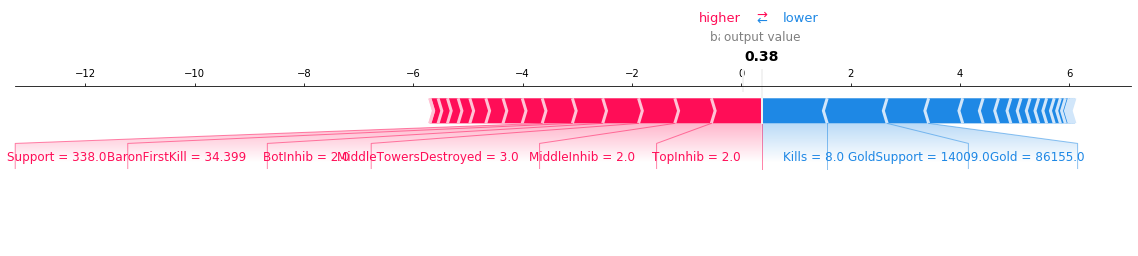

Real: 0  --- Predict: 1


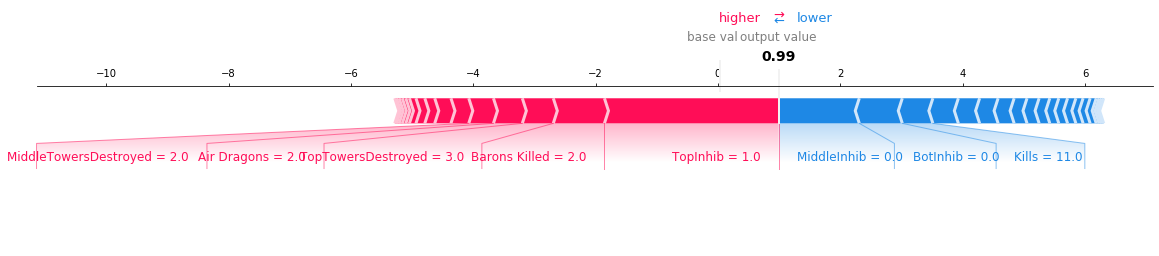

Real: 0  --- Predict: 1


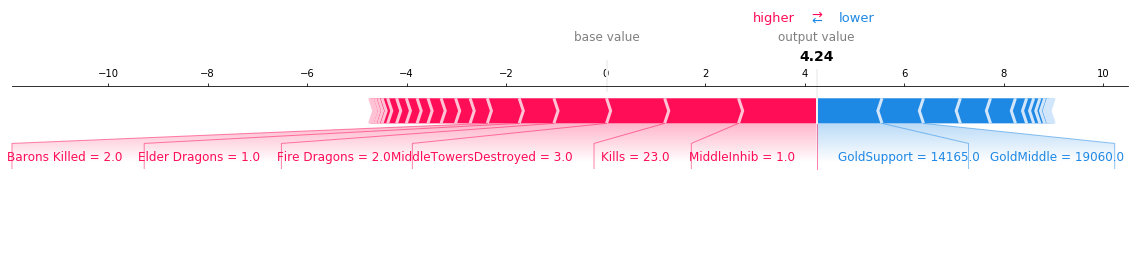

Real: 0  --- Predict: 1


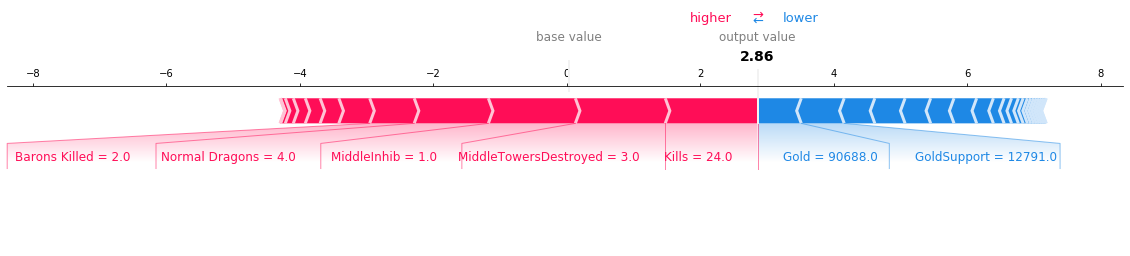

Real: 0  --- Predict: 1


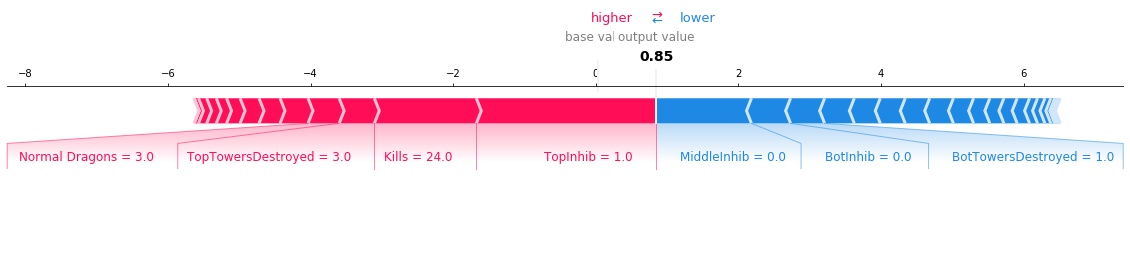

Real: 0  --- Predict: 1


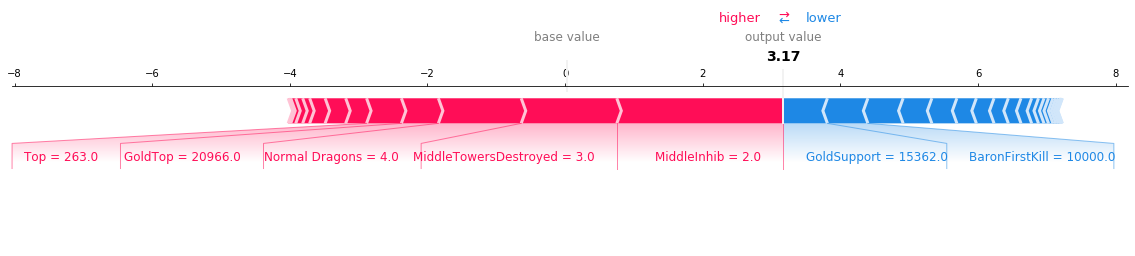

Real: 1  --- Predict: 0


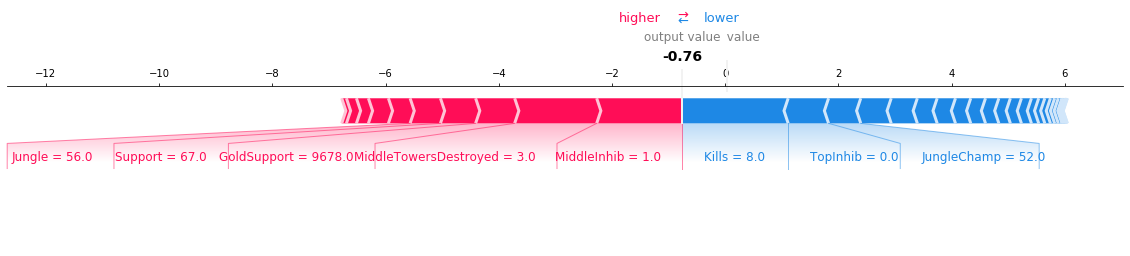

Real: 0  --- Predict: 1


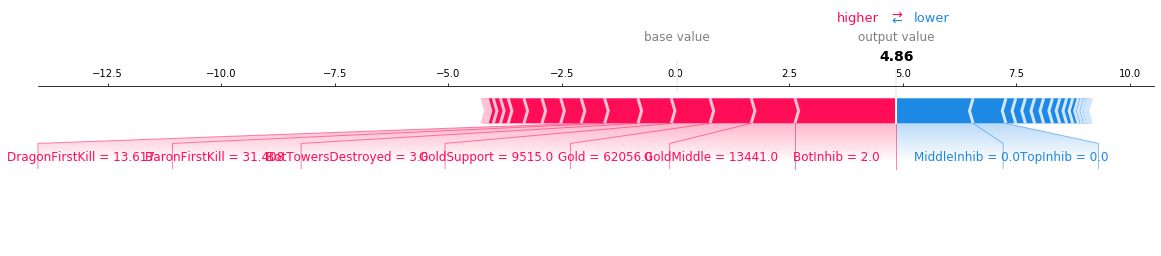

Real: 0  --- Predict: 1


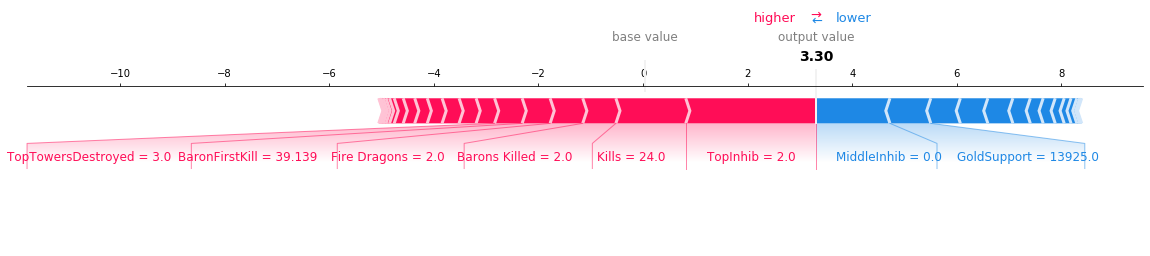

Real: 1  --- Predict: 0


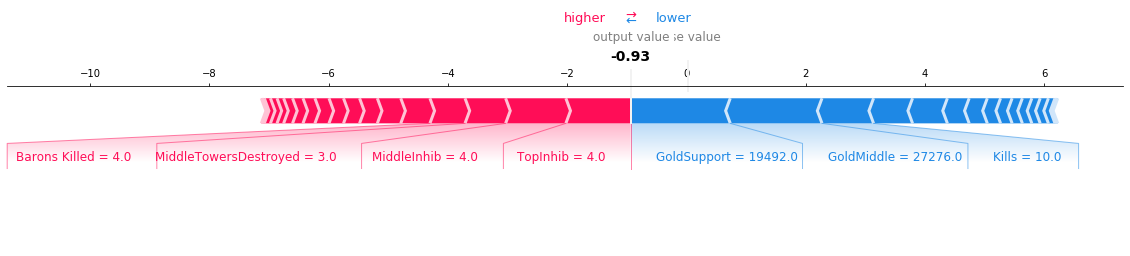

Real: 0  --- Predict: 1


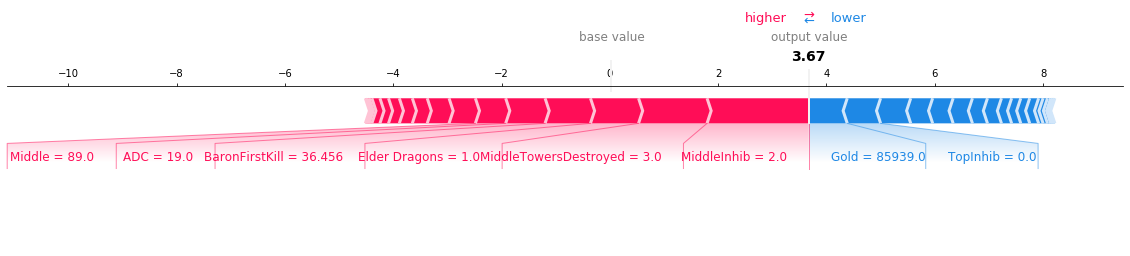

Real: 0  --- Predict: 1


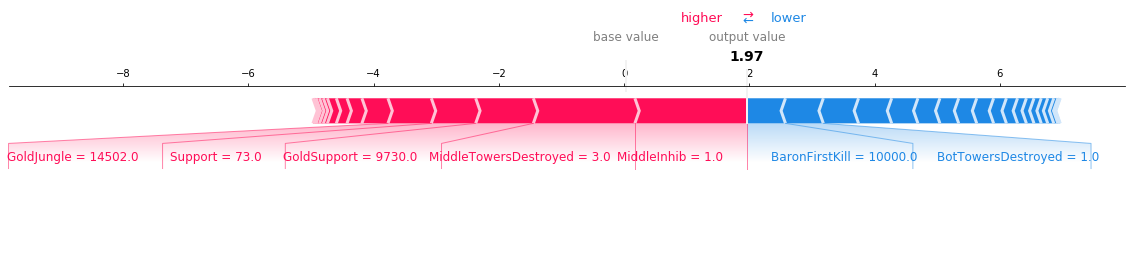

Real: 1  --- Predict: 0


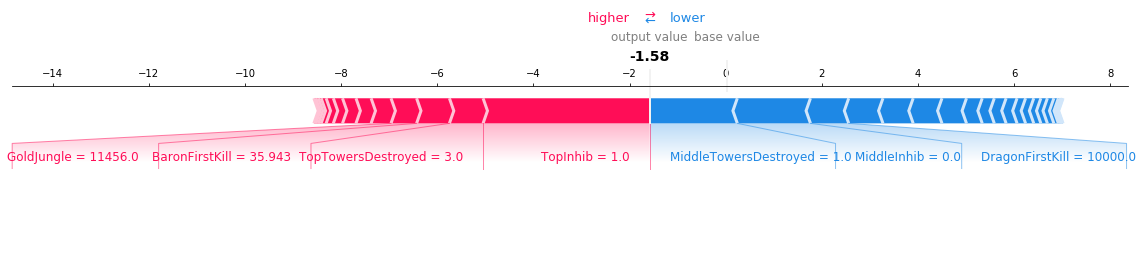

Real: 0  --- Predict: 1


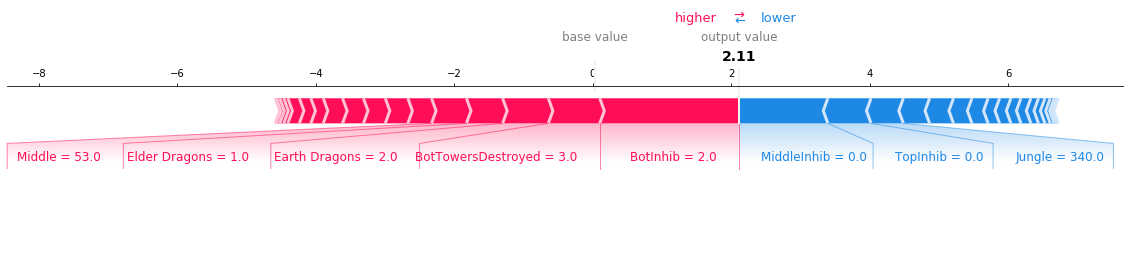

Real: 0  --- Predict: 1


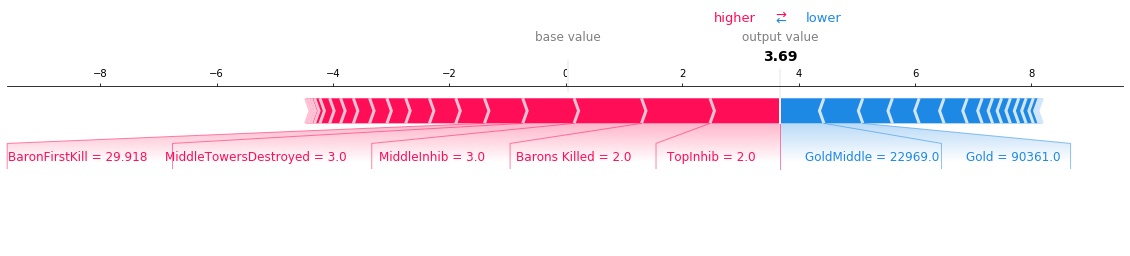

Real: 0  --- Predict: 1


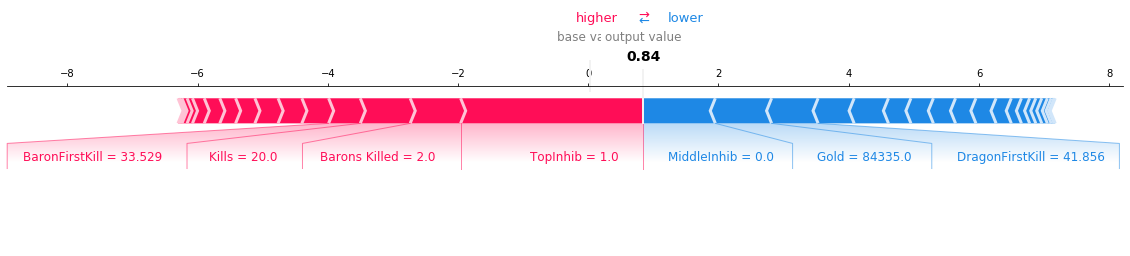

Real: 0  --- Predict: 1


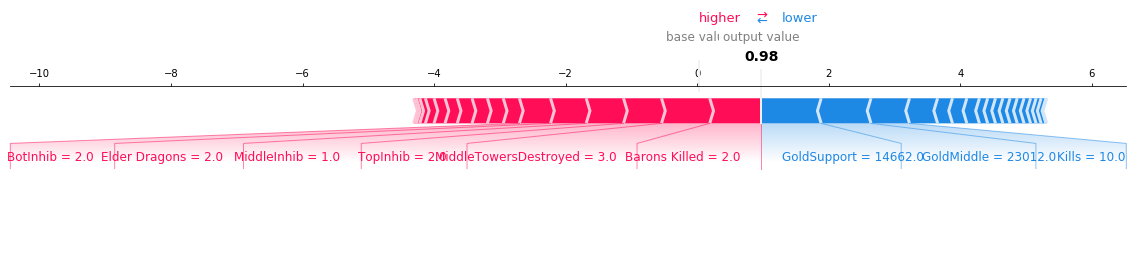

Real: 1  --- Predict: 0


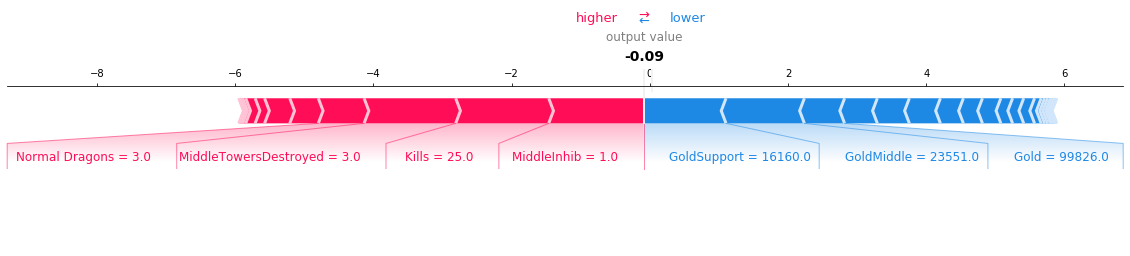

Real: 0  --- Predict: 1


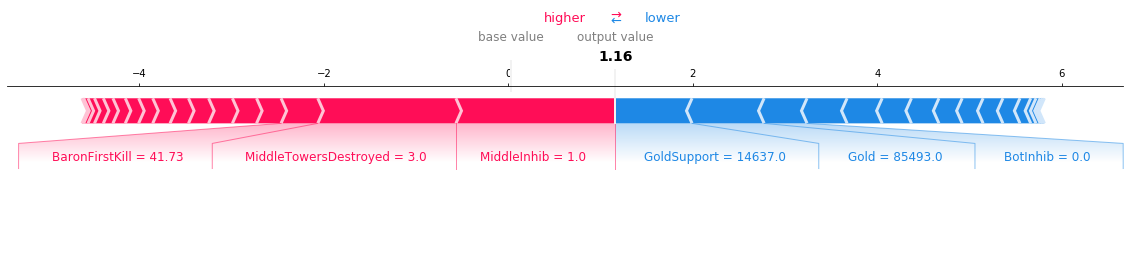

Real: 1  --- Predict: 0


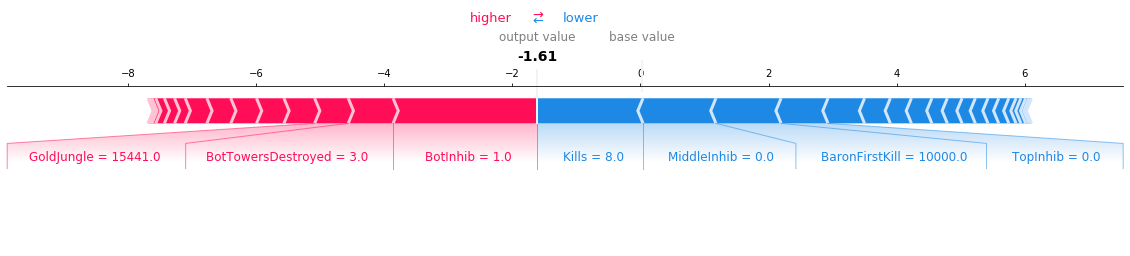

Real: 1  --- Predict: 0


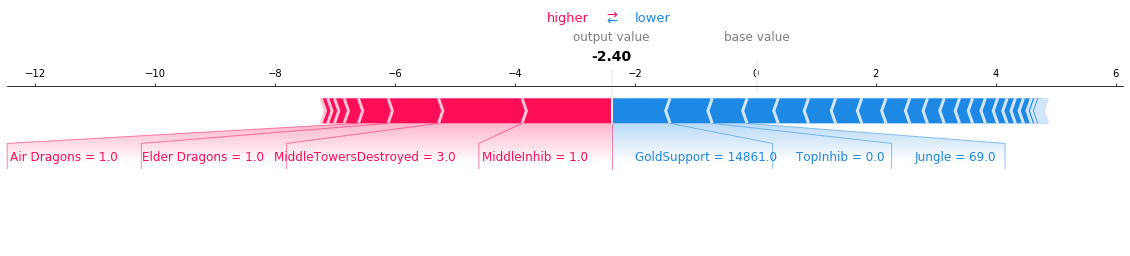

Real: 1  --- Predict: 0


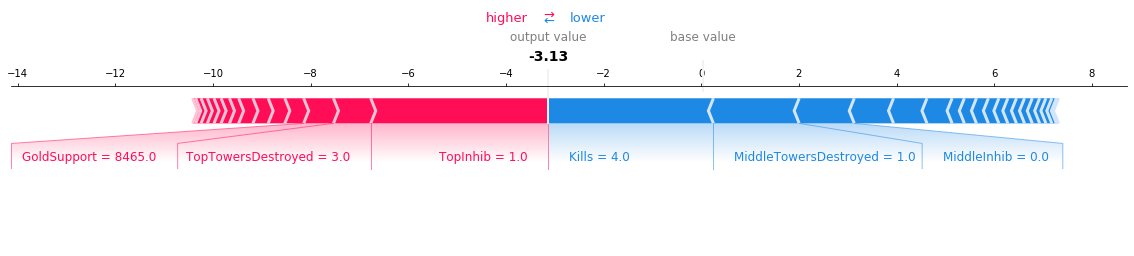

Real: 0  --- Predict: 1


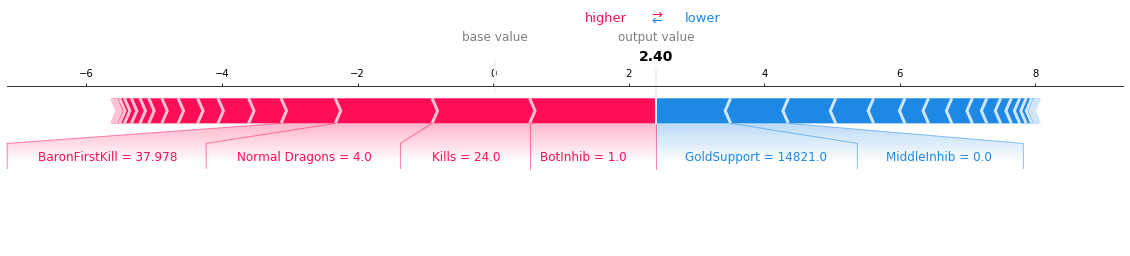

Real: 0  --- Predict: 1


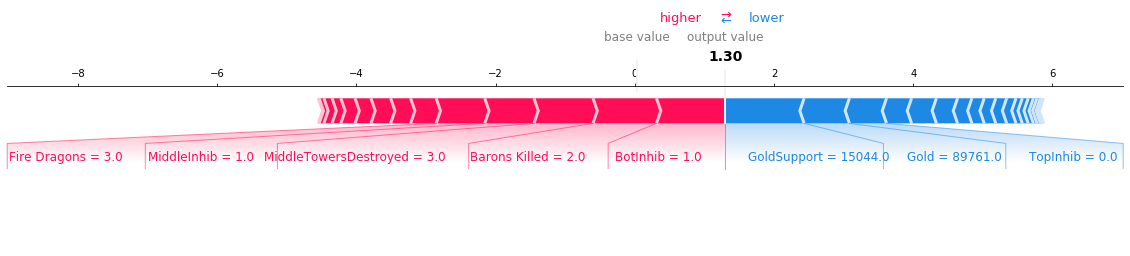

Real: 0  --- Predict: 1


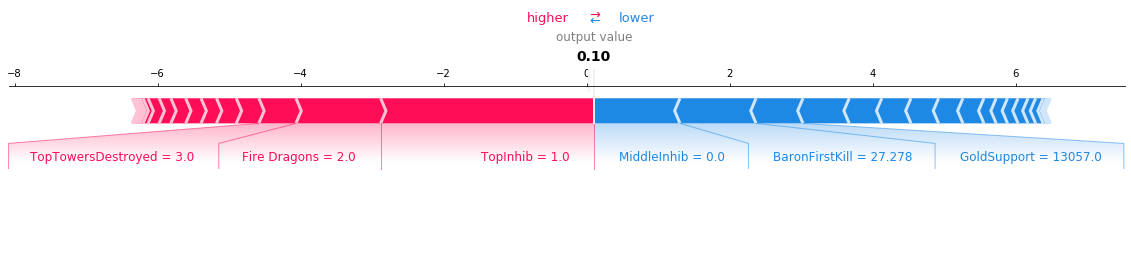

Real: 1  --- Predict: 0


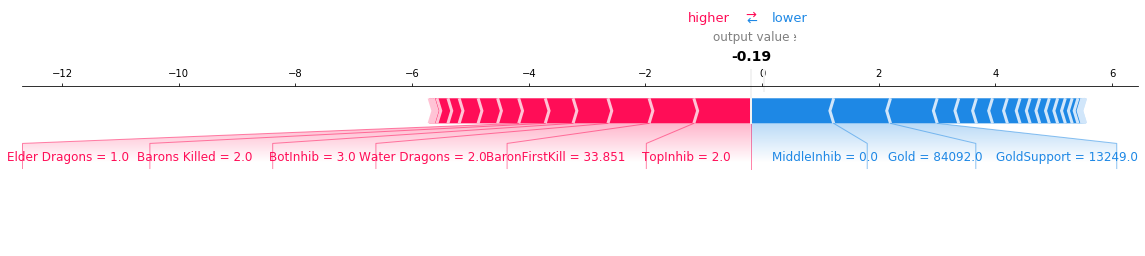

Real: 0  --- Predict: 1


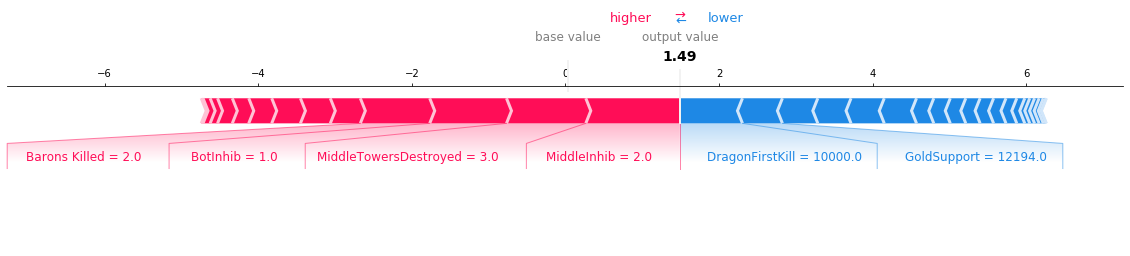

Real: 0  --- Predict: 1


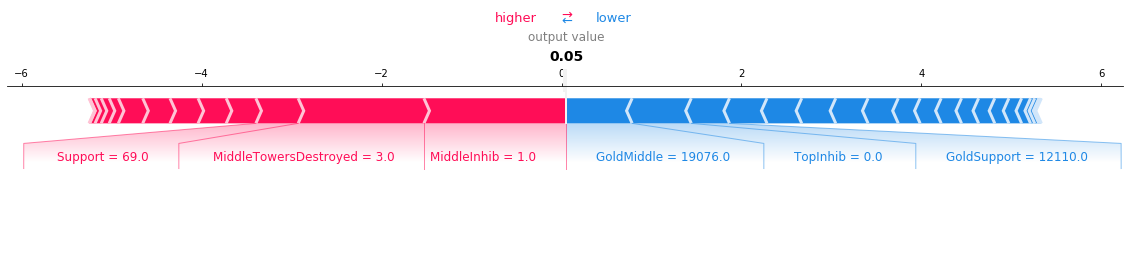

Real: 0  --- Predict: 1


KeyboardInterrupt: 

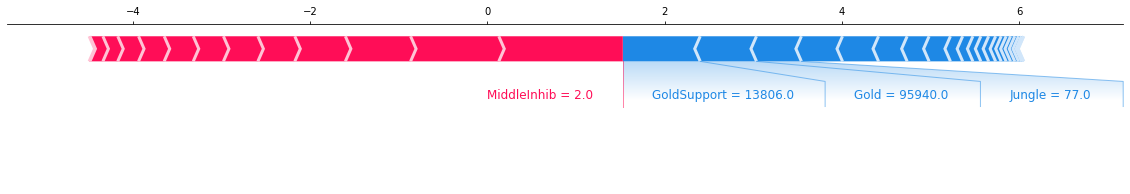

In [93]:
for i, value in enumerate(y_test):
    
    if value != y_pred[i]:
        
        print('Real:',value,' --- Predict:',y_pred[i])
        
        shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:], matplotlib=True)


# Filtering

In [124]:
def filter_dataset_and_train_model(column=None):
    
    options = df_final_league[column].unique()
    
    
    for option in options:
        
        print(option)
        
        df_final_league_filtered = df_final_league[df_final_league[column] == option]
        
        xgboost_clf_filter = XGBClassifier(n_estimators=400)
        
        X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(df_final_league_filtered.iloc[:,6:-1], df_final_league_filtered['Result'], test_size = 0.3, random_state=42)
        
        xgboost_clf_filter.fit(X_train_filter, y_train_filter)
        
        pred = xgboost_clf_filter.predict(X_test_filter)

        print(classification_report(y_test_filter, pred))

        explainer = shap.TreeExplainer(xgboost_clf_filter)
        shap_values = explainer.shap_values(X_test_filter)

        shap.summary_plot(shap_values, X_test_filter, plot_type="bar", max_display=20)

2015
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       454
           1       0.93      0.97      0.95       444

    accuracy                           0.95       898
   macro avg       0.95      0.95      0.95       898
weighted avg       0.95      0.95      0.95       898



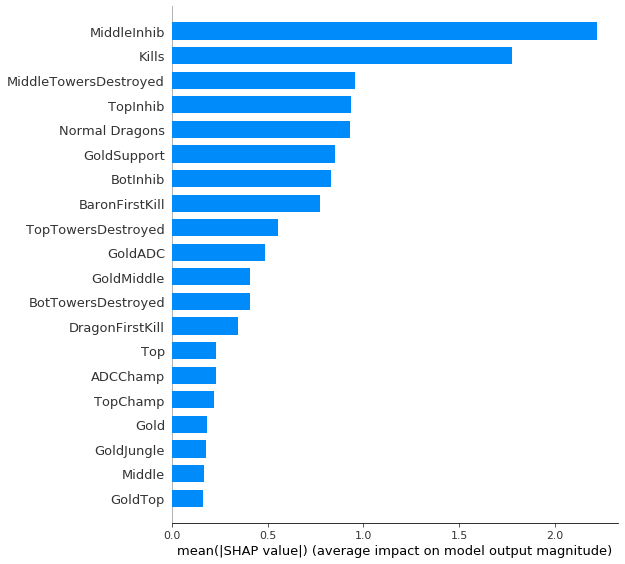

2016
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       775
           1       0.92      0.97      0.94       722

    accuracy                           0.94      1497
   macro avg       0.94      0.94      0.94      1497
weighted avg       0.94      0.94      0.94      1497



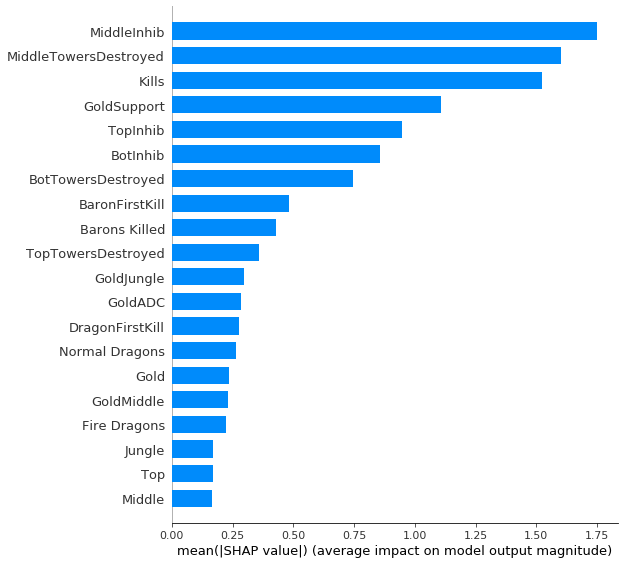

2017
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       970
           1       0.93      0.97      0.95      1017

    accuracy                           0.95      1987
   macro avg       0.95      0.95      0.95      1987
weighted avg       0.95      0.95      0.95      1987



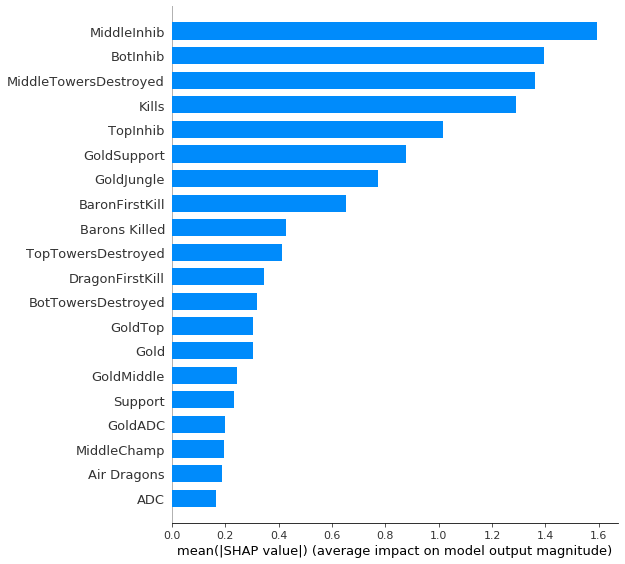

2014
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.78      0.90      0.84        20

    accuracy                           0.85        47
   macro avg       0.85      0.86      0.85        47
weighted avg       0.86      0.85      0.85        47



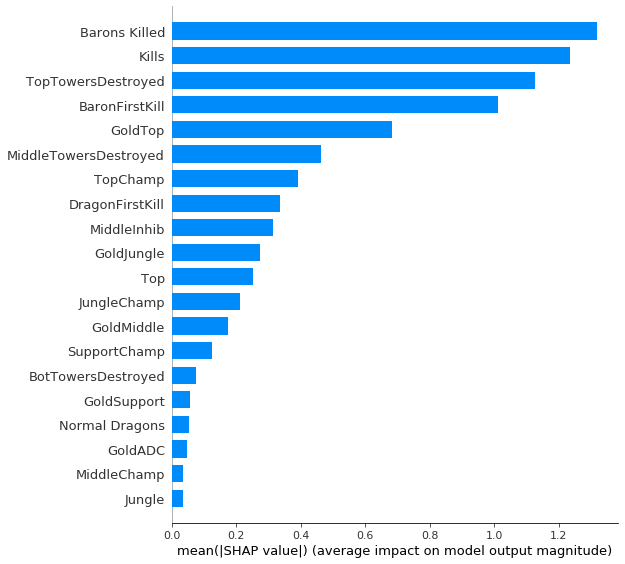

2018
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        74
           1       0.88      1.00      0.93        71

    accuracy                           0.93       145
   macro avg       0.94      0.93      0.93       145
weighted avg       0.94      0.93      0.93       145



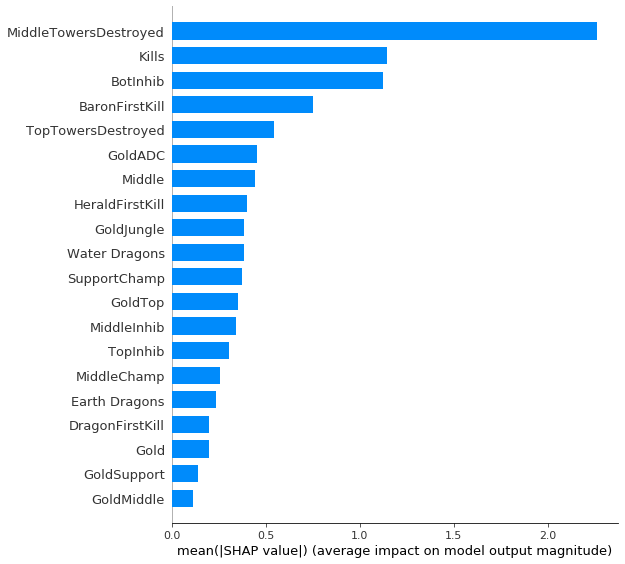

In [125]:
filter_dataset_and_train_model('Year')

NALCS
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       376
           1       0.93      0.98      0.95       388

    accuracy                           0.95       764
   macro avg       0.95      0.95      0.95       764
weighted avg       0.95      0.95      0.95       764



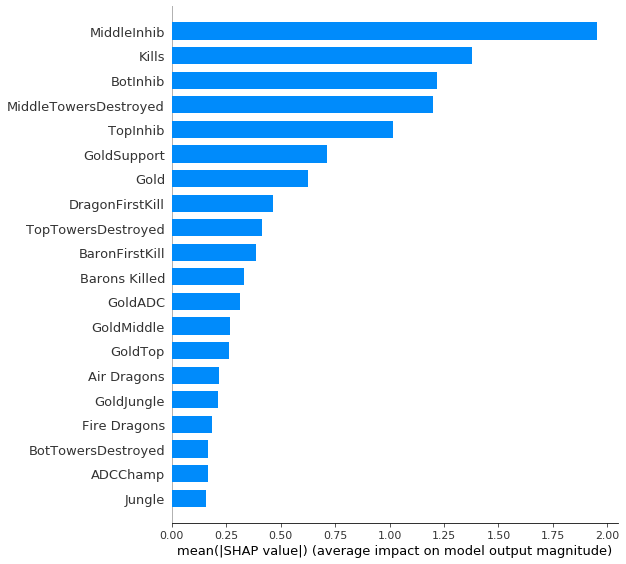

EULCS
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       308
           1       0.96      0.98      0.97       352

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



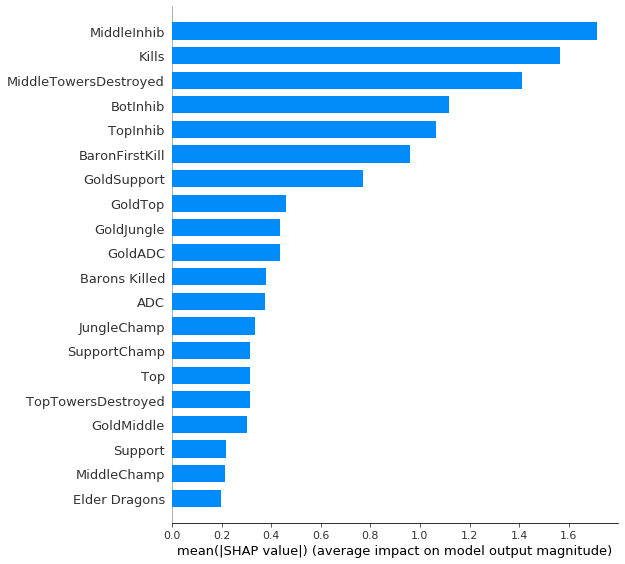

LCK
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       433
           1       0.93      0.98      0.95       434

    accuracy                           0.95       867
   macro avg       0.95      0.95      0.95       867
weighted avg       0.95      0.95      0.95       867



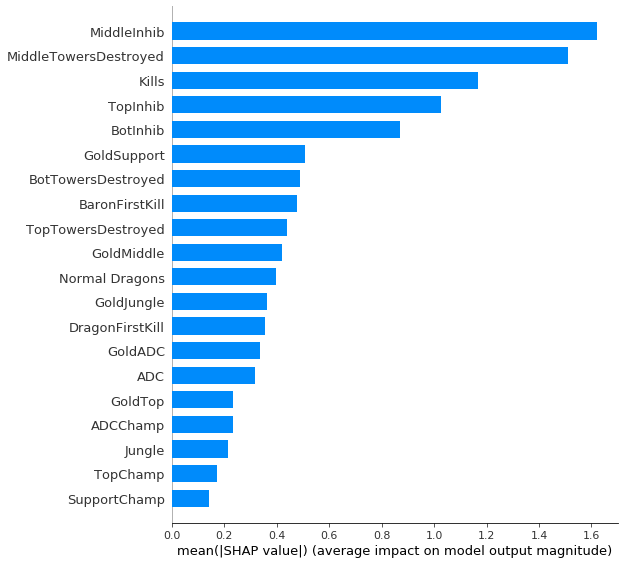

LMS
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       219
           1       0.96      0.96      0.96       248

    accuracy                           0.96       467
   macro avg       0.96      0.96      0.96       467
weighted avg       0.96      0.96      0.96       467



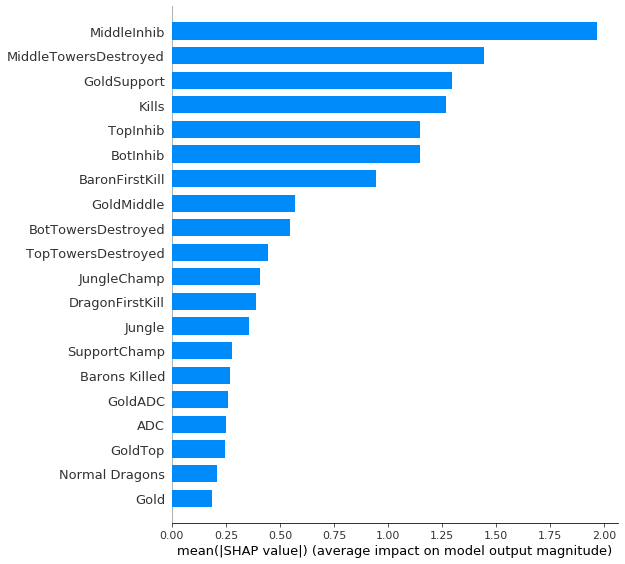

CBLoL
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        88
           1       0.86      0.92      0.89        93

    accuracy                           0.88       181
   macro avg       0.89      0.88      0.88       181
weighted avg       0.89      0.88      0.88       181



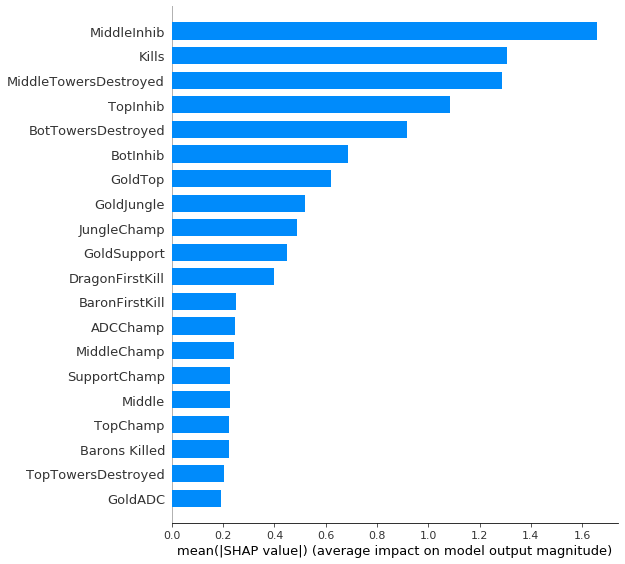

TCL
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       189
           1       0.95      0.98      0.96       203

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



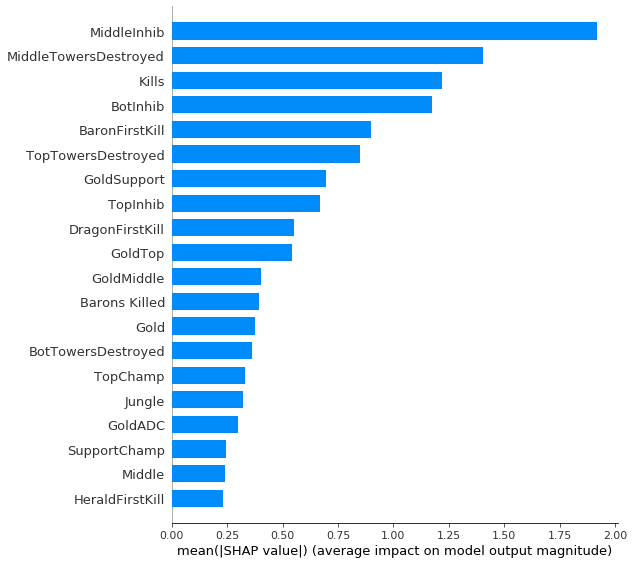

OPL
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       130
           1       0.96      0.97      0.97       145

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



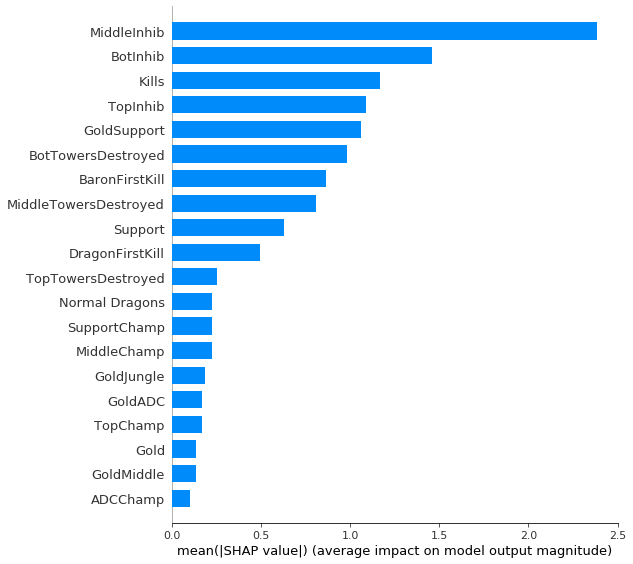

CLS
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.91      0.93      0.92        55

    accuracy                           0.91       105
   macro avg       0.91      0.91      0.91       105
weighted avg       0.91      0.91      0.91       105



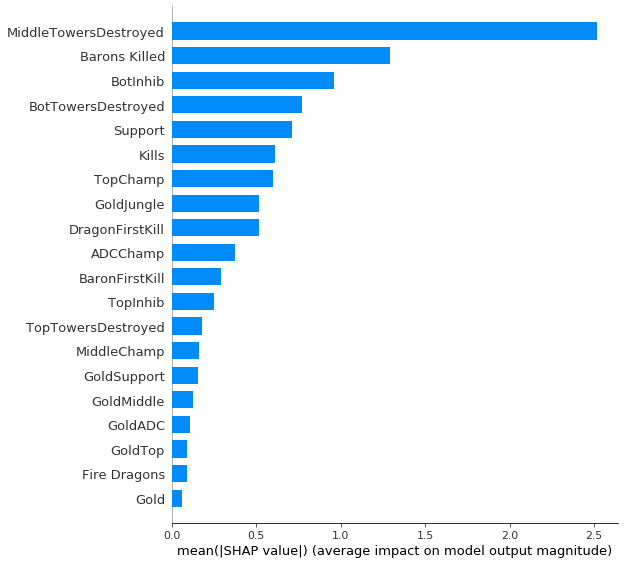

LLN
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.93      0.96      0.94        78

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



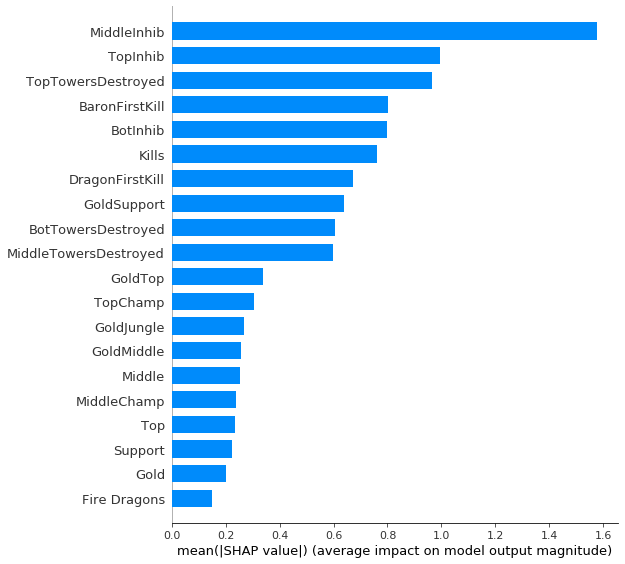

LJL
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        70
           1       0.95      0.91      0.93        85

    accuracy                           0.92       155
   macro avg       0.92      0.92      0.92       155
weighted avg       0.92      0.92      0.92       155



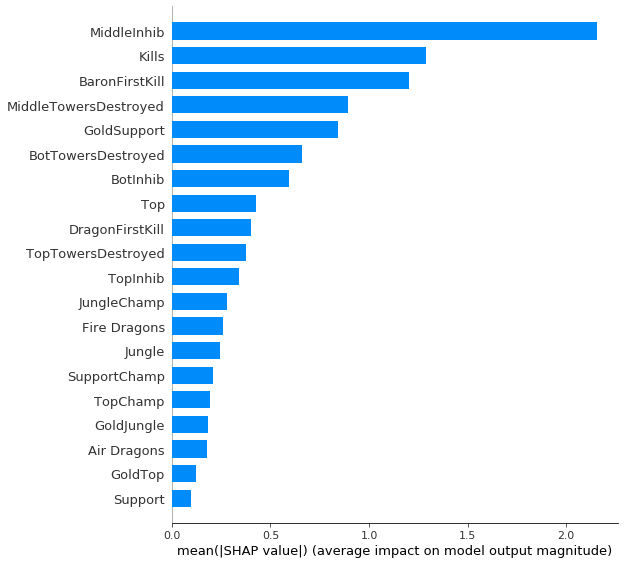

LCL
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.94      0.96      0.95        81

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.95      0.95      0.95       169



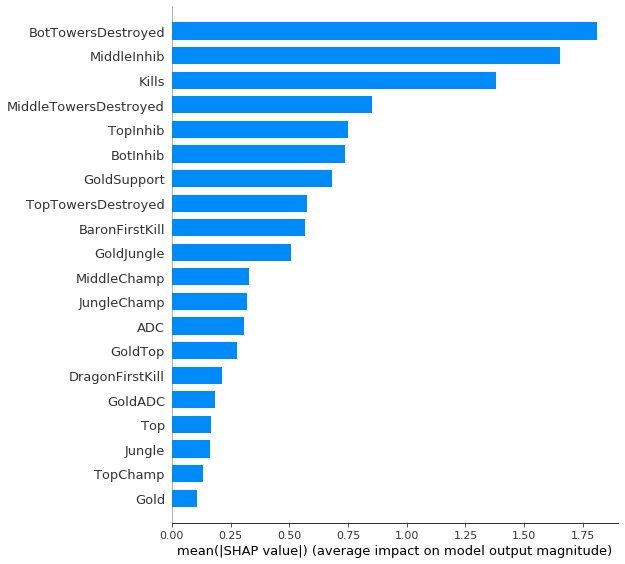

WC
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        91
           1       0.90      0.97      0.93        94

    accuracy                           0.93       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.93      0.93      0.93       185



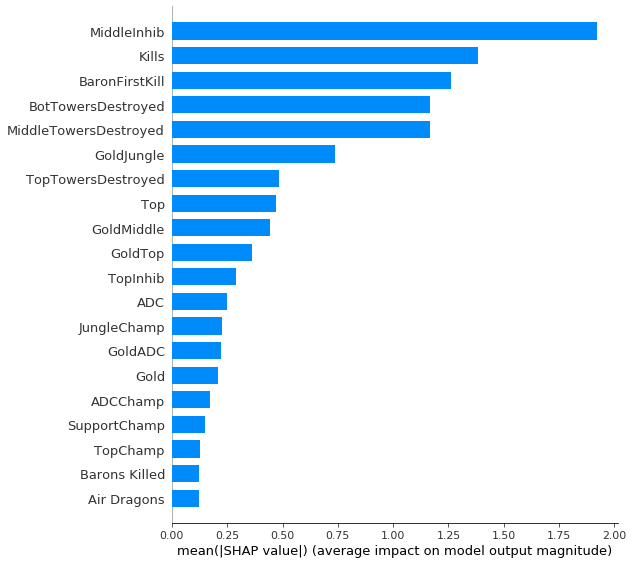

MSI
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      0.97      0.97        31

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



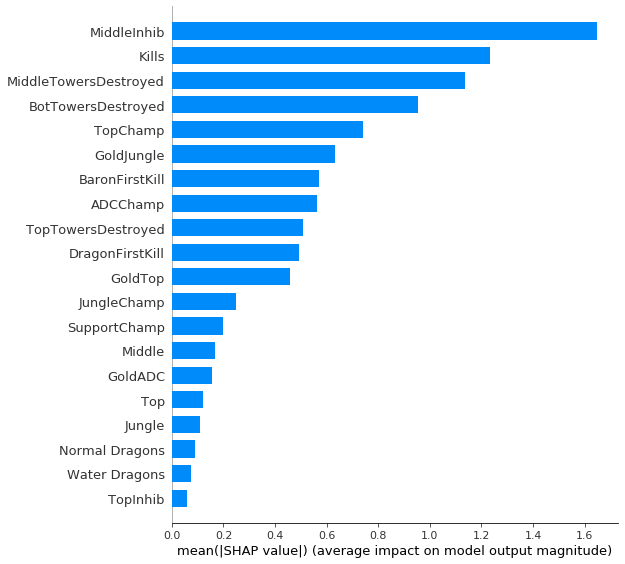

IEM
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.92      0.94      0.93        35

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



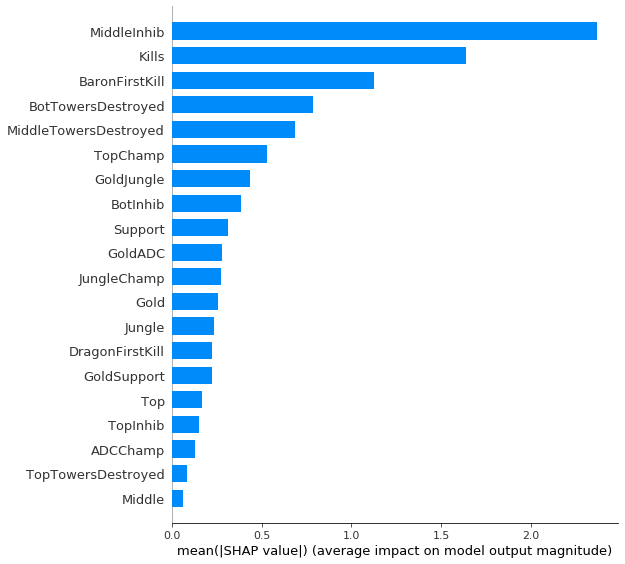

RR
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.96      0.73      0.83        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



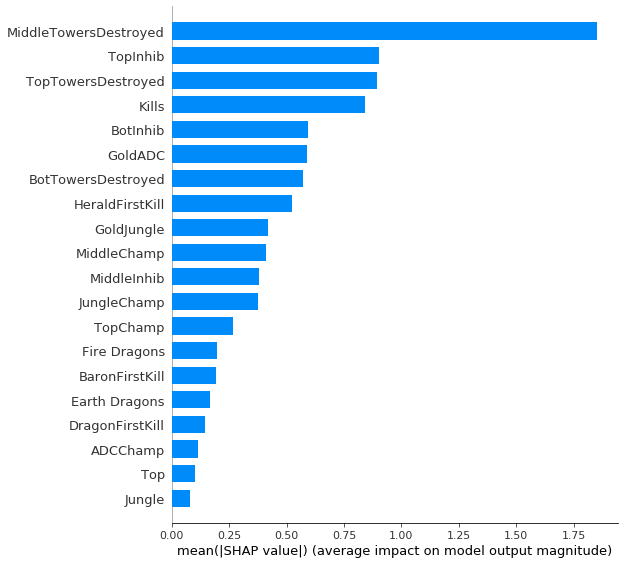

In [126]:
filter_dataset_and_train_model('League')